# Разработка предсказательных ML-моделей для отдела HR-аналитики
## Введение
---
### Аннотация
---
HR-компания применяет современные подходы к оптимизации управления персоналом, опираясь на HR-аналитику и возможности машинного обучения. Организация собирает данные о сотрудниках, включая уровень их удовлетворённости работой - этот показатель рассчитывается на основе регулярных опросов, где оценка варьируется от 0 (полная неудовлетворённость) до 1 (максимальная удовлетворённость)

В рамках проекта необходимо решить две ключевые задачи: 
- первая — разработать модель прогнозирования уровня удовлетворённости сотрудников на основе имеющихся данных
- вторая — построить модель предсказания вероятности увольнения сотрудника

Данный подход особенно важен для бизнеса, поскольку удовлетворённость работой напрямую коррелирует с оттоком персонала, а своевременное выявление рисков увольнения ключевых специалистов позволяет предотвратить значительные финансовые потери и обеспечить стабильность рабочих процессов

### Цель исследования
___
Целью исследования являются две разработанные модели для предсказания:
1. Уровня удовлетворённости сотрудника 
2. Вероятности увольнения сотрудника из компании

### Объект исследования
___
Наборы данных предоставленные компанией с характеристиками сотрудников

### Результат исследования
___
- Выбрано и предложено по одной лучшей модели ML согласно целям исследования
- По итогам выбранных моделей даны соответствующие рекомендации для бизнеса и сделаны выводы

### Ход исследования
___
**Для исследования компанией были предоставлены следующие наборы данных:**

>- Общие данные по сотрудникам:
> ```python
> 'test_features.csv' # Входные признаки тестовой выборки
> ```
>- Данные об удовлетворенности сотрудников корпоративным климатом:
> ```python
> 'train_job_satisfaction_rate.csv' # Тренировочная выборка
> 'test_target_job_satisfaction_rate.csv' # Целевой признак тестовой выборки
> ```
>- Данные о вероятности ухода сотрудников из компании:
> ```python
> 'train_quit.csv.csv' # Тренировочная выборка
> 'test_target_quit.csv.csv' # Целевой признак тестовой выборки
> ```

**Исследование можно разделить на 4 блока:**

1. Исследовательский анализ данных

> Изначальная информация о чистоте данных отсуствует. Поэтому, вначале данные будут загружены и изучены на наличие ошибок, недочетов, отсутствия, корректности и наличия дубликатов. Далее будет проведена обработка данных. После этого будет проведен исследовательский анализ данных

2. Разработка ML-моделей

> На основе уже иследованных и подготовленных данных будет обучено и разработано несколько ML-моделей из которых будет выбрано по одной из каждого направления анализа и сделаны промежуточные выводы
    
3. Сегментация покупателей

> На основе лучшей выбранной модели будет проведено сегментирование покупателей, проведен анализ этих сегментов и сделаны предложения по работе с этим сегментом для увеличения покупательской активности. Также будут сделаны итоговые выводы по выбранному сегменту
    
4. Заключительные выводы

> В конце всего исследования и разработки будут подготовлены заключительные выводы и даны общие рекомендации

**Следовательно, исследование данных будет состоять из 7 этапов:**
> 1. [X] Загрузка и изучение данных
> 2. [X] Предобработка данных
> 3. [X] Исследовательский анализ
> 4. [X] Подготовка данных
> 5. [X] Подготовка и обучение ML-моделей
> 6. [X] Отбор и анализ сегмента
> 7. [X] Итоговые выводы

## Настройка пространства
___

### Импорт и обновление библиотек
___

In [1]:
# Стандартные библиотеки
import os
import warnings

from io import StringIO
from IPython.display import display, Markdown
from joblib import Memory

# Сторонние библиотеки
import matplotlib.pyplot as plt
import numpy as np
import optuna
import pandas as pd
import phik
import seaborn as sns
import shap

from optuna.distributions import (
    CategoricalDistribution,
    IntDistribution,
    FloatDistribution
)
from optuna.integration import OptunaSearchCV
from scipy.stats import ttest_ind
from sklearn.compose import ColumnTransformer
from sklearn.dummy import (
    DummyRegressor,
    DummyClassifier
)
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.linear_model import (
    LogisticRegression, 
    LinearRegression
)
from sklearn.metrics import (
    make_scorer,
    roc_auc_score
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    KFold,
    StratifiedKFold
)
from sklearn.neighbors import (
    KNeighborsClassifier,
    KNeighborsRegressor
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    LabelEncoder,
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    PolynomialFeatures,
    RobustScaler,
    StandardScaler,
)
from sklearn.svm import (
    SVR,
    SVC
)
from sklearn.tree import (
    DecisionTreeRegressor,
    DecisionTreeClassifier
)
from tqdm.auto import tqdm
from tqdm_joblib import tqdm_joblib

# Настройка параметров пространства
# Настройка стилей
sns.set_style('darkgrid')
pd.set_option('display.float_format', '{:.4f}'.format)
warnings.filterwarnings('ignore')
tqdm.pandas()

### Настройка констант

In [2]:
## Локализация названий колонок
##COLS_RENAME_MAP = {
##    'dept': 'Отдел', 
##    'level': 'Уровень грейда', 
##    'workload': 'Уровень загруженности', 
##    'employment_years': 'Длительность работы (лет)',
##    'last_year_promo': 'Наличие повышений (последний год.)',
##    'last_year_violations': 'Наличие нарушений ТД (последний год)', 
##    'supervisor_evaluation': 'Оценка работы руководителем',
##    'salary': 'Зарплата (месяц)',
##    'job_satisfaction_rate': 'Уровень удовлетворенности (целевой)',
##    'quit': 'Увольнение сотрудника (целевой)',
##}

# Параметры настройки и визуализации графиков
FIGSIZE_BAR_PIE = (18, 6)
FIGSIZE_HIST_BOX = (16, 8)
FIGSIZE_HISTPLOT = (16, 12)

PALETTE_CAT = 'coolwarm_r'
PALETTE_NUMERIC = 'Purples'

COLOR_SINGLE = sns.color_palette(PALETTE_NUMERIC)[3]

BINS = 30

X_CAPTION_CAT = 'Значение'
Y_CAPTION_CAT = 'Значений (всего)'

X_CAPTION_NUMERIC = 'Значение'
Y_CAPTION_NUMERIC = 'Частота'

# Параметры для ML
TARGET_JSR = 'job_satisfaction_rate'

TARGET_QUIT = 'quit'

RANDOM_STATE = 42

## Загрузка и изучение данных
___

### Подготовка методов для загрузки и изучения

In [3]:
def load_data(filename, remote_path=None, **params):
    local_file = os.path.join(filename)
    
    if os.path.exists(filename):
        source = local_file
        source_type = 'Локальный'
    else:
        source = f'{remote_path.rstrip("/")}/{filename}'
        source_type = 'URL'

    df = pd.read_csv(source, **params)
    df.attrs['name'] = filename

    display(Markdown(
        f'#### Файл `{filename}` загружен из источника `{source_type}`\n___'
    ))

    return df

In [4]:
def get_df_overview(df, discrete=None, section_name=None):
    display(Markdown(f'## 🔎 Обзор данных `{df.attrs["name"]}`\n___'))

    def section(title):
        display(Markdown(f'### {title}\n___\n'))
    
    def show_info():
        section('Информация о DataFrame')
        buffer = StringIO()
        df.info(buf=buffer)
        info_str = buffer.getvalue()
        display(Markdown(f'```{info_str}```'))
        
    def show_description():
        section('Статистическое описание данных')
        display(df.describe())
        
    def show_sample():
        section('5 случайных строк')
        display(df.sample(5))
        
    def show_unique():
        section('Кол-во уникальных значений')
        unique_vals = df.nunique().sort_values(ascending=False).to_frame('unique_values')
        display(unique_vals)
        
    def show_missing():
        section('Кол-во пропущенных значений')
        
        missing = df.isna().sum().to_frame('missing_values')
        missing['missing_pct'] = (missing['missing_values'] / len(df) * 100).round(2)
        
        if missing['missing_values'].sum() == 0:
            display(Markdown('✅ **Пропуски отсутствуют!**'))
        else:
            display(missing[missing.missing_values != 0])

        
    def show_duplicates_explicit():
        section('Явные дубликаты')
        count = df.index.duplicated().sum()
        
        if count == 0:
            display(Markdown('✅ Явные дубликаты **отсутствуют!**'))
        else:
            display(Markdown(f'**Найдено:** {count}'))
            display(df[df.duplicated()])
            
    def show_duplicates_implicit():
        section('Неявные дубликаты')
        
        found = False
        
        for col in df.select_dtypes(include=['object', 'category']):
            vals = df[col].dropna().astype(str)
            normed = vals.str.lower().str.strip()
            rev = vals.groupby(normed).unique()
            
            for norm_val, origs in rev.items():
                if len(origs) > 1:
                    found = True
                    display(Markdown(f'- **{col}**: {list(origs)} → нормализовано в `{norm_val}`'))
                    
        if not found:
            display(Markdown('✅ Неявные дубликаты **отсутствуют!**'))
                    
    def show_fast_plot_analysis(df=df, discrete=discrete):
        section('Беглый визуальный анализ')
        
        num_cols = [col for col in df.columns if discrete is None or col not in discrete]
        
        if num_cols:
            n_cols = 3
            n_rows = (len(num_cols) + n_cols - 1) // n_cols

            fig, axes = plt.subplots(
                n_rows,
                n_cols,
                figsize=(18, 4 * n_rows)
            )
            
            axes = axes.flatten()

            for col, ax in zip(num_cols, axes):
                sns.histplot(
                    df[col],
                    bins=BINS,
                    color=COLOR_SINGLE,
                    ax=ax
                )
                
                ax.set_xlabel(X_CAPTION_NUMERIC)
                ax.set_ylabel(Y_CAPTION_NUMERIC)
                ax.set_title(col)
                
                for label in ax.get_xticklabels():
                    label.set_rotation(45)
                    
            for ax in axes[len(num_cols):]:
                ax.set_visible(False)

            plt.tight_layout()
            plt.show()

        if discrete:
            n_cols = 3
            n_rows = (len(discrete) + n_cols - 1) // n_cols

            fig, axes = plt.subplots(
                n_rows,
                n_cols,
                figsize=(18, 4 * n_rows)
            )
            
            axes = axes.flatten()

            for col, ax in zip(discrete, axes):
                sns.countplot(
                    x=df[col], 
                    ax=ax, 
                    color=COLOR_SINGLE
                )
                
                ax.set_xlabel(X_CAPTION_NUMERIC)
                ax.set_ylabel(Y_CAPTION_NUMERIC)
                ax.set_title(col)
                
                for label in ax.get_xticklabels():
                    label.set_rotation(45)
            for ax in axes[len(discrete):]:
                ax.set_visible(False)

            plt.tight_layout()
            plt.show()
        
    sections = {
        'info': show_info,
        'description': show_description,
        'sample': show_sample,
        'unique': show_unique,
        'missing': show_missing,
        'duplicates_explicit': show_duplicates_explicit,
        'duplicates_implicit': show_duplicates_implicit,
        'fast_plot_analysis': show_fast_plot_analysis,
    }
        
    if section_name is None:
        for func in sections.values():
            func()
    else:
        func = sections.get(section_name)
        func()

### Загрузка данных для изучения

In [5]:
params = dict(
    sep=',',
    decimal='.',
    index_col='id',
    encoding='utf-8'
)

df_test_features = load_data('test_features.csv', **params)
df_train_job_satisfaction_rate = load_data('train_job_satisfaction_rate.csv', **params)
df_test_job_satisfaction_rate = load_data('test_target_job_satisfaction_rate.csv', **params)
df_train_quit = load_data('train_quit.csv', **params)
df_test_quit = load_data('test_target_quit.csv', **params)

#### Файл `test_features.csv` загружен из источника `Локальный`
___

#### Файл `train_job_satisfaction_rate.csv` загружен из источника `Локальный`
___

#### Файл `test_target_job_satisfaction_rate.csv` загружен из источника `Локальный`
___

#### Файл `train_quit.csv` загружен из источника `Локальный`
___

#### Файл `test_target_quit.csv` загружен из источника `Локальный`
___

### Изучение `df_test_features`
---

## 🔎 Обзор данных `test_features.csv`
___

### Информация о DataFrame
___


```<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 485046 to 771859
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   1998 non-null   object
 1   level                  1999 non-null   object
 2   workload               2000 non-null   object
 3   employment_years       2000 non-null   int64 
 4   last_year_promo        2000 non-null   object
 5   last_year_violations   2000 non-null   object
 6   supervisor_evaluation  2000 non-null   int64 
 7   salary                 2000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 140.6+ KB
```

### Статистическое описание данных
___


employment_years  supervisor_evaluation     salary
count         2000.0000              2000.0000  2000.0000
mean             3.6665                 3.5265 34066.8000
std              2.5372                 0.9969 15398.4367
min              1.0000                 1.0000 12000.0000
25%              1.0000                 3.0000 22800.0000
50%              3.0000                 4.0000 30000.0000
75%              6.0000                 4.0000 43200.0000
max             10.0000                 5.0000 96000.0000

### 5 случайных строк
___


dept   level workload  employment_years last_year_promo  \
id                                                                     
915332      sales  junior   medium                 1              no   
346217  marketing  middle      low                 5              no   
126983      sales  junior     high                 2              no   
891385      sales  junior   medium                 1              no   
362664         hr  middle   medium                 5             yes   

       last_year_violations  supervisor_evaluation  salary  
id                                                          
915332                   no                      4   21600  
346217                   no                      5   26400  
126983                   no                      5   38400  
891385                   no                      3   24000  
362664                   no                      5   42000

### Кол-во уникальных значений
___


unique_values
salary                            66
employment_years                  10
dept                               6
supervisor_evaluation              5
workload                           4
level                              3
last_year_promo                    2
last_year_violations               2

### Кол-во пропущенных значений
___


missing_values  missing_pct
dept                2       0.1000
level               1       0.0500

### Явные дубликаты
___


✅ Явные дубликаты **отсутствуют!**

### Неявные дубликаты
___


✅ Неявные дубликаты **отсутствуют!**

### Беглый визуальный анализ
___


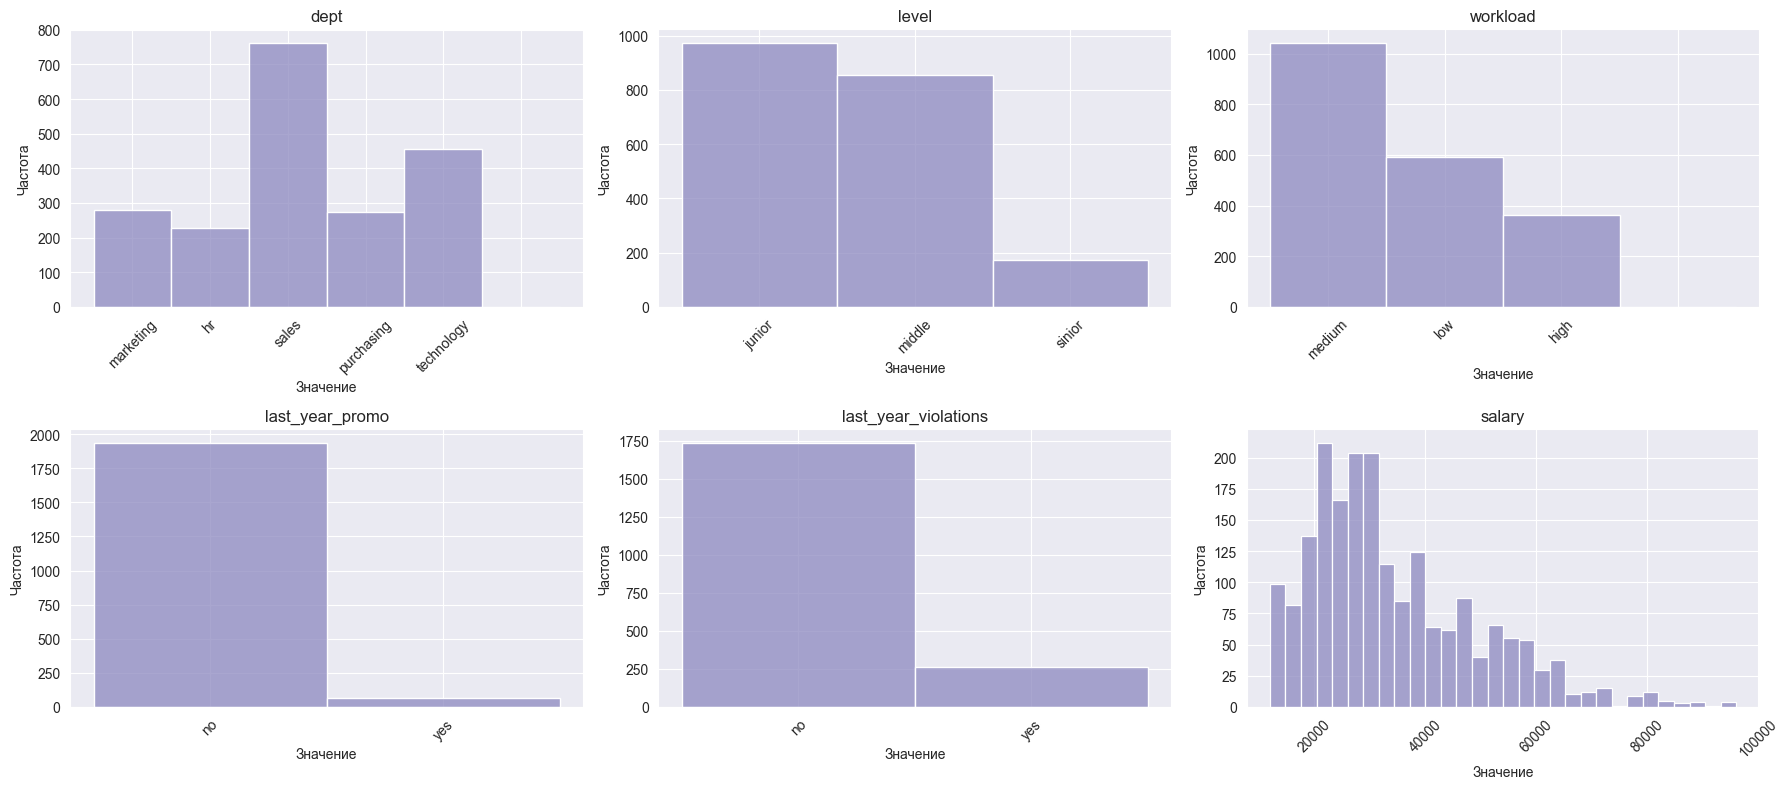

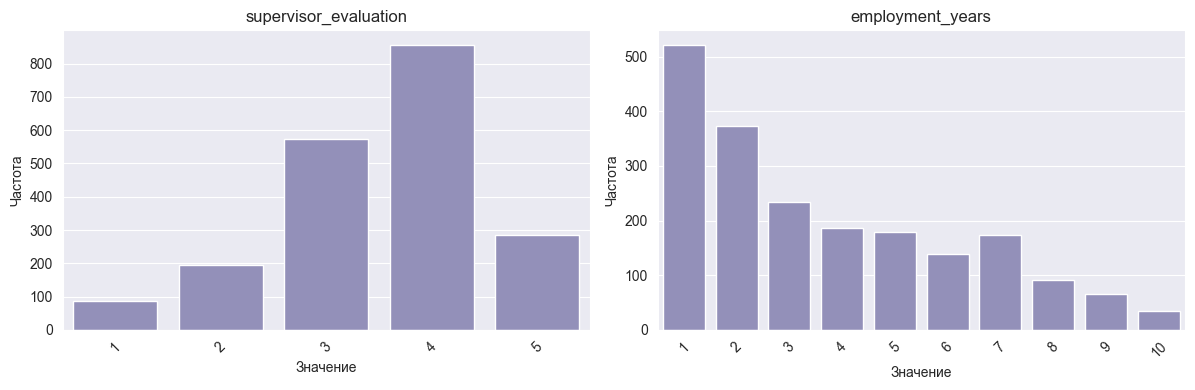

In [6]:
get_df_overview(df_test_features, ['supervisor_evaluation', 'employment_years'])

### Изучение `df_test_job_satisfaction_rate`
---

## 🔎 Обзор данных `test_target_job_satisfaction_rate.csv`
___

### Информация о DataFrame
___


```<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 130604 to 648995
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1)
memory usage: 31.2 KB
```

### Статистическое описание данных
___


job_satisfaction_rate
count              2000.0000
mean                  0.5488
std                   0.2201
min                   0.0300
25%                   0.3800
50%                   0.5800
75%                   0.7200
max                   1.0000

### 5 случайных строк
___


job_satisfaction_rate
id                           
599325                 0.5000
522075                 0.3500
421199                 0.3500
953956                 0.7500
162854                 0.2300

### Кол-во уникальных значений
___


unique_values
job_satisfaction_rate             98

### Кол-во пропущенных значений
___


✅ **Пропуски отсутствуют!**

### Явные дубликаты
___


✅ Явные дубликаты **отсутствуют!**

### Неявные дубликаты
___


✅ Неявные дубликаты **отсутствуют!**

### Беглый визуальный анализ
___


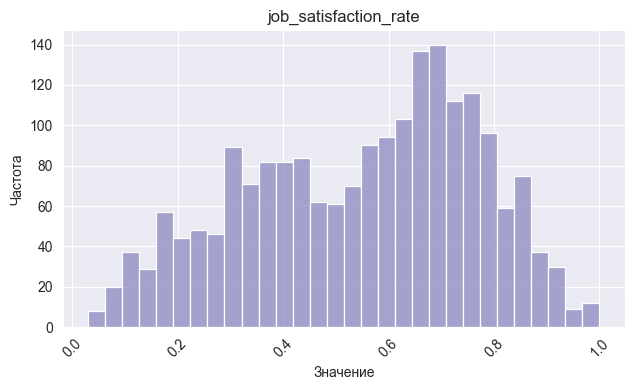

In [7]:
get_df_overview(df_test_job_satisfaction_rate)

### Изучение `df_train_job_satisfaction_rate`
---

## 🔎 Обзор данных `train_job_satisfaction_rate.csv`
___

### Информация о DataFrame
___


```<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 155278 to 338347
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dept                   3994 non-null   object 
 1   level                  3996 non-null   object 
 2   workload               4000 non-null   object 
 3   employment_years       4000 non-null   int64  
 4   last_year_promo        4000 non-null   object 
 5   last_year_violations   4000 non-null   object 
 6   supervisor_evaluation  4000 non-null   int64  
 7   salary                 4000 non-null   int64  
 8   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 312.5+ KB
```

### Статистическое описание данных
___


employment_years  supervisor_evaluation     salary  \
count         4000.0000              4000.0000  4000.0000   
mean             3.7185                 3.4765 33926.7000   
std              2.5425                 1.0088 14900.7038   
min              1.0000                 1.0000 12000.0000   
25%              2.0000                 3.0000 22800.0000   
50%              3.0000                 4.0000 30000.0000   
75%              6.0000                 4.0000 43200.0000   
max             10.0000                 5.0000 98400.0000   

       job_satisfaction_rate  
count              4000.0000  
mean                  0.5340  
std                   0.2253  
min                   0.0300  
25%                   0.3600  
50%                   0.5600  
75%                   0.7100  
max                   1.0000

### 5 случайных строк
___


dept   level workload  employment_years last_year_promo  \
id                                                                      
988512       sales  junior   medium                 1              no   
889203       sales  junior      low                 1              no   
469929  purchasing  junior   medium                 1              no   
509888  purchasing  junior      low                 2              no   
181409       sales  middle     high                 2              no   

       last_year_violations  supervisor_evaluation  salary  \
id                                                           
988512                  yes                      2   26400   
889203                   no                      4   15600   
469929                   no                      3   21600   
509888                   no                      5   19200   
181409                   no                      4   48000   

        job_satisfaction_rate  
id                             
988512                 0.1600  
889203                 0.6500  
469929                 0.2400  
509888                 0.8100  
181409                 0.5400

### Кол-во уникальных значений
___


unique_values
job_satisfaction_rate             98
salary                            68
employment_years                  10
dept                               5
supervisor_evaluation              5
level                              3
workload                           3
last_year_promo                    2
last_year_violations               2

### Кол-во пропущенных значений
___


missing_values  missing_pct
dept                6       0.1500
level               4       0.1000

### Явные дубликаты
___


✅ Явные дубликаты **отсутствуют!**

### Неявные дубликаты
___


✅ Неявные дубликаты **отсутствуют!**

### Беглый визуальный анализ
___


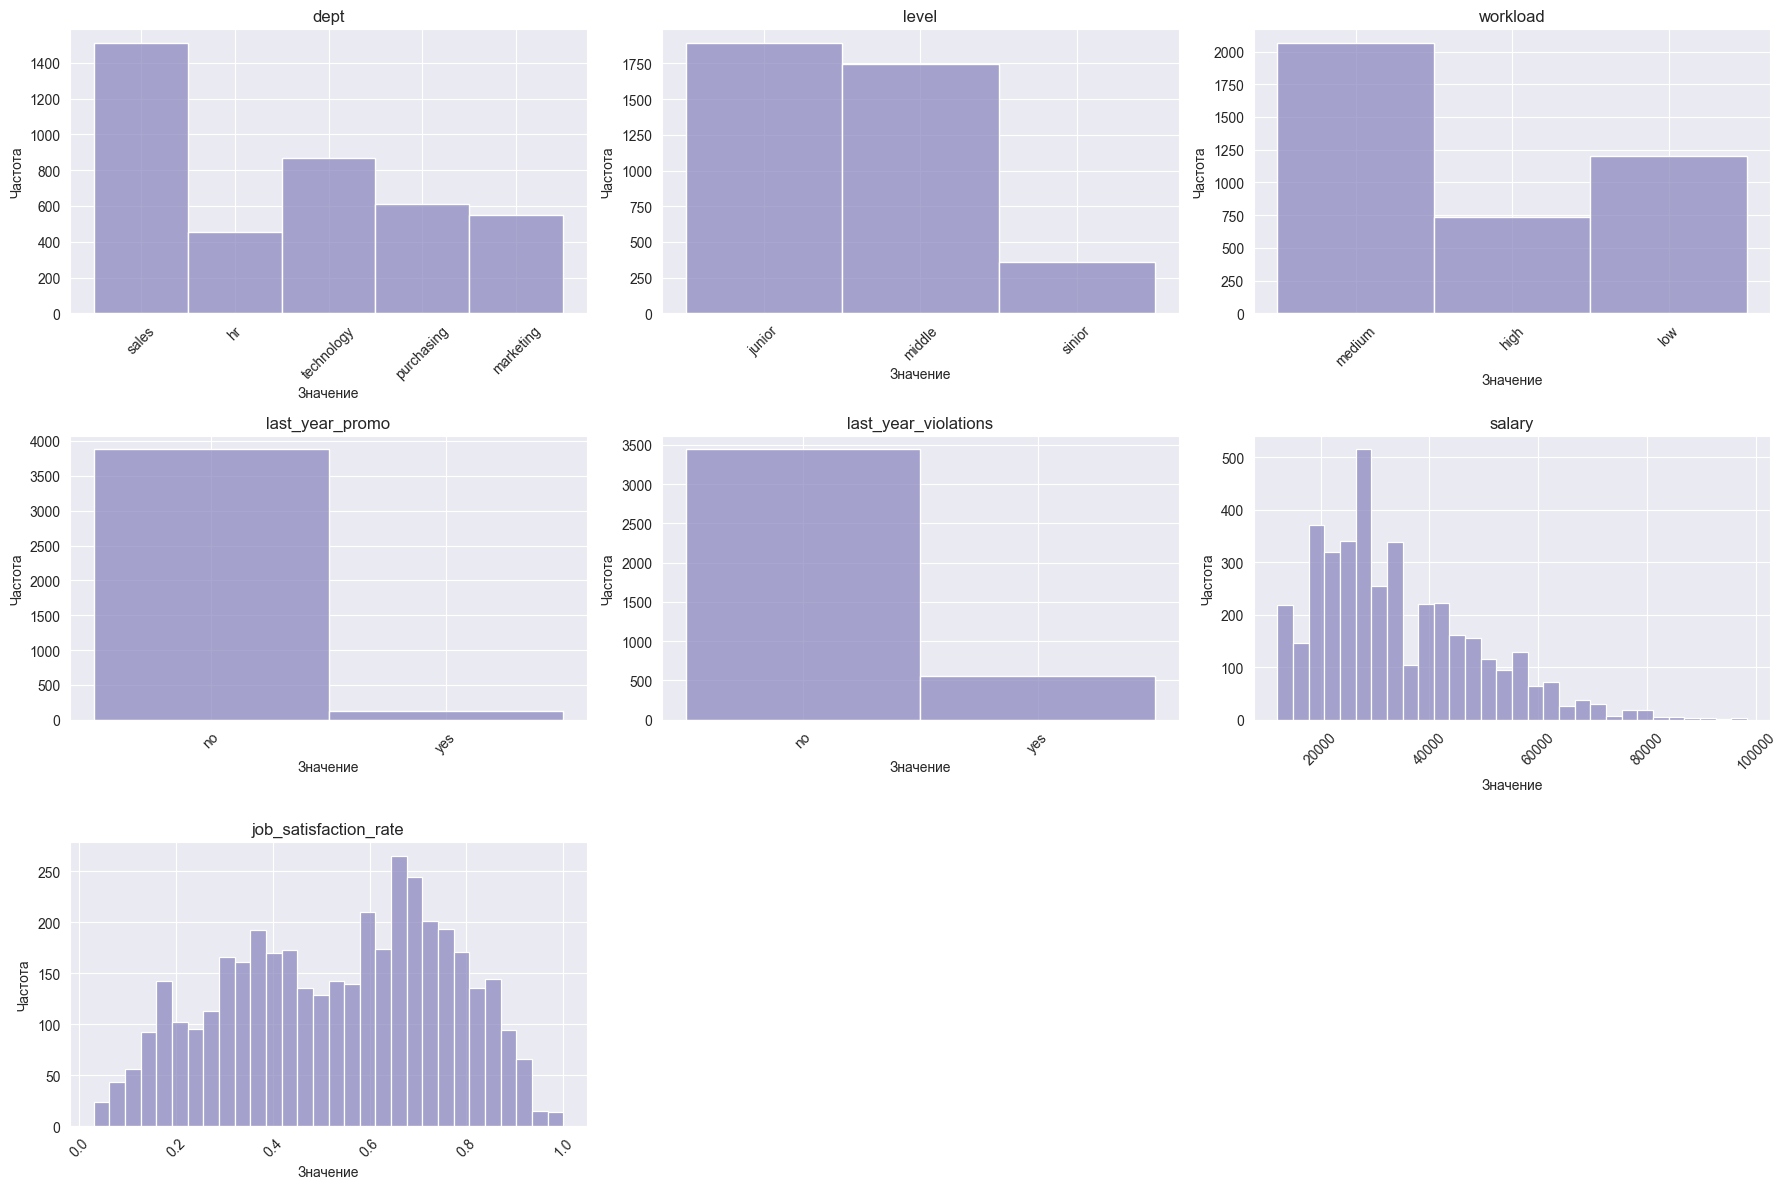

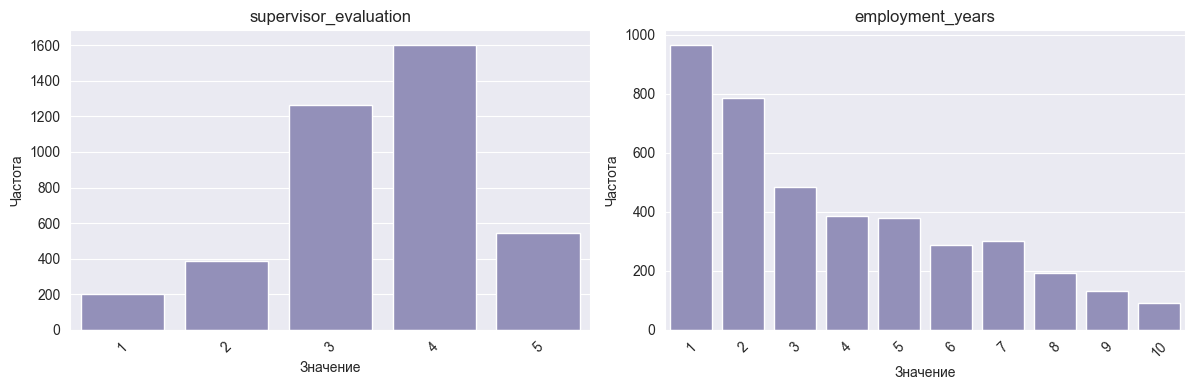

In [8]:
get_df_overview(df_train_job_satisfaction_rate, ['supervisor_evaluation', 'employment_years'])

### Изучение `df_test_quit`
---

## 🔎 Обзор данных `test_target_quit.csv`
___

### Информация о DataFrame
___


```<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 999029 to 460332
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   quit    2000 non-null   object
dtypes: object(1)
memory usage: 31.2+ KB
```

### Статистическое описание данных
___


quit
count   2000
unique     2
top       no
freq    1436

### 5 случайных строк
___


quit
id         
410915   no
115034   no
847789  yes
791625   no
766621  yes

### Кол-во уникальных значений
___


unique_values
quit              2

### Кол-во пропущенных значений
___


✅ **Пропуски отсутствуют!**

### Явные дубликаты
___


✅ Явные дубликаты **отсутствуют!**

### Неявные дубликаты
___


✅ Неявные дубликаты **отсутствуют!**

### Беглый визуальный анализ
___


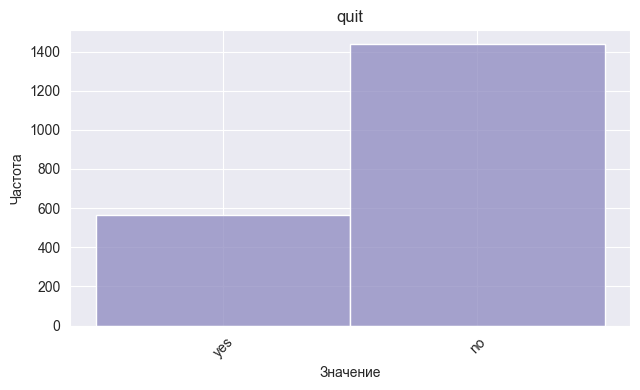

In [9]:
get_df_overview(df_test_quit)

### Изучение `df_train_quit`
---

## 🔎 Обзор данных `train_quit.csv`
___

### Информация о DataFrame
___


```<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 723290 to 853842
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   4000 non-null   object
 1   level                  4000 non-null   object
 2   workload               4000 non-null   object
 3   employment_years       4000 non-null   int64 
 4   last_year_promo        4000 non-null   object
 5   last_year_violations   4000 non-null   object
 6   supervisor_evaluation  4000 non-null   int64 
 7   salary                 4000 non-null   int64 
 8   quit                   4000 non-null   object
dtypes: int64(3), object(6)
memory usage: 312.5+ KB
```

### Статистическое описание данных
___


employment_years  supervisor_evaluation     salary
count         4000.0000              4000.0000  4000.0000
mean             3.7015                 3.4747 33805.8000
std              2.5419                 1.0040 15152.4152
min              1.0000                 1.0000 12000.0000
25%              2.0000                 3.0000 22800.0000
50%              3.0000                 4.0000 30000.0000
75%              6.0000                 4.0000 43200.0000
max             10.0000                 5.0000 96000.0000

### 5 случайных строк
___


dept   level workload  employment_years last_year_promo  \
id                                                                     
935385      sales  junior   medium                 3              no   
467668      sales  middle   medium                 6              no   
592970         hr  junior      low                 2              no   
787194  marketing  middle     high                 2              no   
490446  marketing  middle     high                 4              no   

       last_year_violations  supervisor_evaluation  salary quit  
id                                                               
935385                   no                      3   21600  yes  
467668                   no                      3   43200   no  
592970                   no                      4   20400   no  
787194                  yes                      4   62400   no  
490446                   no                      4   58800   no

### Кол-во уникальных значений
___


unique_values
salary                            69
employment_years                  10
dept                               5
supervisor_evaluation              5
level                              3
workload                           3
last_year_promo                    2
last_year_violations               2
quit                               2

### Кол-во пропущенных значений
___


✅ **Пропуски отсутствуют!**

### Явные дубликаты
___


✅ Явные дубликаты **отсутствуют!**

### Неявные дубликаты
___


✅ Неявные дубликаты **отсутствуют!**

### Беглый визуальный анализ
___


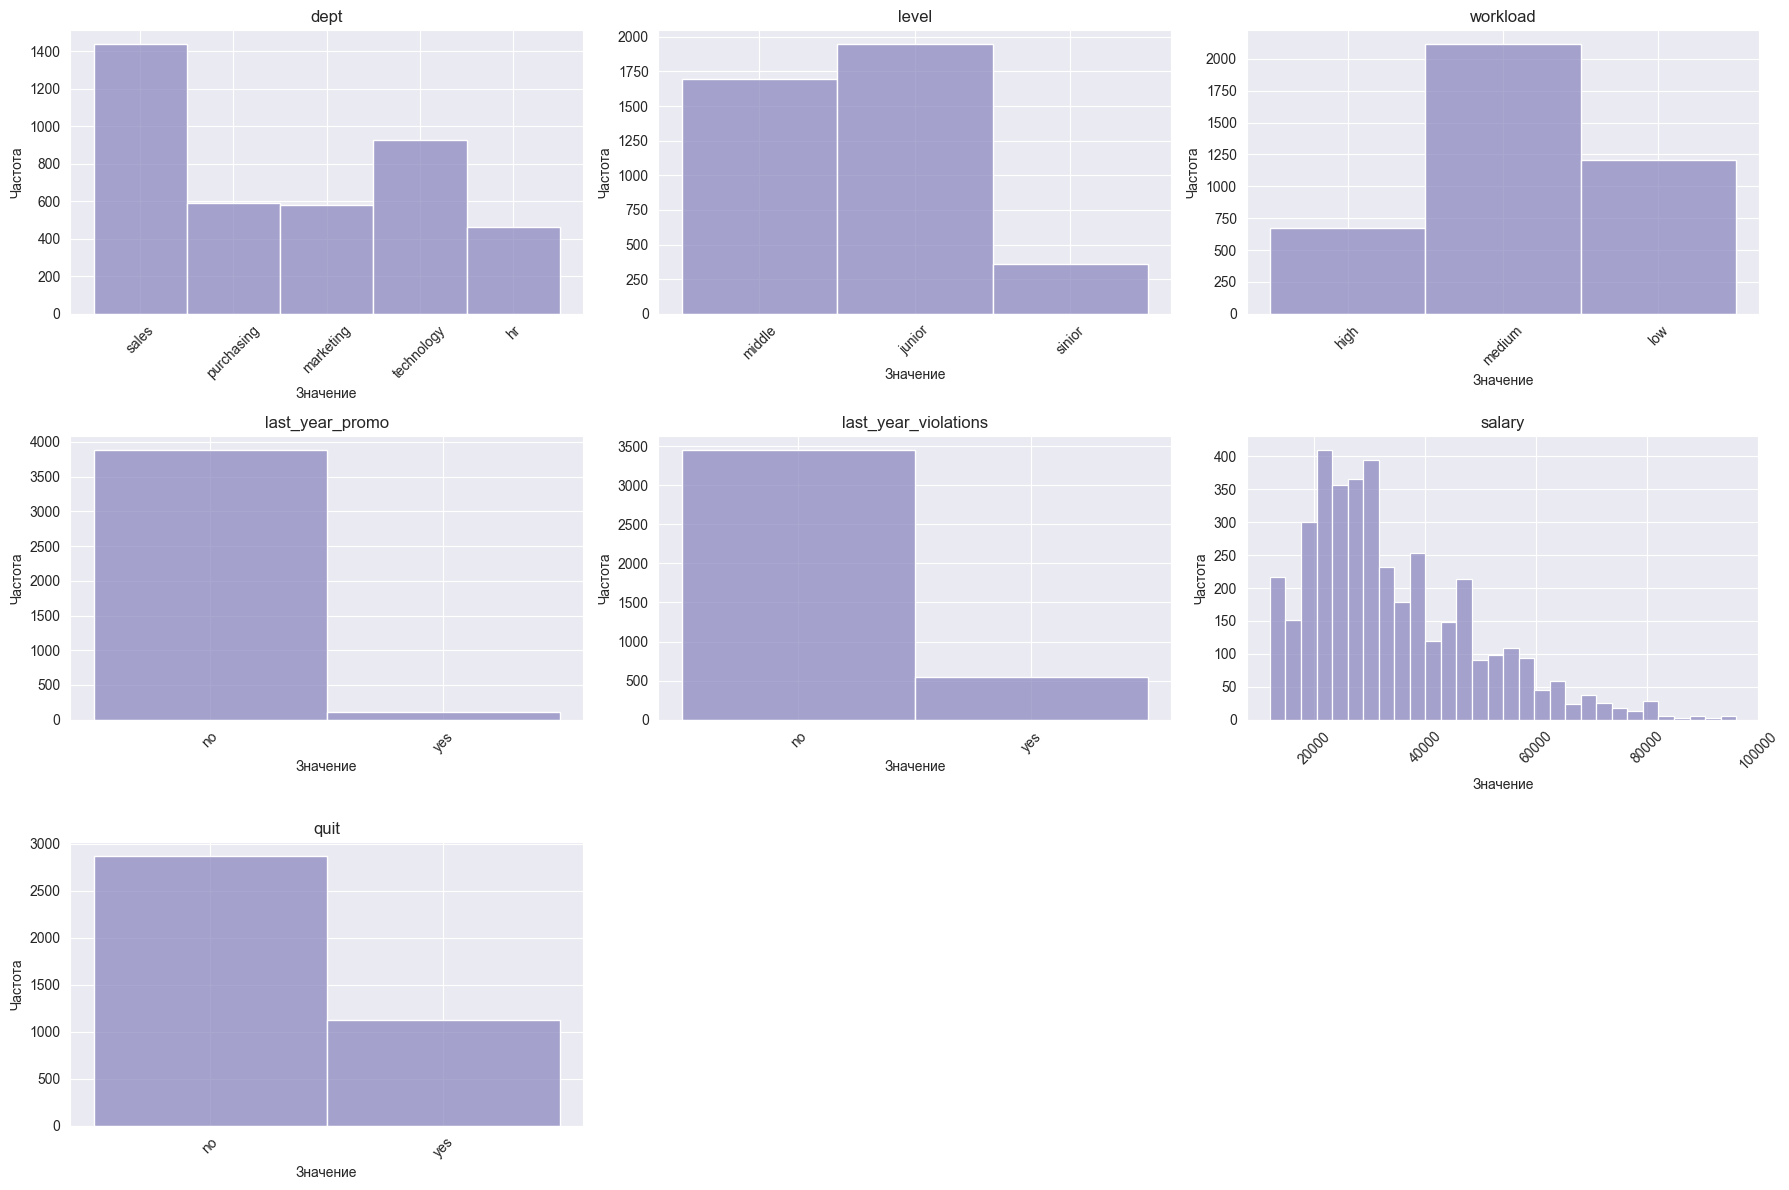

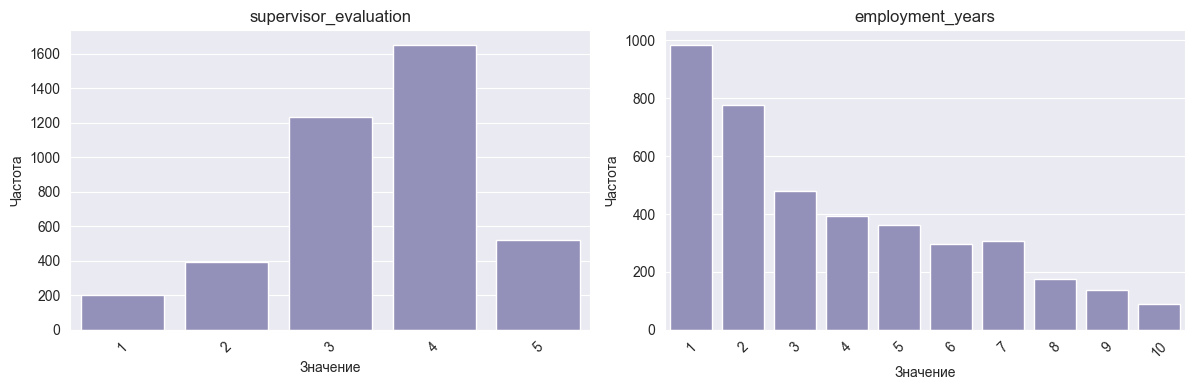

In [10]:
get_df_overview(df_train_quit, ['supervisor_evaluation', 'employment_years'])

### Выводы
---
**Общее по датафреймам:**
> - Наличие явных дубликатов стоит признать нормальным, т.к. их появление связано с назначением в качестве индексов айди пользователей. Если проверить датафреймы с учетом индексов, явные дубликаты будут отсутствовать. Т.е. все пользователи являются уникальными и не дублируют друг друга

**Датафрейм: `df_test_features`**
> - Размерность датафрейма - **`2000x9`**
> - Обнаружены пропуски в стобцах **`'dept' - 2`** и **`'level' - 1`**
> - Явные дубликаты - **`отсутствуют`**
> - Неявные дубликаты - **`отсуствуют`**
> - В столбце **`level`** ошибка в нейминге: **`sinior -> sEnior`**
> - Обнаружены неявные дубликаты значений в столбцах **`Тип сервиса`**

**Датафрейм: `df_test_job_satisfaction_rate`**
> - Размерность датафрейма - **`2000x1`**
> - Пропуски в данных - **`отсутствуют`**
> - Явные дубликаты - **`отсутствуют`**
> - Неявные дубликаты - **`отсуствуют`**

**Датафрейм: `df_train_job_satisfaction_rate`**
> - Размерность датафрейма - **`4000x10`**
> - Обнаружены пропуски в стобцах **`'dept' - 6`** и **`'level' - 4`**
> - Явные дубликаты - **`отсутствуют`**
> - Неявные дубликаты - **`отсуствуют`**
> - В столбце **`level`** ошибка в нейминге: **`sinior -> sEnior`**

**Датафрейм: `df_test_quit`**
> - Размерность датафрейма - **`2000x1`**
> - Пропуски в данных - **`отсутствуют`**
> - Явные дубликаты - **`отсутствуют`**
> - Неявные дубликаты - **`отсуствуют`**

**Датафрейм: `df_train_quit`**
> - Размерность датафрейма - **`4000x10`**
> - Пропуски в данных - **`отсутствуют`**
> - Явные дубликаты - **`отсутствуют`**
> - Неявные дубликаты - **`отсуствуют`**
> - В столбце **`level`** ошибка в нейминге: **`sinior -> sEnior`**

## Предобработка данных
___

### Подготовка методов для предобработки
___

In [11]:
def cols_names_cleaner(df):
    df.columns = (
        df
        .columns
        .str.lower()
        .str.replace(' ', '_')
    )
    
    return df

In [12]:
def text_vals_cleaner(x):
    x = (
        x
        .str.lower()
        .str.replace(' ', '_')
    )
        
    return x

In [13]:
def text_vals_to_nan(df):
    mask = df.select_dtypes(include=['object', 'category']).columns
    
    before = df[mask].isna().sum()
    
    df[mask] = df[mask].replace(r'^\s*$', np.nan, regex=True)
    
    after = df[mask].isna().sum()
    
    display(Markdown(f'### Значений найдено заменено на NaN:\n___'))
    display(after - before)
    
    return df

In [14]:
def get_short_df_info(df):
    results = []
   
    for col in df:
        results.append({
            'Тип данных': df[col].dtype,
            'Уник. всего.': df[col].nunique(),
            'Уник. значения': df[col].unique(),
            'NaN (кол-во.)': df[col].isna().sum(),
            'NaN (%)': df[col].isnull().mean().round(4),
        })
        
    main_info = pd.DataFrame(data=results).set_index(df.columns)
    main_info = main_info.style.set_caption(f'Проверочные данные по датафрейму \ Размерность: {df.shape}')
    
    return main_info

In [15]:
def convert_columns_dtype(df, dtype_mapping):
    for col, dtype in dtype_mapping.items():
        if col in df.columns:
            df[col] = df[col].astype(dtype)
    return df

### Подготовка копий для работы
___

In [16]:
test_features_cleaned = df_test_features.copy()
test_features_cleaned.attrs['name'] = 'test_features_cleaned'

train_jsr_cleaned = df_train_job_satisfaction_rate.copy()
train_jsr_cleaned.attrs['name'] = 'train_jsr_cleaned'

test_target_jsr_cleaned = df_test_job_satisfaction_rate.copy()
test_target_jsr_cleaned.attrs['name'] = 'test_target_jsr_cleaned'

train_quit_cleaned = df_train_quit.copy()
train_quit_cleaned.attrs['name'] = 'train_quit_cleaned'

test_target_quit_cleaned = df_test_quit.copy()
test_target_quit_cleaned.attrs['name'] = 'test_target_quit_cleaned'

### Предобработка `test_features_cleaned`
---

In [17]:
# Предварительная проверка датафрейма
get_short_df_info(test_features_cleaned)

In [18]:
# Заполнение пробелов в данных на NaN
test_features_cleaned = text_vals_to_nan(test_features_cleaned)

### Значений найдено заменено на NaN:
___

dept                    1
level                   0
workload                1
last_year_promo         0
last_year_violations    0
dtype: int64

In [19]:
# Переименование названия грейда в столбце level
test_features_cleaned.level = (
    test_features_cleaned
    .level
    .replace({'sinior': 'senior'})
)

In [20]:
# Приведение данных к корректному типу
features_dtype_map = {
    'dept': 'category',
    'level': 'category',
    'workload': 'category',
    'last_year_promo': 'category',
    'last_year_violations': 'category',
    'supervisor_evaluation': 'category',
    'quit': 'category',
}

test_features_cleaned = convert_columns_dtype(test_features_cleaned, features_dtype_map)

In [21]:
# Контрольная проверка данных
get_short_df_info(test_features_cleaned)

### Предобработка `train_jsr_cleaned`
---

In [22]:
# Быстрая проверка датафрейма для удобства
get_short_df_info(train_jsr_cleaned)

In [23]:
# Переименование названия грейда в level
train_jsr_cleaned.level = (
    train_jsr_cleaned
    .level
    .replace({'sinior': 'senior'})
)

get_df_overview(train_jsr_cleaned, section_name= 'duplicates_implicit')

## 🔎 Обзор данных `train_jsr_cleaned`
___

### Неявные дубликаты
___


✅ Неявные дубликаты **отсутствуют!**

In [24]:
# Приведение данных к корректному типу
train_jsr_cleaned = convert_columns_dtype(train_jsr_cleaned, features_dtype_map)

In [25]:
# Контрольная проверка данных
get_short_df_info(train_jsr_cleaned)

### Предобработка `test_target_jsr_cleaned`
---

In [26]:
# Быстрая проверка датафрейма для удобства
get_short_df_info(test_target_jsr_cleaned)

### Предобработка `train_quit_cleaned`
---

In [27]:
# Быстрая проверка датафрейма для удобства
get_short_df_info(train_quit_cleaned)

In [28]:
# Переименование названия грейда в level
train_quit_cleaned.level = (
    train_quit_cleaned
    .level
    .replace({'sinior': 'senior'})
)

get_df_overview(train_quit_cleaned, section_name= 'duplicates_implicit')

## 🔎 Обзор данных `train_quit_cleaned`
___

### Неявные дубликаты
___


✅ Неявные дубликаты **отсутствуют!**

In [29]:
# Приведение данных к корректному типу
train_quit_cleaned = convert_columns_dtype(train_quit_cleaned, features_dtype_map)

In [30]:
# Контрольная проверка данных
get_short_df_info(train_quit_cleaned)

### Предобработка `test_target_quit_cleaned`
---

In [31]:
# Быстрая проверка датафрейма для удобства
get_short_df_info(test_target_quit_cleaned)

In [32]:
# Приведение данных к корректному типу
test_target_quit_cleaned = convert_columns_dtype(test_target_quit_cleaned, features_dtype_map)

In [33]:
# Контрольная проверка данных
get_short_df_info(test_target_quit_cleaned)

### Выводы
___

**Общее по датафреймам**
> - Значения индексов в изначальных датафреймах были назначены на этапе загрузки данных
> - Присутствие ошибок в датафреймах (например, некорректное название senior-грейда) можно отнести к обычной ошибке
> - В остальном данные можно назвать довольно чистыми с минимальным кол-вом ошибок

**Датафрейм: `test_features_cleaned`**
> - Типы данных в столбцах **`'dept', 'level', 'workload', 'last_year_promo', 'last_year_violations', 'supervisor_evaluation'`** приведены к корректному типу **`category`**
> - Найдены пустые значения и заменены на NaN: **`'dept' 1, 'workload' 1`**

**Датафрейм: `train_jsr_cleaned`**
> - Переименован грейд в столбце **`'level'`**: **`sinior -> senior`**

**Датафрейм: `test_target_jsr_cleaned`**
> - Данные можно назвать чистыми, предобработка не потребовалась

**Датафрейм: `train_quit_cleaned`**
> - Типы данных в столбцах **`'dept', 'level', 'workload', 'last_year_promo', 'last_year_violations', 'supervisor_evaluation', 'quit'`** приведены к корректному типу **`category`**
> - Переименован грейд в столбце **`'level'`**: **`sinior -> senior`**

**Датафрейм: `test_target_quit_cleaned`**
> - Типы данных в столбцах **`'quit'`** приведены к корректному типу **`category`**

## Исследовательский анализ данных
___

### Подготовка методов для анализа
___

In [34]:
def display_stats(feature):
    display(feature.describe().to_frame().round(2).T)

In [35]:
def show_bar_pie_plot(df, x, y=None, hue=None, top_n=5):
    counts = df[x].value_counts()
    top = counts.head(top_n)
    other = counts.iloc[top_n:].sum()
    counts = pd.concat([top, pd.Series({'Other': other})]) if other > 0 else top
    values = counts.values
    categories = counts.index.astype(str).str.capitalize().str.replace('_',' ')
    palette = sns.color_palette(PALETTE_CAT, len(counts))
    suptitle = x.capitalize().replace('_', ' ')
    
    fig, (ax_1, ax_2) = plt.subplots(
        figsize=FIGSIZE_BAR_PIE, 
        ncols=2
    )
    
    sns.barplot(
        x=categories,
        y=values,
        hue=categories,
        palette=palette,
        ax=ax_1
    )

    ax_1.set(
        xlabel=X_CAPTION_CAT,
        ylabel=Y_CAPTION_CAT
    )
    
    for bar in ax_1.containers:
        ax_1.bar_label(bar, padding=3)
        
    ax_2.pie(
        values,
        labels=categories,
        autopct=lambda pct: f'{pct:.1f}%' if pct > 3 else '',
        startangle=90,
        labeldistance=1.1,
        colors=palette,
        wedgeprops={'width': 0.8, 'edgecolor': 'w'},
        pctdistance=0.6
    )
            
    fig.suptitle(
        suptitle, 
        y=1,  
        size=18, 
        weight='bold'
    )
    
    plt.tight_layout()
    plt.show()

    display_stats(df[x])

In [36]:
def show_hist_box_plot(df, x, y=None, hue=None):
    suptitle = x.capitalize().replace('_', ' ')
    
    fig, (ax_1, ax_2) = plt.subplots(
        figsize=FIGSIZE_HIST_BOX,
        nrows=2
    )
        
    hist_kwargs = dict(
        data=df,
        x=x,
        bins=BINS, 
        kde=True,
        ax=ax_1
    )
    
    box_kwargs = dict(
        data=df,
        x=x,
        orient='h',
        ax=ax_2
    )
    
    if y:
        box_kwargs.update(y=y)
        
    if hue:
        hist_kwargs.update(hue=hue, palette=PALETTE_NUMERIC)
        box_kwargs.update(hue=hue, palette=PALETTE_NUMERIC)
    else:
        hist_kwargs.update(color = COLOR_SINGLE)
        box_kwargs.update(color = COLOR_SINGLE)
        
    sns.histplot(**hist_kwargs)
    sns.boxplot(**box_kwargs)
    
    for ax in (ax_1, ax_2):
        ax.set(
            xlabel=X_CAPTION_NUMERIC,
            ylabel=Y_CAPTION_NUMERIC
        )

    fig.suptitle(
        suptitle, 
        y=1, 
        size=16,
        weight='bold'
    )
    
    plt.tight_layout()
    plt.show()
    
    display_stats(df[x])

In [37]:
def show_analysis_plot(df, x, y=None, hue=None):
    feature = df[x]
    types = pd.api.types
    is_numeric = types.is_numeric_dtype(feature)
    is_object = types.is_object_dtype(feature)
    is_cat = types.is_categorical_dtype(feature)
    
    if is_numeric:
        return show_hist_box_plot(df, x, y=y, hue=hue)
    elif is_object or is_cat:
        return show_bar_pie_plot(df, x, y=y, hue=hue)

    display_stats(feature)

In [38]:
def show_full_analysis_plots(df, analysis_type='full'):
    types = pd.api.types
    found_data = False

    for col_name in df.columns:
        col = df[col_name]
        is_numeric_dtype = types.is_numeric_dtype(col)

        should_analyze = (
            analysis_type == 'full'
            or (analysis_type == 'num' and is_numeric_dtype)
            or (analysis_type == 'cat' and not is_numeric_dtype)
        )

        if should_analyze:
            try:
                show_analysis_plot(df, x=col_name)
                found_data = True
            except Exception as e:
                display(Markdown(f"❗ Ошибка анализа **{col_name}**: {e}"))

    if not found_data:
        display(Markdown('ℹ️ В датафрейме **отсутствуют данные для анализа**'))

In [39]:
def show_corr_heatmap_plot(corr_matrix, corr_mask):
    fig, ax_1 = plt.subplots(
        figsize=(16, 14),
    )

    sns.heatmap(
        data=corr_matrix,
        mask=corr_mask,
        annot=True,
        cmap='coolwarm',
        cbar=False,
        fmt='.2f',
        vmin=-1,
        vmax=1,
        linewidths=3,
        ax=ax_1
    )

    fig.suptitle(
        'Матрица корреляции Phi_K',
        y=1,
        size=16,
        weight='bold'
    )

    plt.tight_layout()
    plt.show()

In [40]:
def get_corr_levels(corr_matrix, corr_mask, target=None):
    levels = {
        1.00: 'Очень высокая',
        0.70: 'Высокая',
        0.50: 'Средняя',
        0.19: 'Слабая',
        0.00: 'Очень слабая'
    }
    
    def interpret(value):        
        for (lvl, label) in levels.items():
            if value >= lvl:
                return label
        return 'Отсутствует'
        
    pairs = (
        corr_matrix
        .where(corr_mask.astype(bool))
        .stack()
        .reset_index()
    )
        
    pairs.columns = ['feat_1', 'feat_2', 'corr']
    pairs['corr'] = pairs['corr'].round(2)
    pairs['lvl'] = pairs['corr'].apply(interpret)
    
    if target is not None:        
        target_feature_corr = (
            pairs[(pairs['feat_1'] == target) | (pairs['feat_2'] == target)]
            .sort_values(
                'corr',
                ascending=False)
        )
        
        display(Markdown(f'## Корреляция по целевому признаку: `{target}`\n___\n'))
        
        return target_feature_corr
    else:        
        all_features_corr = pairs.sort_values('corr', ascending=False)
        
        display(Markdown(f'## Корреляции по всем признакам\n___\n'))
        
        return all_features_corr

In [41]:
def show_scatter_kde_plot(df, x, y, hue=None, alpha=0.6, scatter=True, kde=True):
    counts = df[hue].value_counts()
    palette = sns.color_palette(PALETTE_CAT, len(counts))
    
    fig, (ax_1, ax_2) = plt.subplots(
        figsize=FIGSIZE_HIST_BOX,
        sharex=True,
        sharey=True,
        nrows=2
    )
    
    if hue:
        suptitle = hue.capitalize().replace('_', ' ')
        
        if scatter:
            sns.scatterplot(
                data=df,
                y=y,
                x=x,
                alpha=alpha,
                hue=hue,
                palette=palette,
                ax=ax_1
            )

            sns.lineplot(
                data=df,
                y=y,
                x=x,
                alpha=alpha,
                legend=False,
                hue=hue,
                palette=palette,
                ax=ax_1,
            )
            
        if kde:
            sns.kdeplot(
                data=df,
                y=y,
                x=x,
                hue=hue,
                palette=palette,
                alpha=alpha,
                legend=False,
                fill=True,
                ax=ax_2
            )
    else:
        suptitle = f'{y} vs {x}'.capitalize().replace('_', ' ')
        
        if scatter:
            sns.scatterplot(
                data=df,
                y=y,
                x=x,
                palette=palette,
                legend=False,
                alpha=alpha,
                ax=ax_1
            )

            sns.lineplot(
                data=df,
                y=y,
                x=x,
                palette=palette,
                legend=False,
                alpha=alpha,
                ax=ax_1,
            )
        
        if kde:
            sns.kdeplot(
                data=df,
                y=y,
                x=x,
                palette=palette,
                alpha=alpha,
                legend=False,
                fill=True,
                ax=ax_2
            )
            
    for ax in (ax_1, ax_2):
        ax.set(
            xlabel=X_CAPTION_NUMERIC,
            ylabel=Y_CAPTION_NUMERIC
        )

    fig.suptitle(
        suptitle,
        y=1,
        size=16,
        weight='bold'
    )
    
    plt.tight_layout()
    plt.show()

In [42]:
def show_compared_histplots(df_1, df_2, features, discrete=None, df1_label='Датасет №1', df2_label='Датасет №2'):
    color = sns.color_palette(PALETTE_NUMERIC)
    num_cols = [col for col in features if discrete is None or col not in discrete]
    
    if num_cols:
        n_cols = 2
        n_rows = (len(num_cols) + n_cols - 1) // n_cols
    
        fig, axes = plt.subplots(
            n_rows, 
            n_cols, 
            figsize=(18, 4 * n_rows)
        )

        fig.suptitle(
            'Распределение данных: непрерывные',
            y=1,
            fontsize=16,
            weight='bold'
        )
        
        axes = axes.flatten()

        for col, ax in zip(num_cols, axes):            
            sns.histplot(
                df_1[col],
                bins=BINS, 
                color=color[2], 
                label=df1_label,
                stat='density',
                common_norm=False,
                kde=True,
                alpha=0.5,
                ax=ax
            )

            sns.histplot(
                df_2[col], 
                bins=BINS, 
                color=color[4], 
                label=df2_label,
                stat='density',
                common_norm=False,
                kde=True,
                alpha=0.5,
                ax=ax
            )

            ax.set_title(
                col.capitalize().replace('_', ' '),
                fontsize=12,
                weight='bold'
            )

            ax.set(
                xlabel=X_CAPTION_NUMERIC,
                ylabel=Y_CAPTION_NUMERIC
            )

            ax.legend()

        for ax in axes[len(num_cols):]:        
            ax.set_visible(False)

        plt.tight_layout()
        plt.show()
    
    if discrete:
        n_cols = 2
        n_rows = (len(discrete) + n_cols - 1) // n_cols
    
        fig, axes = plt.subplots(
            n_rows, 
            n_cols, 
            figsize=(18, 4 * n_rows)
        )

        fig.suptitle(
            'Распределение данных: дискретные',
            y=1,
            fontsize=16,
            weight='bold'
        )
        
        axes = axes.flatten()

        for col, ax in zip(discrete, axes):            
            sns.countplot(
                x=df_1[col], 
                color=color[2],
                label=df1_label,
                alpha=0.5,
                ax=ax
            )

            sns.countplot(
                x=df_2[col], 
                color=color[4],
                label=df2_label,
                alpha=0.5,
                ax=ax
            )

            ax.set_title(
                col.capitalize().replace('_', ' '),
                fontsize=12,
                weight='bold'
            )

            ax.set(
                xlabel=X_CAPTION_NUMERIC,
                ylabel=Y_CAPTION_NUMERIC
            )

        for ax in axes[len(discrete):]:        
            ax.set_visible(False)

        plt.tight_layout()
        plt.show()   
        

In [43]:
def show_hist_kde_plot(df, x, hue=None, bins=BINS, hist=True, kde=True, alpha=0.6):     
    counts = df[hue].value_counts() if hue else []
    palette = sns.color_palette(PALETTE_NUMERIC, len(counts) if hue else 1)
    suptitle = x.capitalize().replace('_', ' ')
        
    fig, (ax_1, ax_2) = plt.subplots(
        nrows=2,
        ncols=1,
        figsize=(16, 8),
        sharex=True,
    )
    
    fig.suptitle(
        suptitle,
        y=1,
        size=16,
        weight='bold'
    )
        
    if hist:
        sns.histplot(
            data=df,
            x=x,
            bins=bins,
            stat='density',
            hue=hue,
            palette=palette,
            alpha=alpha,
            common_norm=False,
            ax=ax_1
        )
        
    if kde:
        sns.kdeplot(
            data=df,
            x=x,
            hue=hue,
            palette=palette,
            alpha=alpha,
            common_norm=False,
            fill=True,
            ax=ax_2
        )
        
    for ax in (ax_1, ax_2):
        ax.set(
            xlabel=X_CAPTION_NUMERIC,
            ylabel=Y_CAPTION_CAT
        )
    
    plt.tight_layout()
    plt.show()

### Анализ основных признаков `test_features_cleaned`
___

#### Общий анализ 

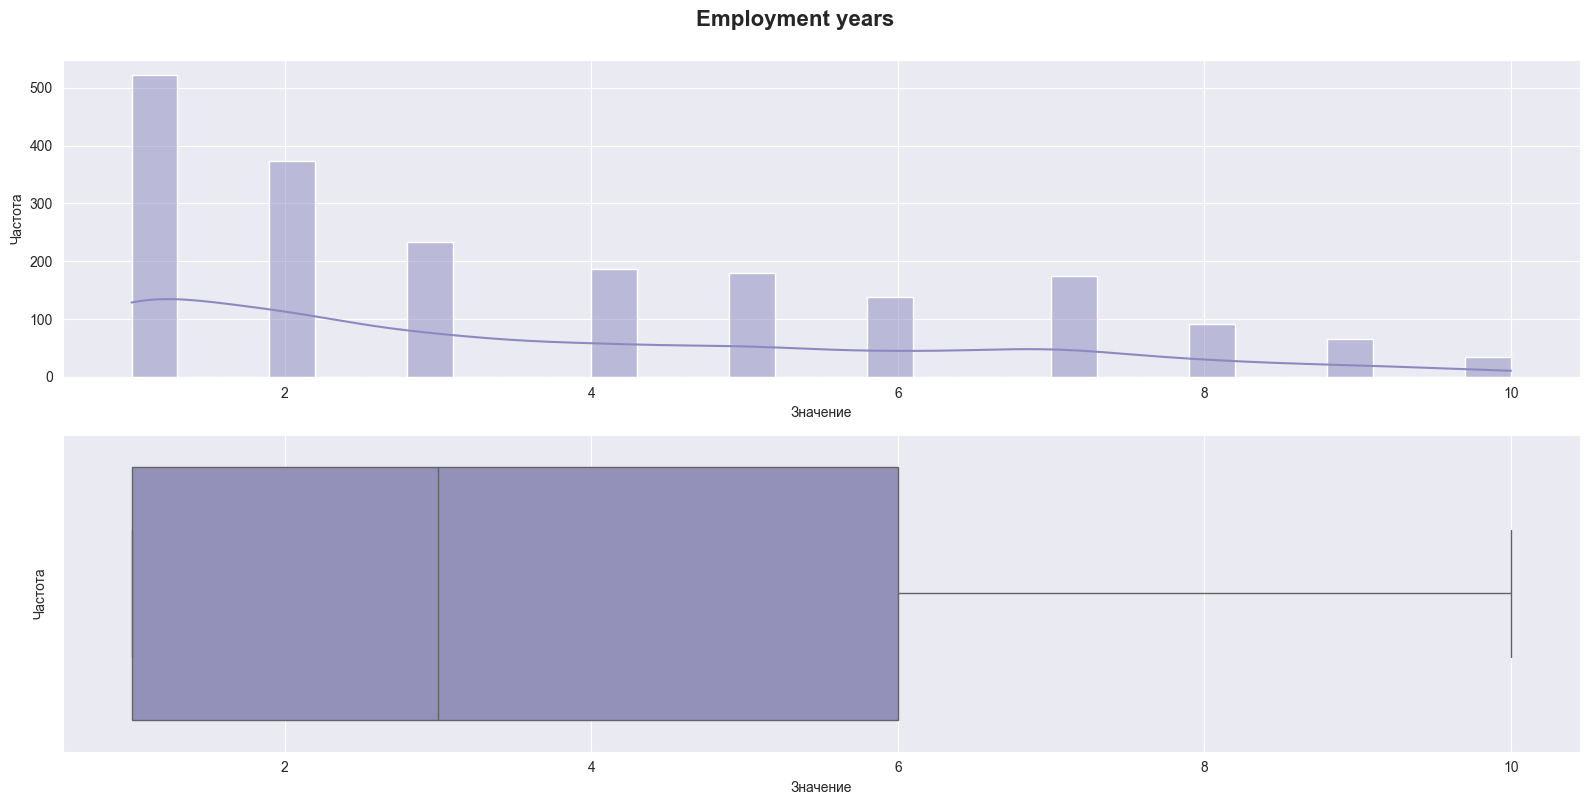

count   mean    std    min    25%    50%    75%     max
employment_years 2000.0000 3.6700 2.5400 1.0000 1.0000 3.0000 6.0000 10.0000

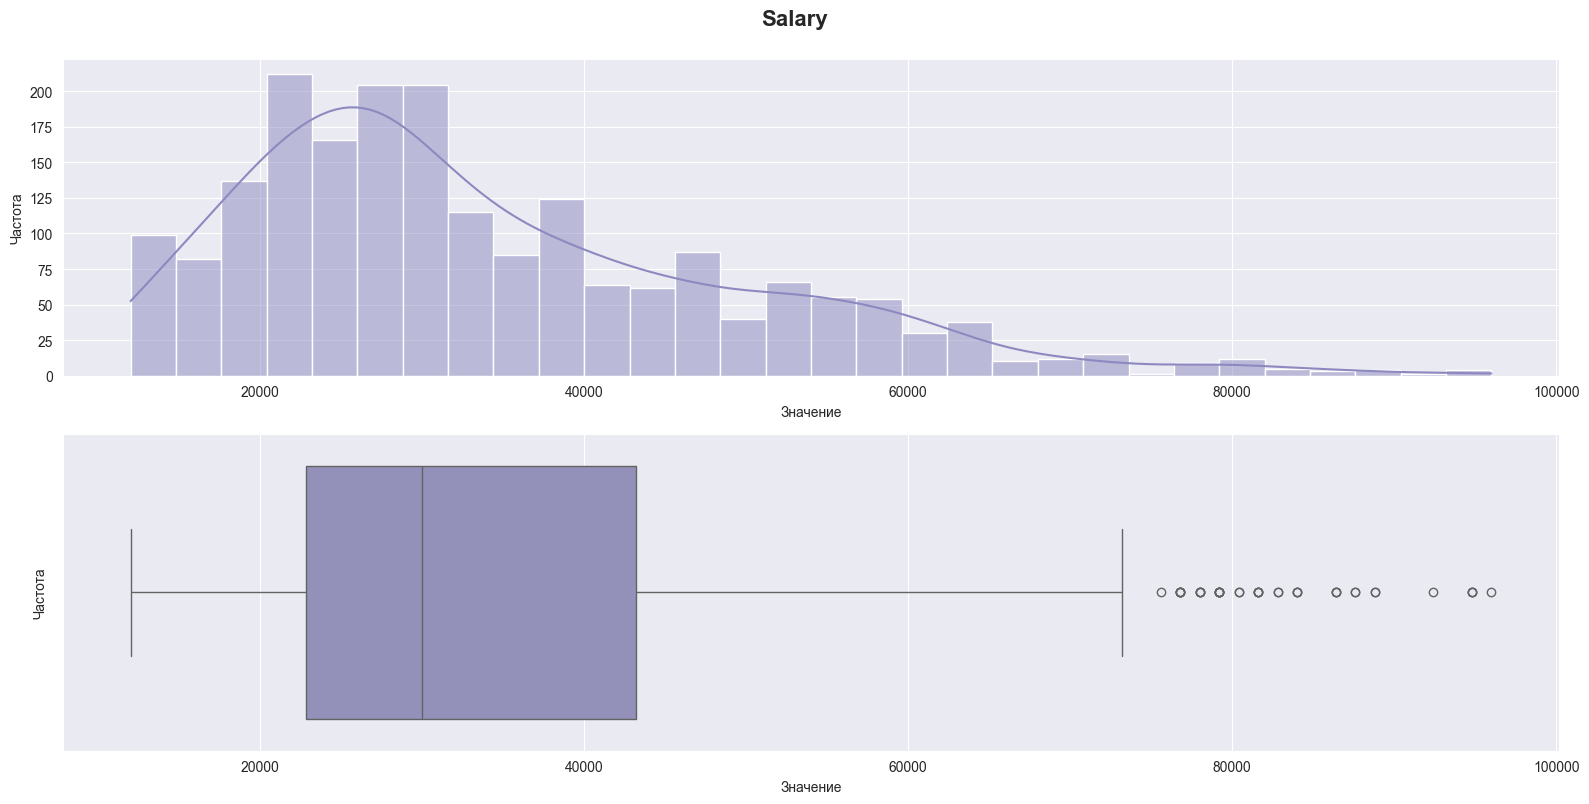

count       mean        std        min        25%        50%  \
salary 2000.0000 34066.8000 15398.4400 12000.0000 22800.0000 30000.0000   

              75%        max  
salary 43200.0000 96000.0000

In [44]:
# Анализ количественных данных
show_full_analysis_plots(test_features_cleaned, 'num')

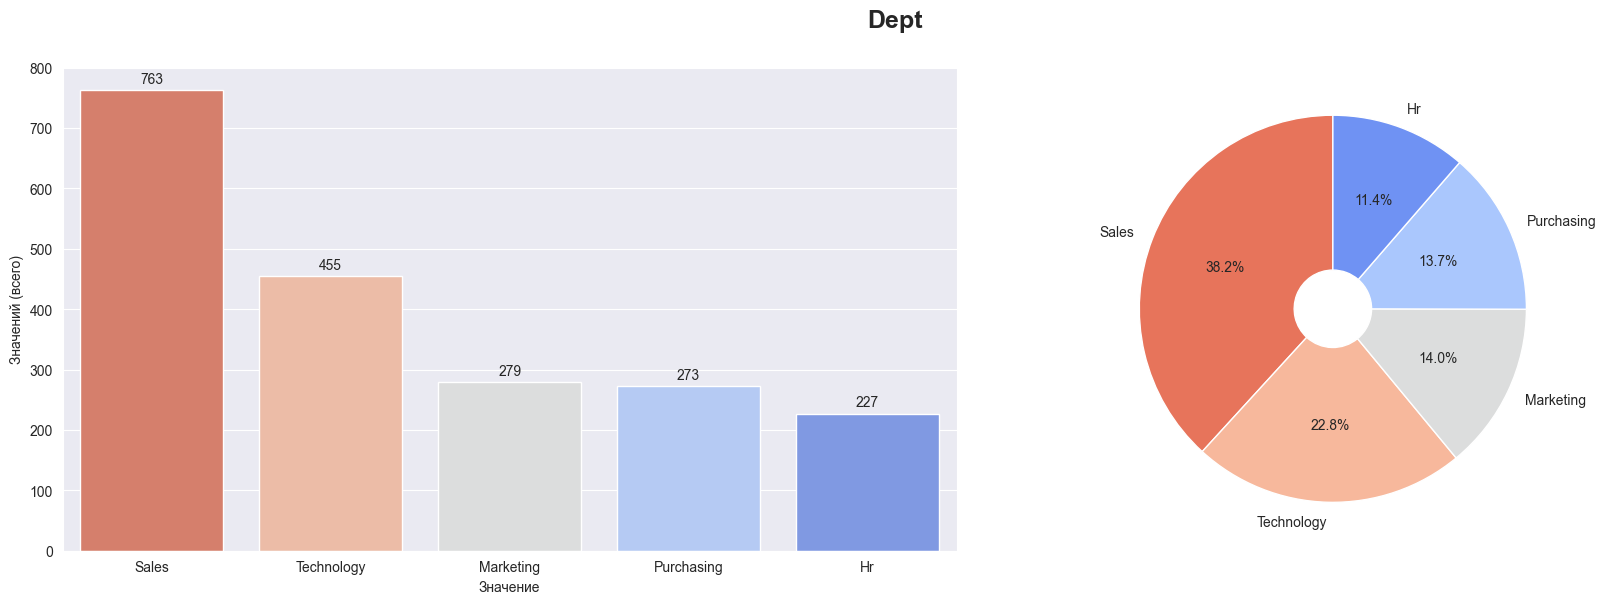

count unique    top freq
dept  1997      5  sales  763

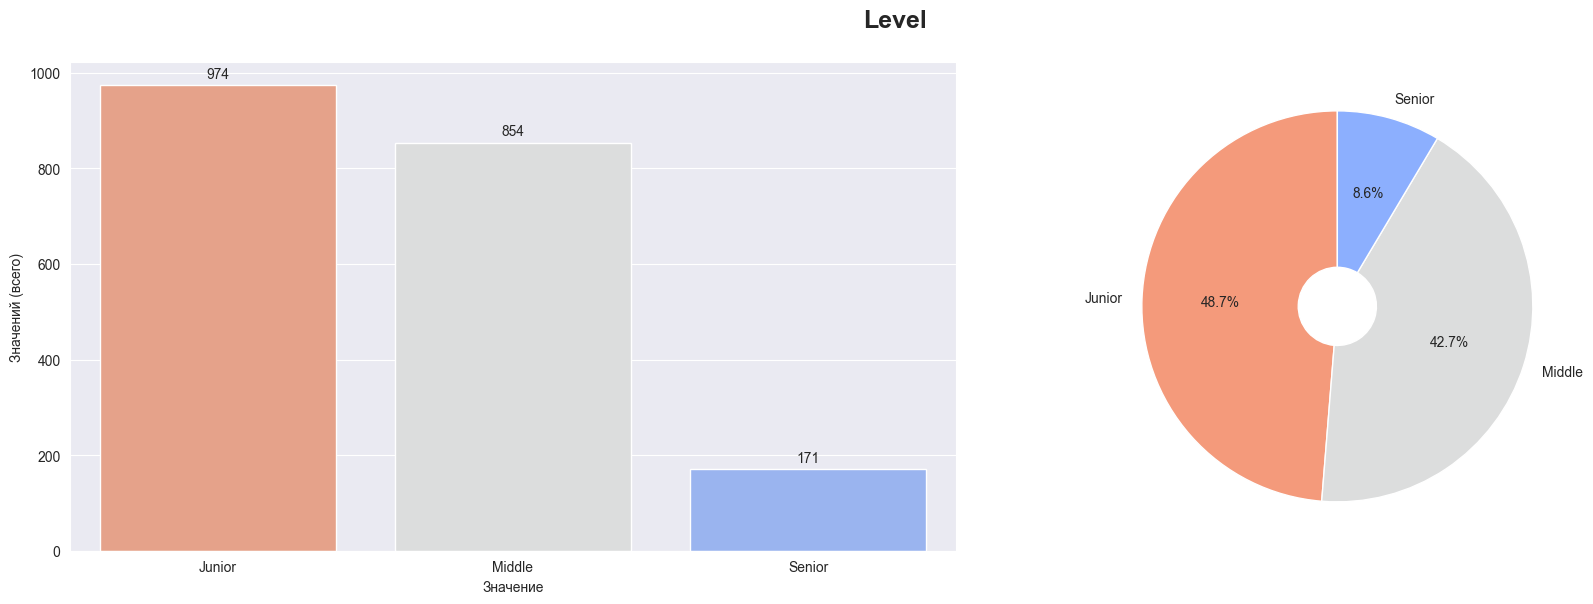

count unique     top freq
level  1999      3  junior  974

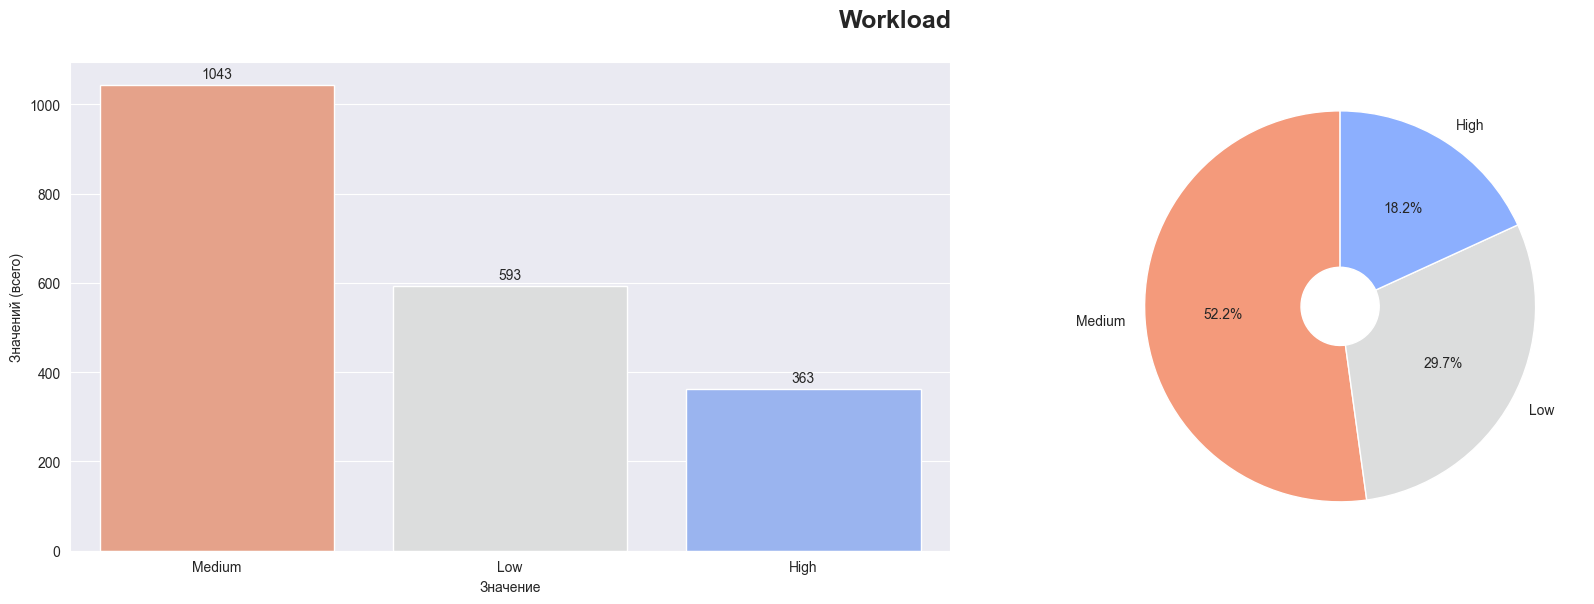

count unique     top  freq
workload  1999      3  medium  1043

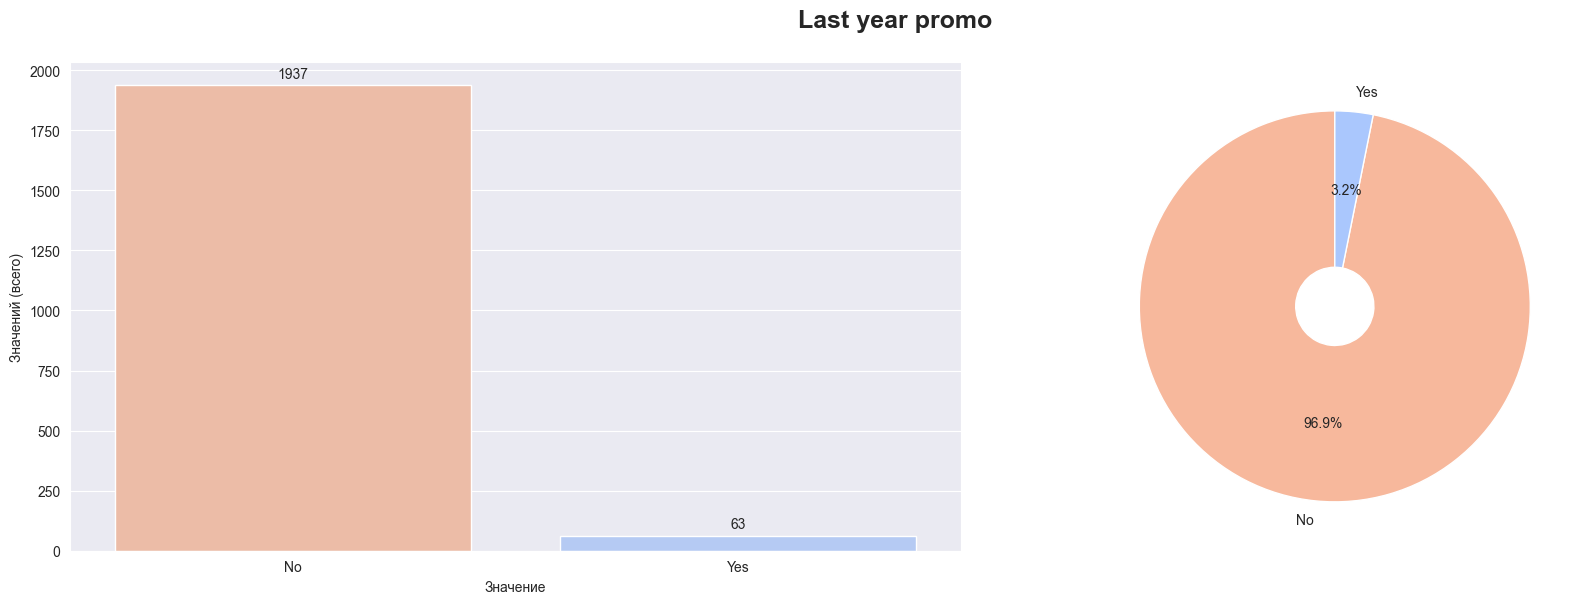

count unique top  freq
last_year_promo  2000      2  no  1937

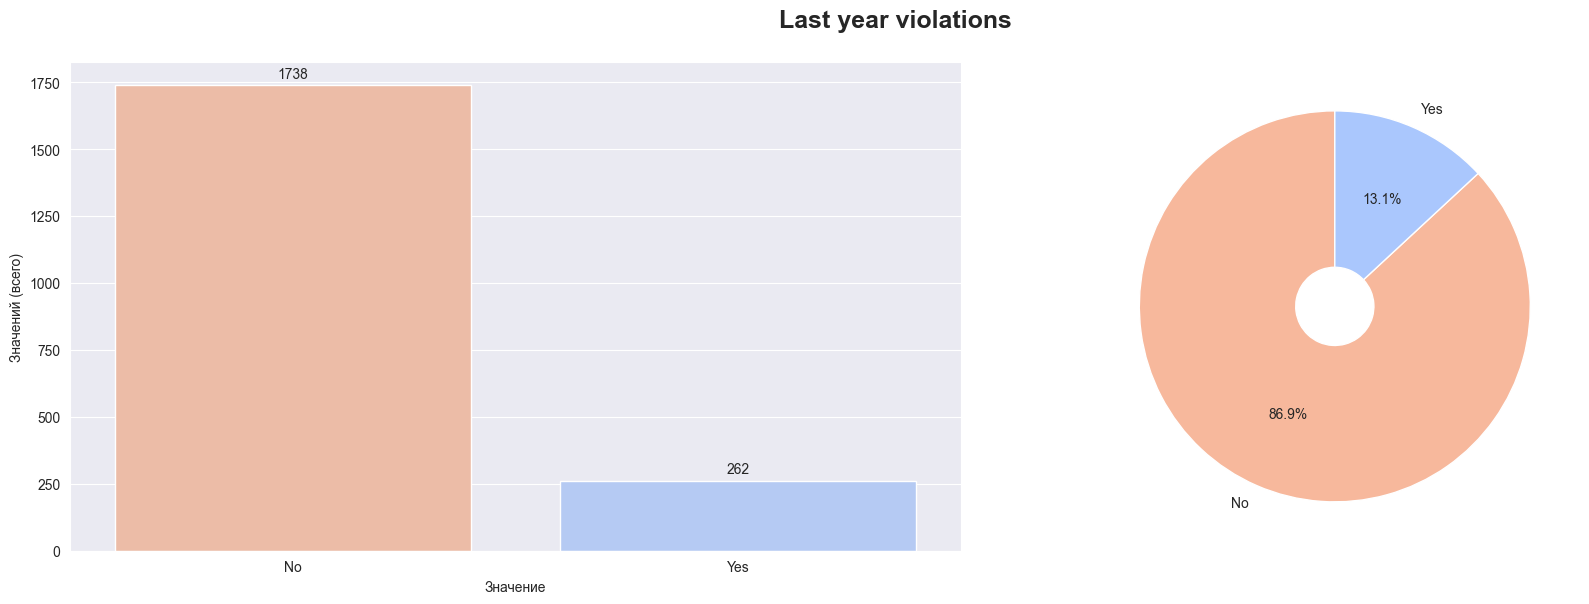

count unique top  freq
last_year_violations  2000      2  no  1738

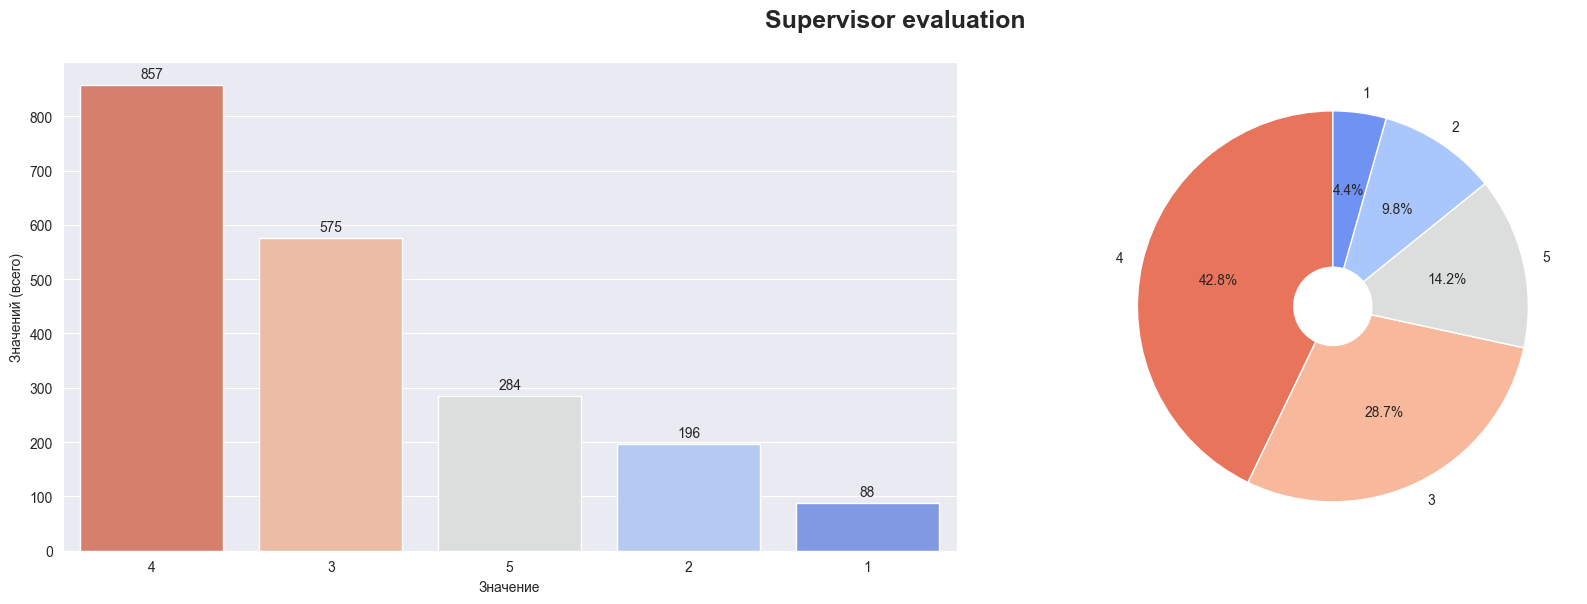

count  unique  top  freq
supervisor_evaluation   2000       5    4   857

In [45]:
# Анализ качественных данных
show_full_analysis_plots(test_features_cleaned, 'cat')

#### Кореляционный анализ

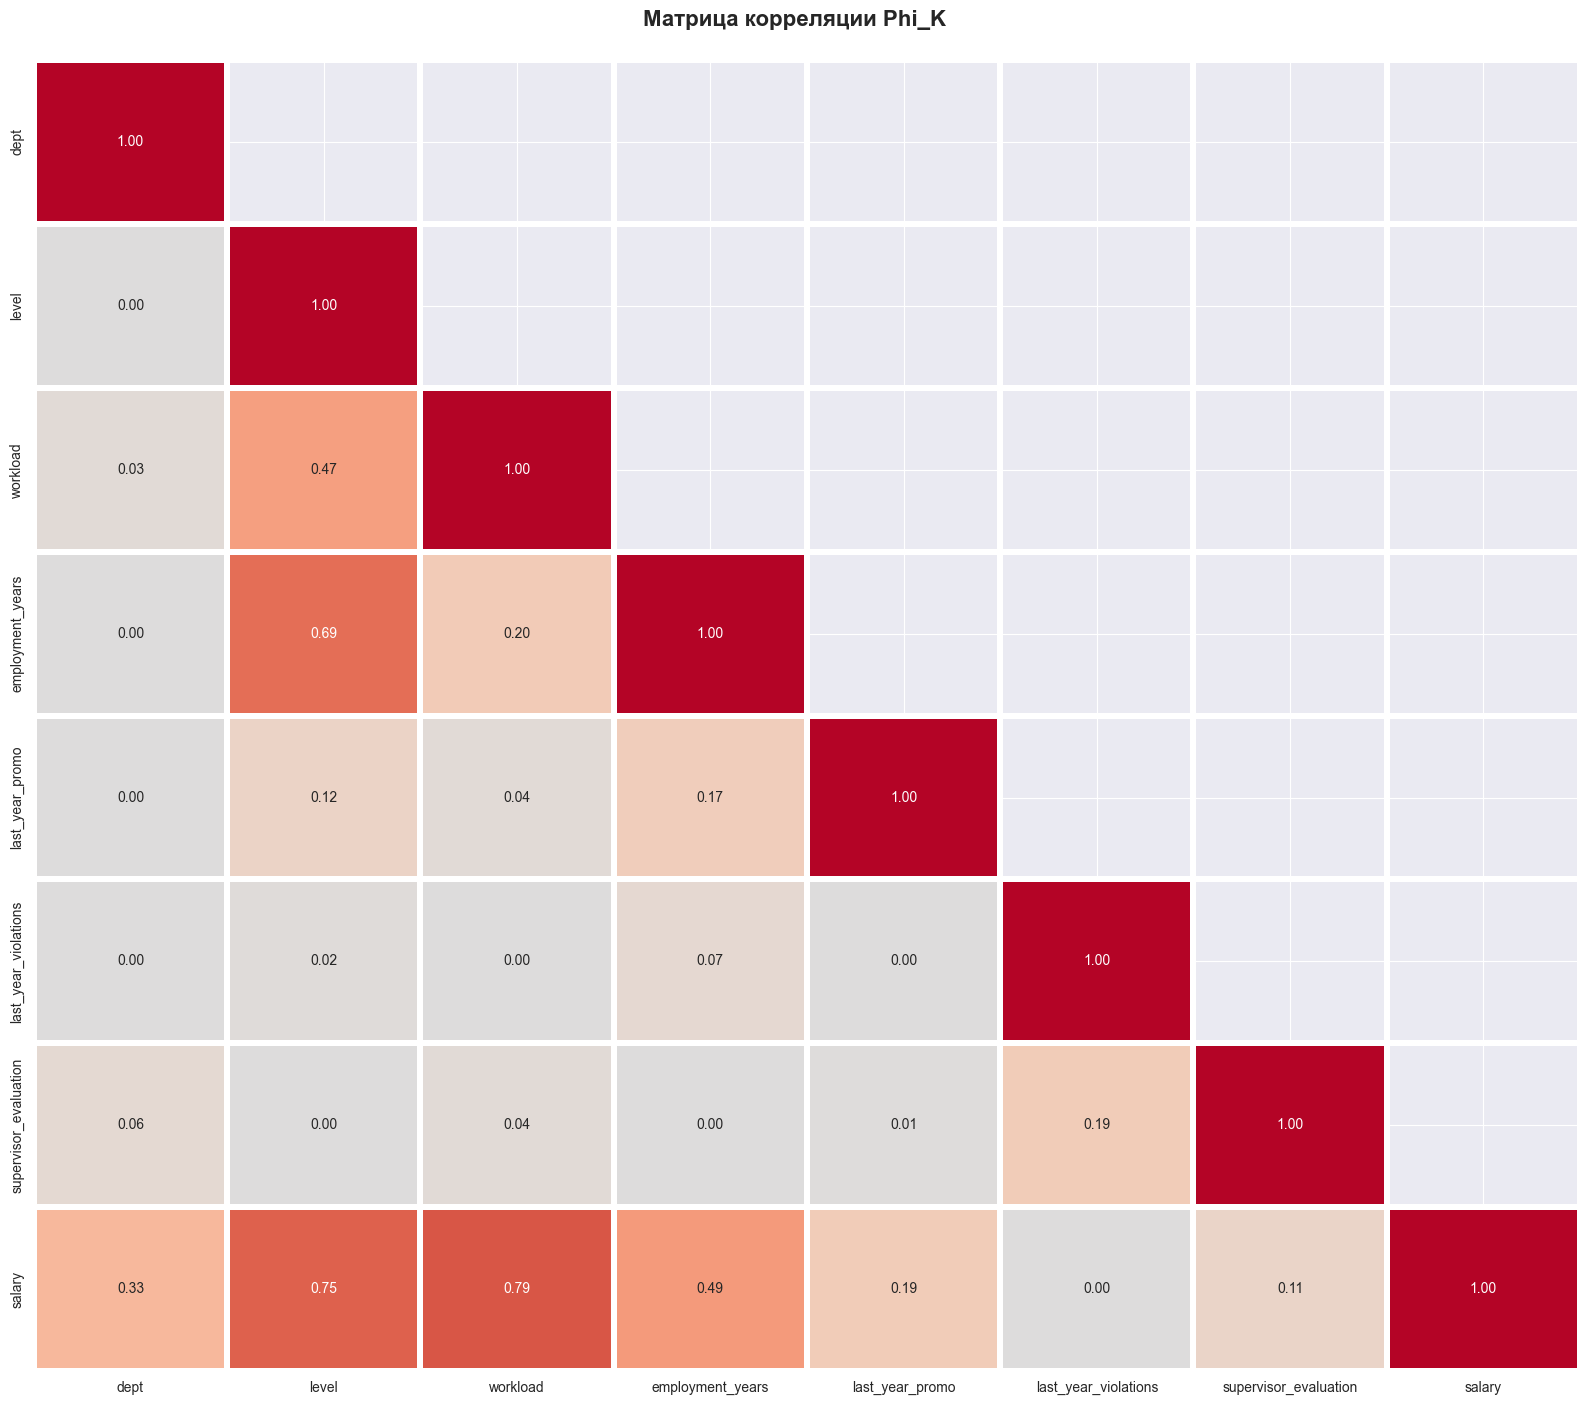

In [46]:
# Построение общей матрицы корреляции
# Отбор непрерывных величин для матрицы
test_features_interval_cols = (
    test_features_cleaned
    .drop(['employment_years', 'supervisor_evaluation'], axis=1)
    .select_dtypes(exclude=['category', object])
    .columns
)

# Настройки матрицы
test_features_corr_matrix = (
    test_features_cleaned
    .phik_matrix(interval_cols=test_features_interval_cols)
)

test_features_corr_mask = (
    np
    .triu(np.ones(test_features_corr_matrix.shape), k=1)
)

# Отображение матрицы
show_corr_heatmap_plot(
    test_features_corr_matrix,
    test_features_corr_mask
)

In [47]:
# Формирование таблицы уровней корреляции
test_features_corr_lvls = get_corr_levels(
    test_features_corr_matrix,
    test_features_corr_mask
)

test_features_corr_lvls.head(5)

## Корреляции по всем признакам
___


feat_1            feat_2   corr      lvl
17          workload            salary 0.7900  Высокая
12             level            salary 0.7500  Высокая
8              level  employment_years 0.6900  Средняя
21  employment_years            salary 0.4900   Слабая
7              level          workload 0.4700   Слабая

#### Выводы
**Анализ количественных данных:**
> - В признаке **Длительность работы** выбросов и аномалий не наблюдается, но можно отметить наименьшее кол-во сотрудников, которые остаются в компании надолго, т.е. более 3-х лет
> - В признаке **Зарплата** наблюдаются аномальные значения и выбросы. Вероятно, это является нормой, т.к. некоторые сотрудники определенного грейда могут иметь более высокие зарплаты по сравнению с другими

**Анализ качественных данных:**
> - В признаке **Отдел** явно лидирует отдел продаж (763 сотрудника или 38.2% от общего числа по отделам), 
> - В признаке **Уровень грейда** можно заметить, что специалисты уровня Junior и Middle являются самыми многочисленными и практически равными (разница в 120 чел.), при этом грейд Senior самый малочисленный. Это может являться нормой, т.к. специалистов уровня Senior довольно редко можно встретить на рынке труда и часто компаниям не требуется их большое кол-во
> - В признаке **Уровень загруженности** можно отметить, что в целом у половины сотрудников (1043 чел.) она Средняя, что является оптимальным для большинства компаний
> - В признаке **Наличие повышений (последний год)** наблюдается явный перевес в пользу его отсутствия (всего 63 из 2000). Можно сделать предварительный вывод о том, что компания неохотно занимается повышением сотрудников, что не очень хорошо может влиять на удовлетворенность
> - В признаке **Наличие нарушений (последний год)** наблюдяется явный перевес в пользу их отсутствия (262 зафиксированных нарушения против 2000)
> - В признаке **Оценка работы руководителем** в качестве самых частых можно выделить 4 (857 оценок) и 3 (575 оценок)

**Кореляционный анализ матрицы:**

> Предварительный анализ матрицы корреляции показал, что:
> - **Уровень загруженности** оказывает сильное влияние на **Уровень зарплаты** - **`0.79`**
> - **Уровень грейда** также оказывает сильное влияние на **Уровень зарплаты** - **`0.75`** и оказывает среднее (но близкое к высокому) влияние на **Длительность работы** - **`0.69`**

### Анализ признаков удовлетворенности сотрудников
___

#### Общий анализ: `test_target_jsr_cleaned`

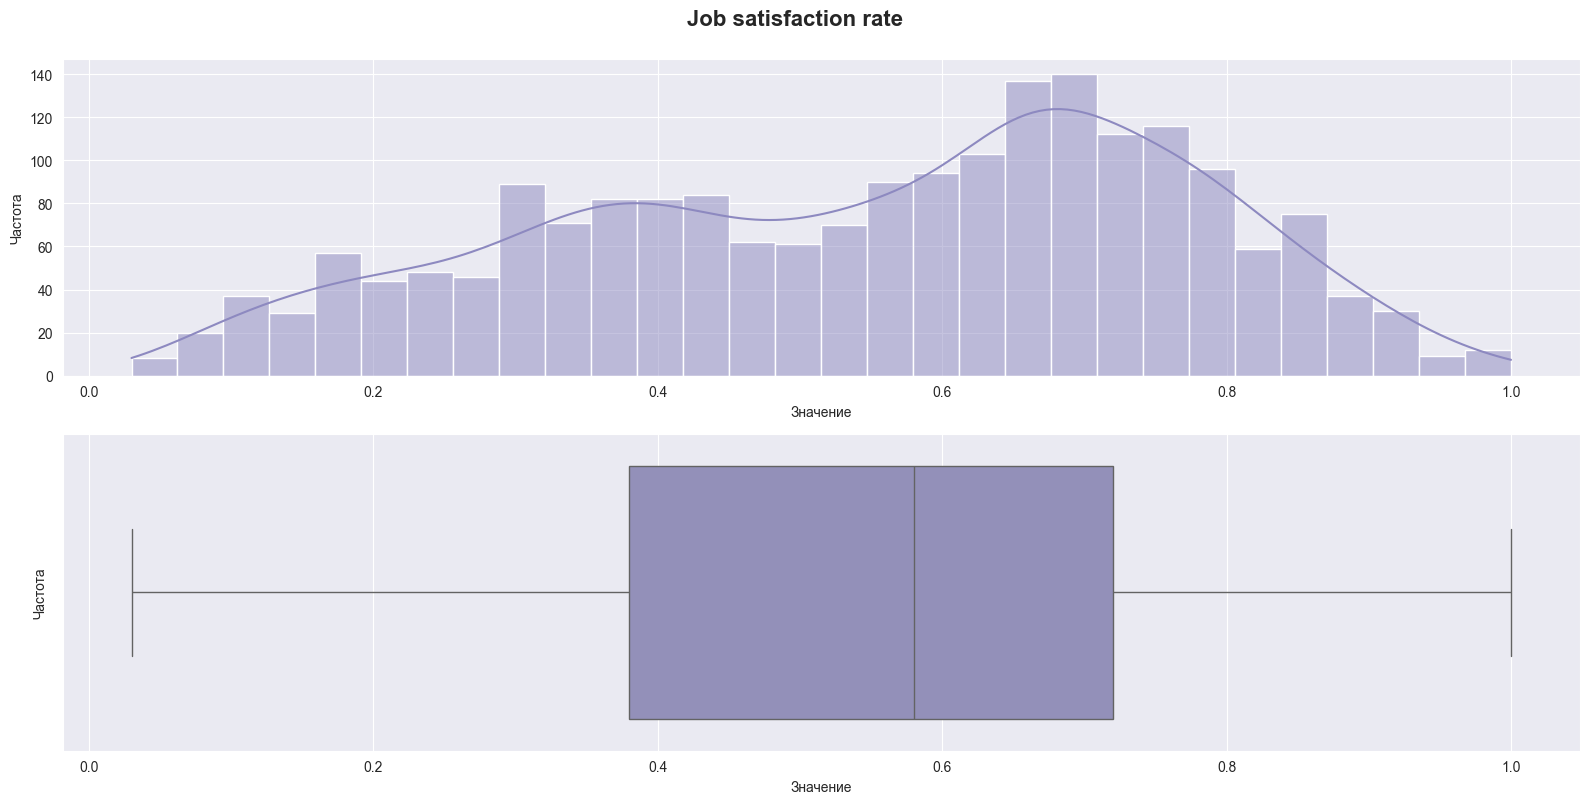

count   mean    std    min    25%    50%    75%  \
job_satisfaction_rate 2000.0000 0.5500 0.2200 0.0300 0.3800 0.5800 0.7200   

                         max  
job_satisfaction_rate 1.0000

In [48]:
# Анализ количественных данных
show_full_analysis_plots(test_target_jsr_cleaned, 'num')

#### Анализ распределения данных:  `'jsr' + 'test_features'`

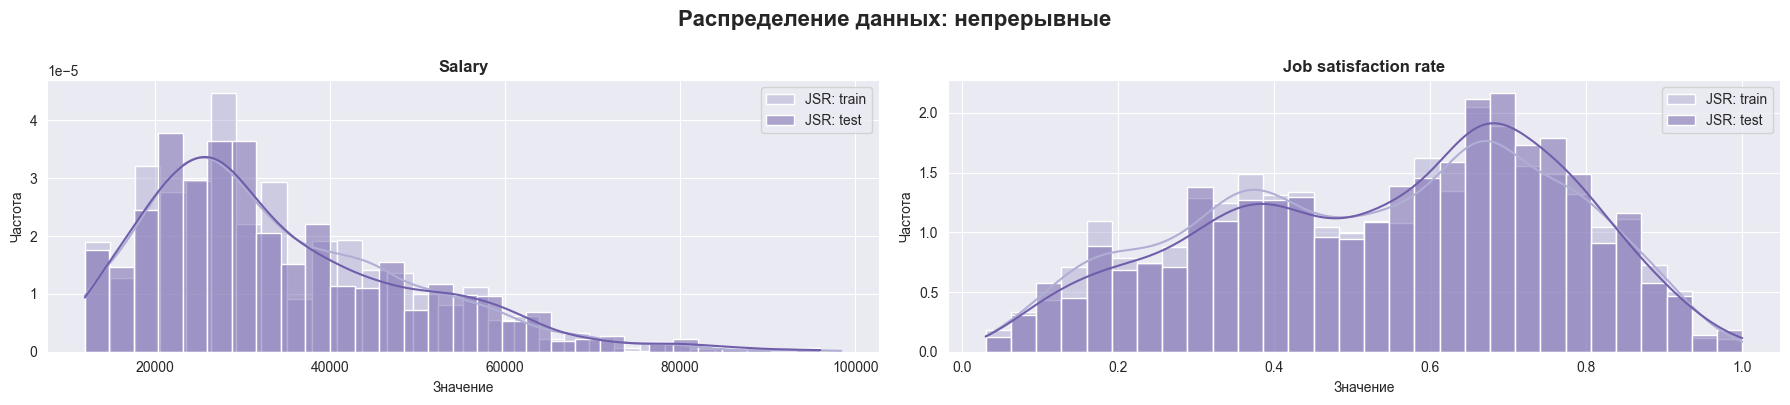

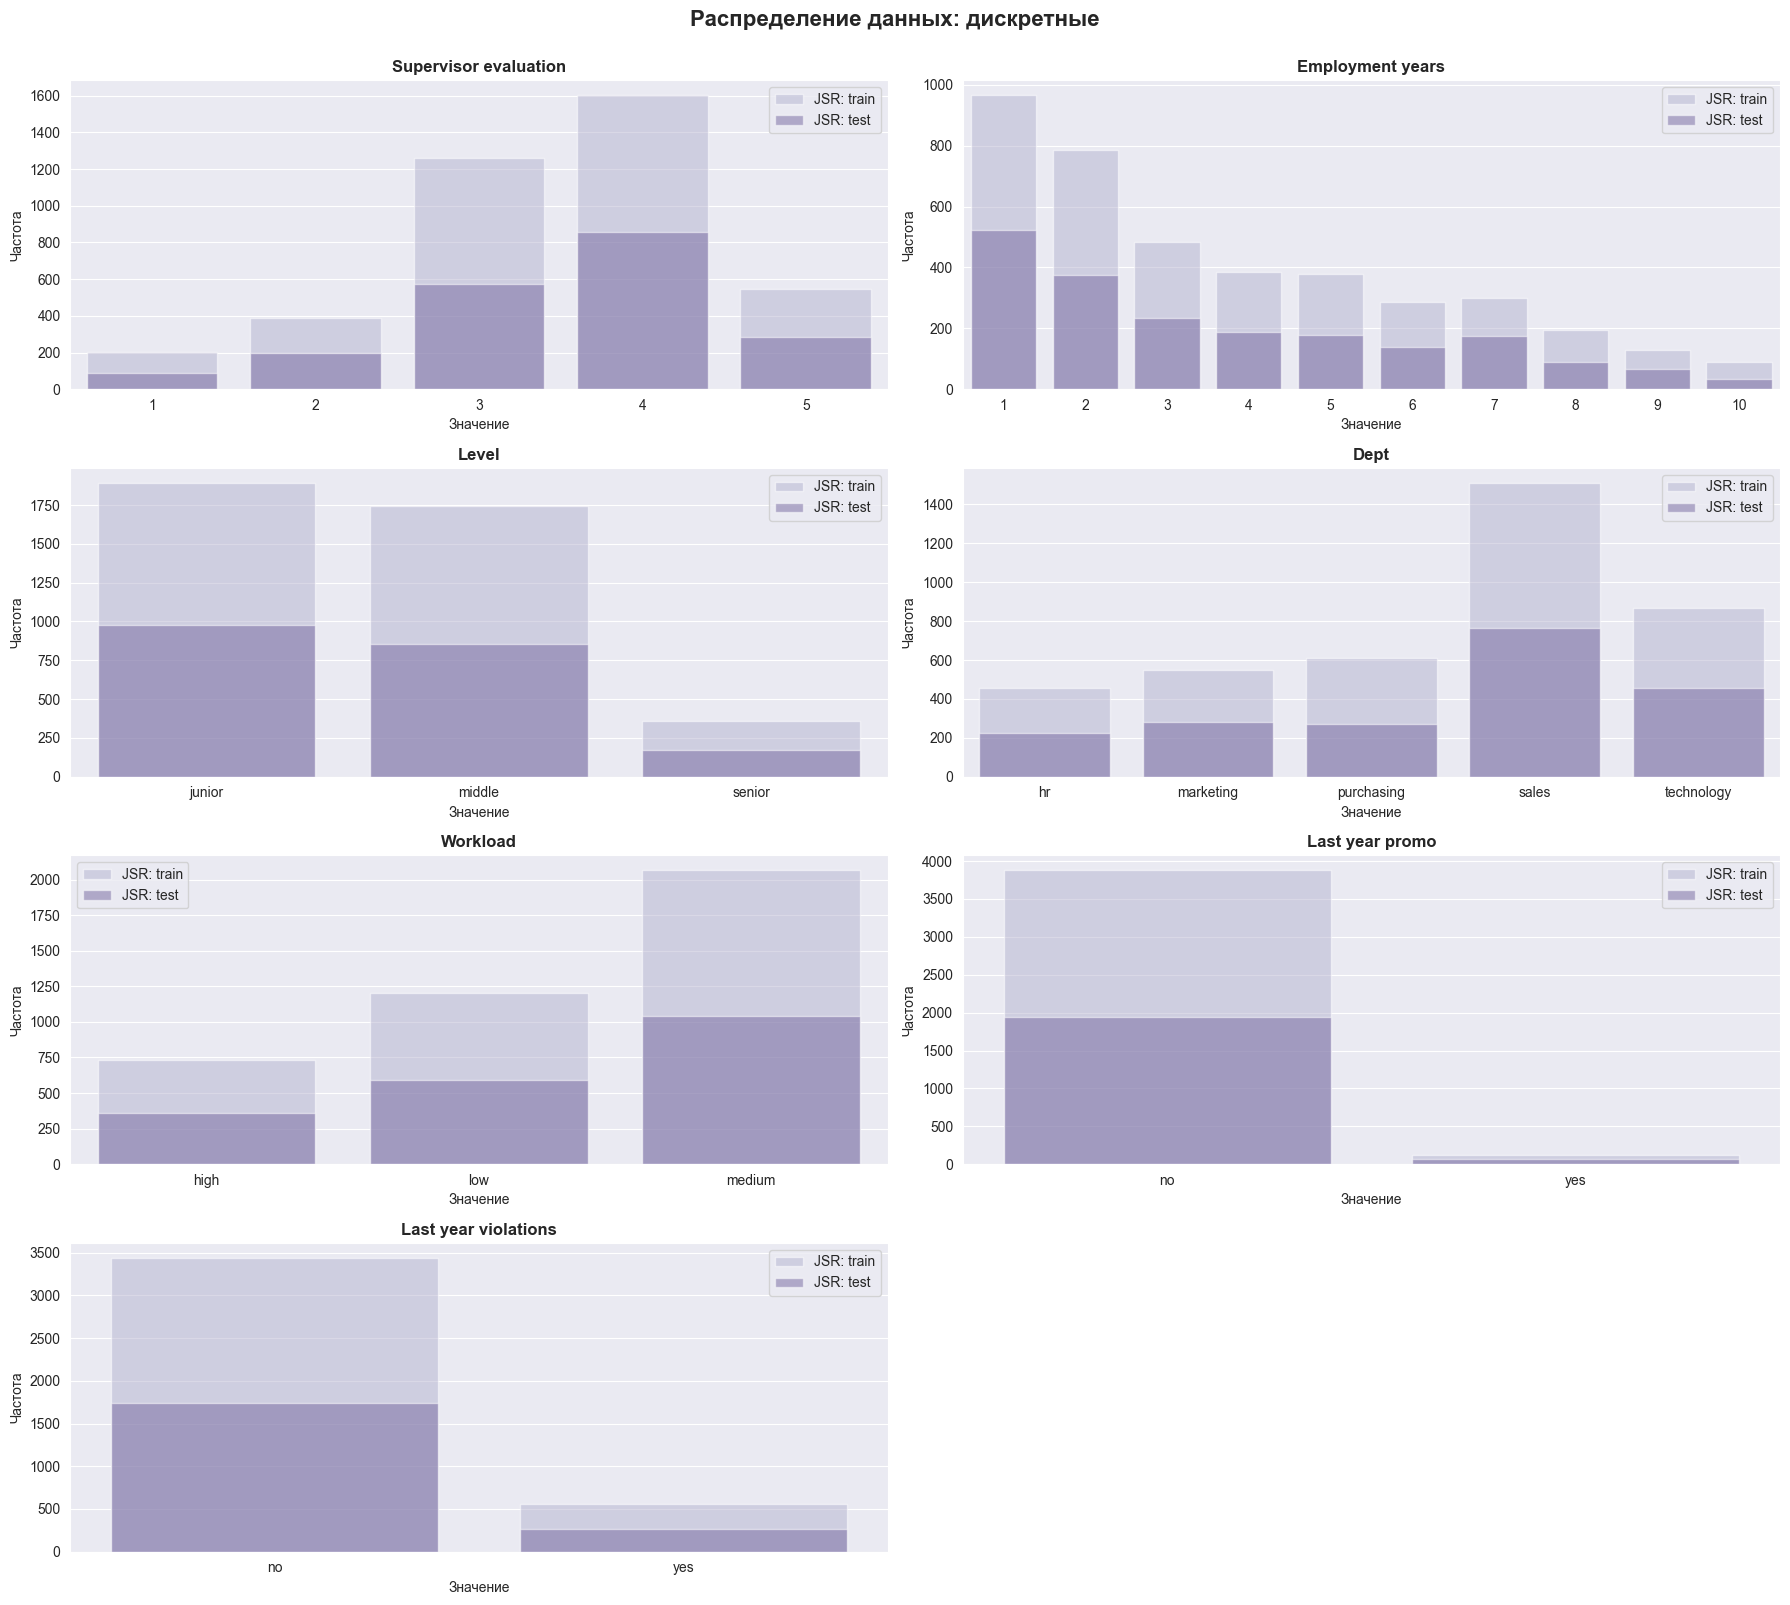

In [49]:
# Объединение тренировочного датафрейма с тестовым
# и построение графиков распределения
jsr_data_merged = test_features_cleaned.merge(test_target_jsr_cleaned, on='id')

discrete_features = [
    'supervisor_evaluation',
    'employment_years', 
    'level', 
    'dept', 
    'workload',
    'last_year_promo', 
    'last_year_violations',
]

show_compared_histplots(
    train_jsr_cleaned,
    jsr_data_merged,
    jsr_data_merged.columns,
    discrete_features,
    df1_label='JSR: train',
    df2_label='JSR: test'
)

#### Кореляционный анализ: `train_jsr_cleaned`

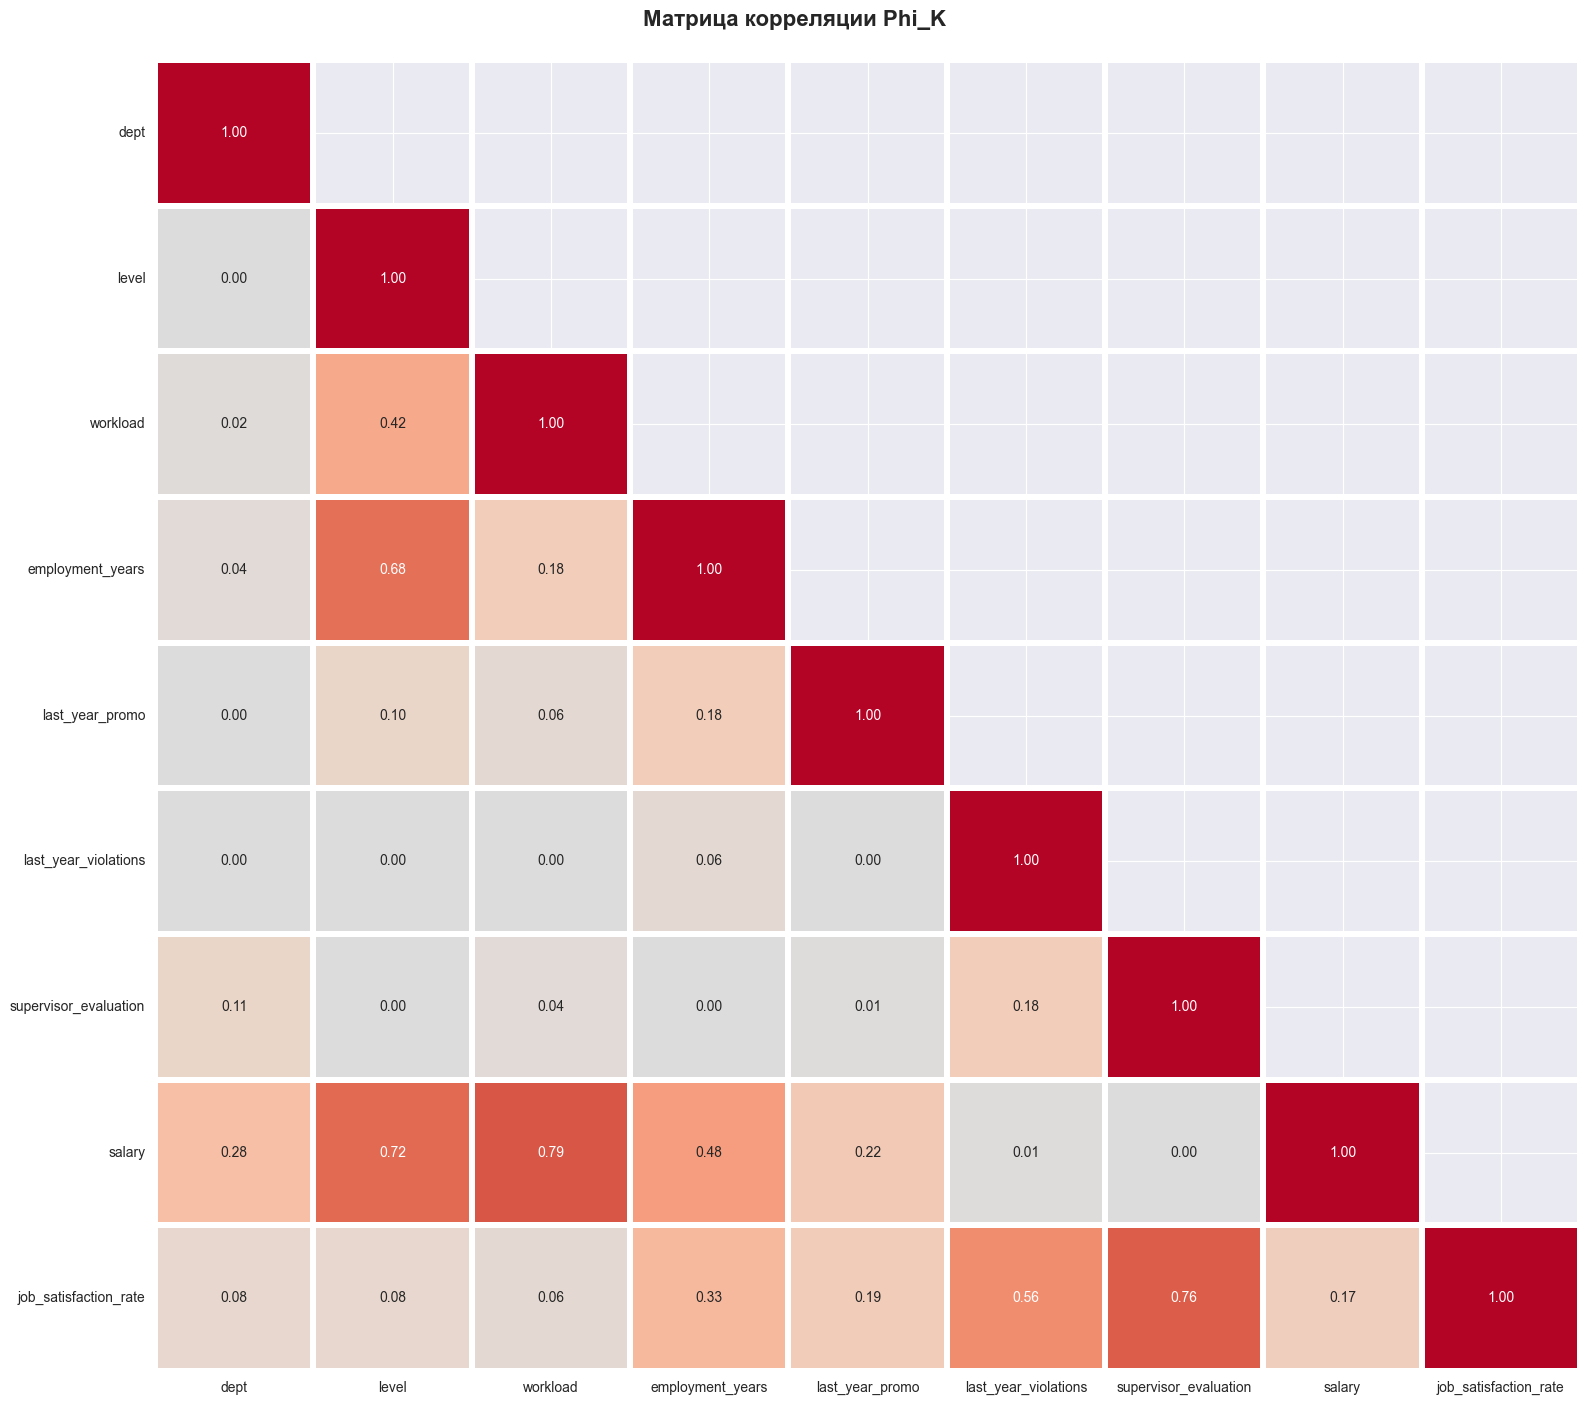

In [50]:
# Построение общей матрицы корреляции
# Отбор непрерывных величин для матрицы
train_jsr_interval_cols = (
    train_jsr_cleaned
    .drop(['employment_years', 'supervisor_evaluation'], axis=1)
    .select_dtypes(exclude=['category', object])
    .columns
)

# Настройки матрицы
train_jsr_corr_matrix = (
    train_jsr_cleaned
    .phik_matrix(interval_cols=train_jsr_interval_cols)
)

train_jsr_corr_mask = (
    np
    .triu(np.ones(train_jsr_corr_matrix.shape),k=1)
)

# Отображение матрицы
show_corr_heatmap_plot(
    train_jsr_corr_matrix,
    train_jsr_corr_mask
)

In [51]:
# Формирование таблицы уровней корреляции
train_jsr_corr_lvls = get_corr_levels(
    train_jsr_corr_matrix,
    train_jsr_corr_mask,
    target=TARGET_JSR
)

train_jsr_corr_lvls.head(5)

## Корреляция по целевому признаку: `job_satisfaction_rate`
___


feat_1                 feat_2   corr           lvl
34  supervisor_evaluation  job_satisfaction_rate 0.7600       Высокая
32   last_year_violations  job_satisfaction_rate 0.5600       Средняя
25       employment_years  job_satisfaction_rate 0.3300        Слабая
29        last_year_promo  job_satisfaction_rate 0.1900        Слабая
35                 salary  job_satisfaction_rate 0.1700  Очень слабая

#### Анализ разброса и плотности данных `train_jsr_cleaned`

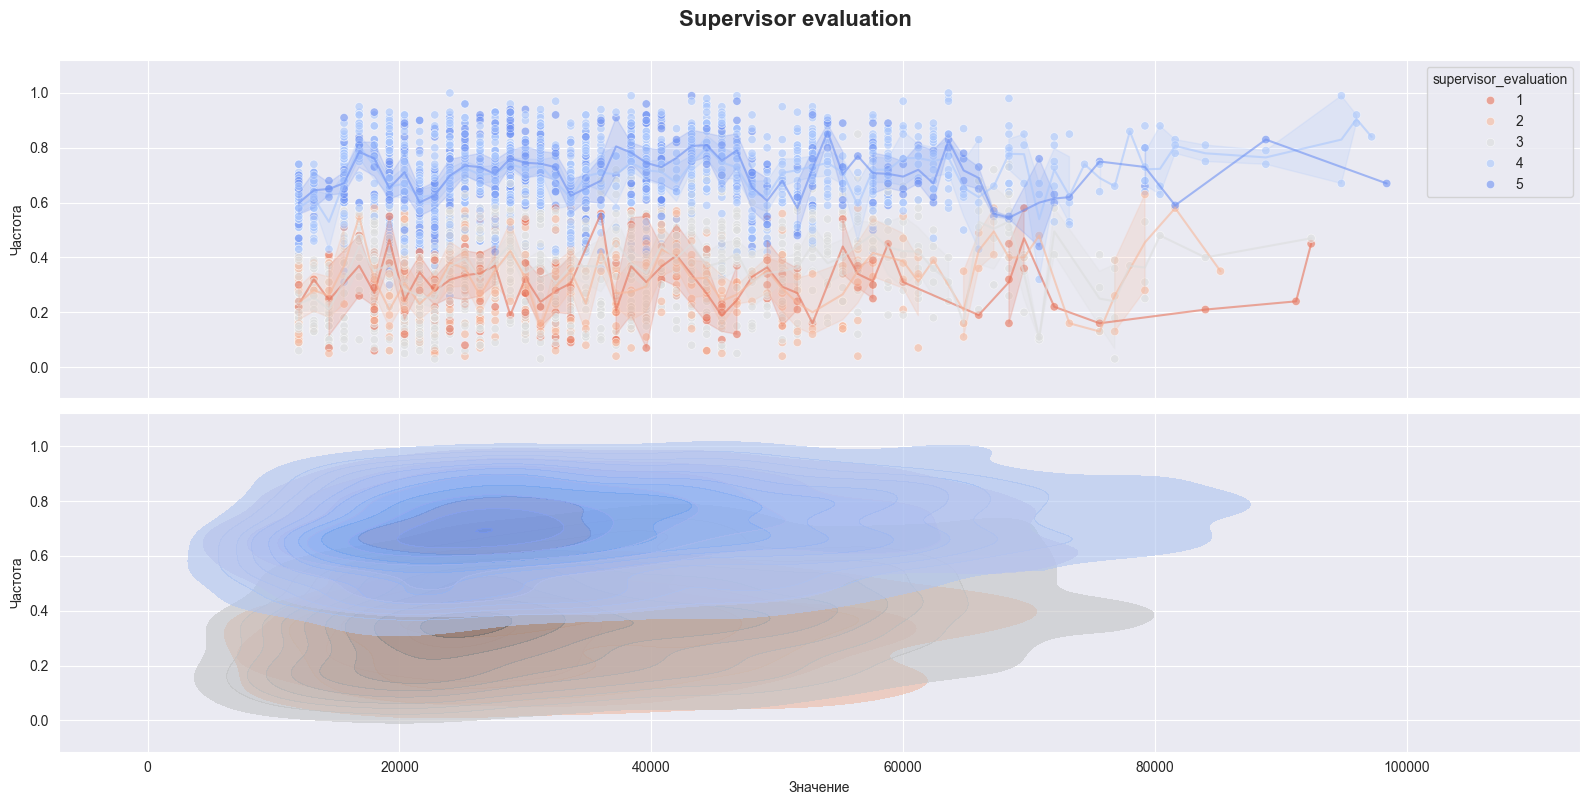

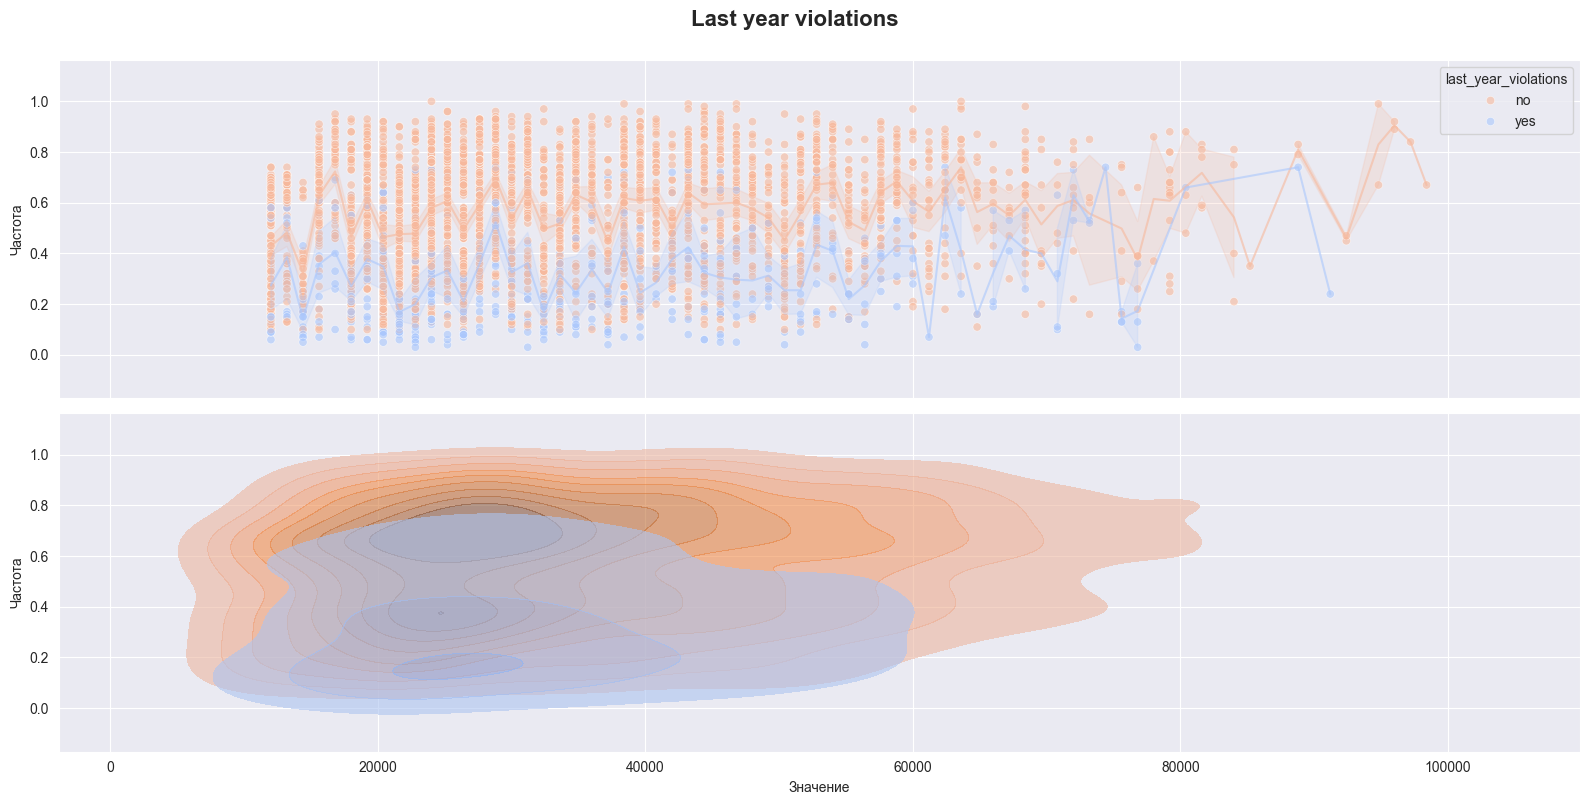

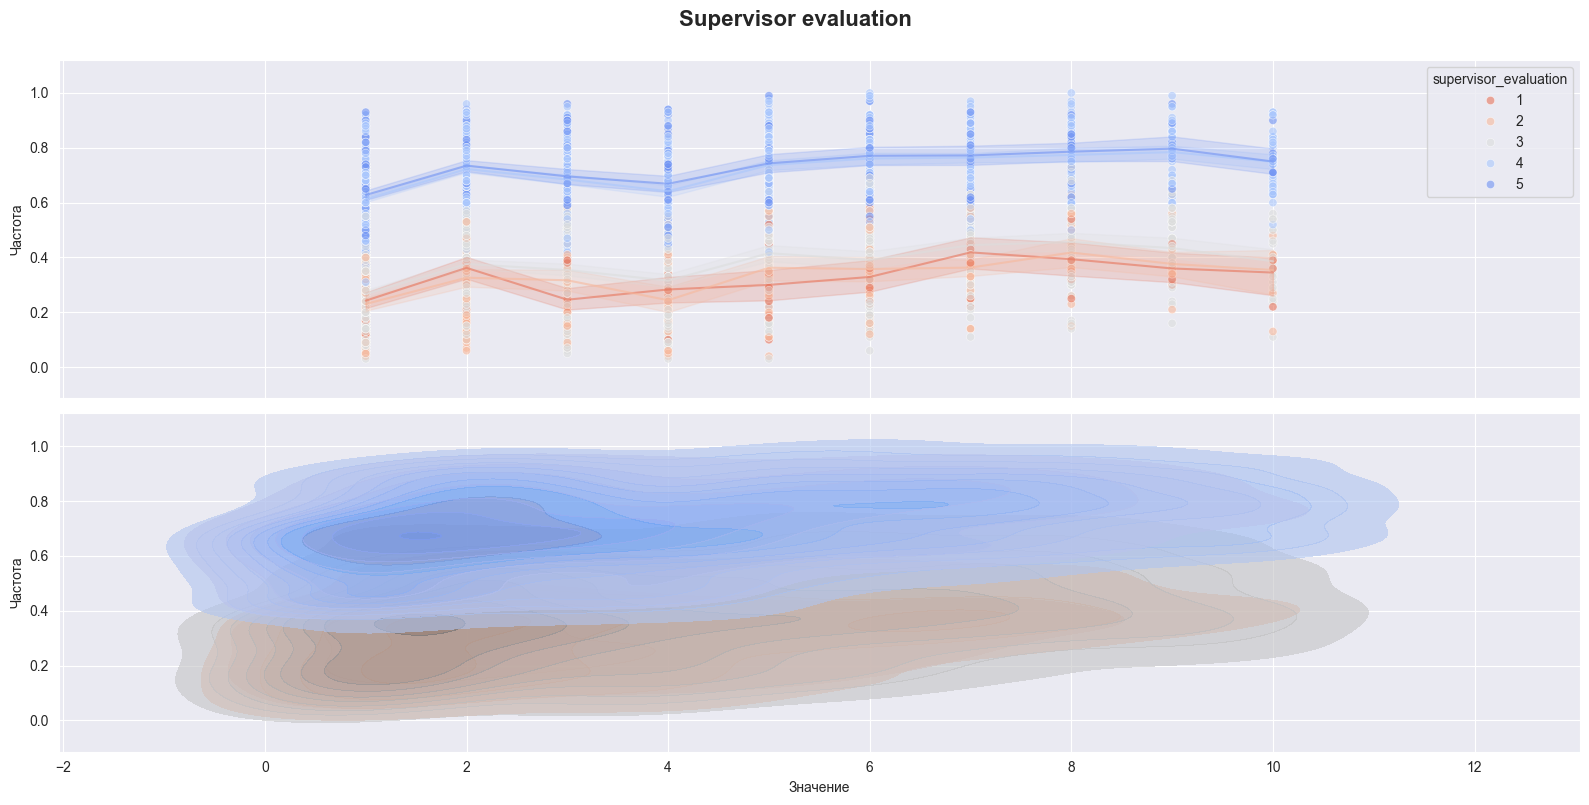

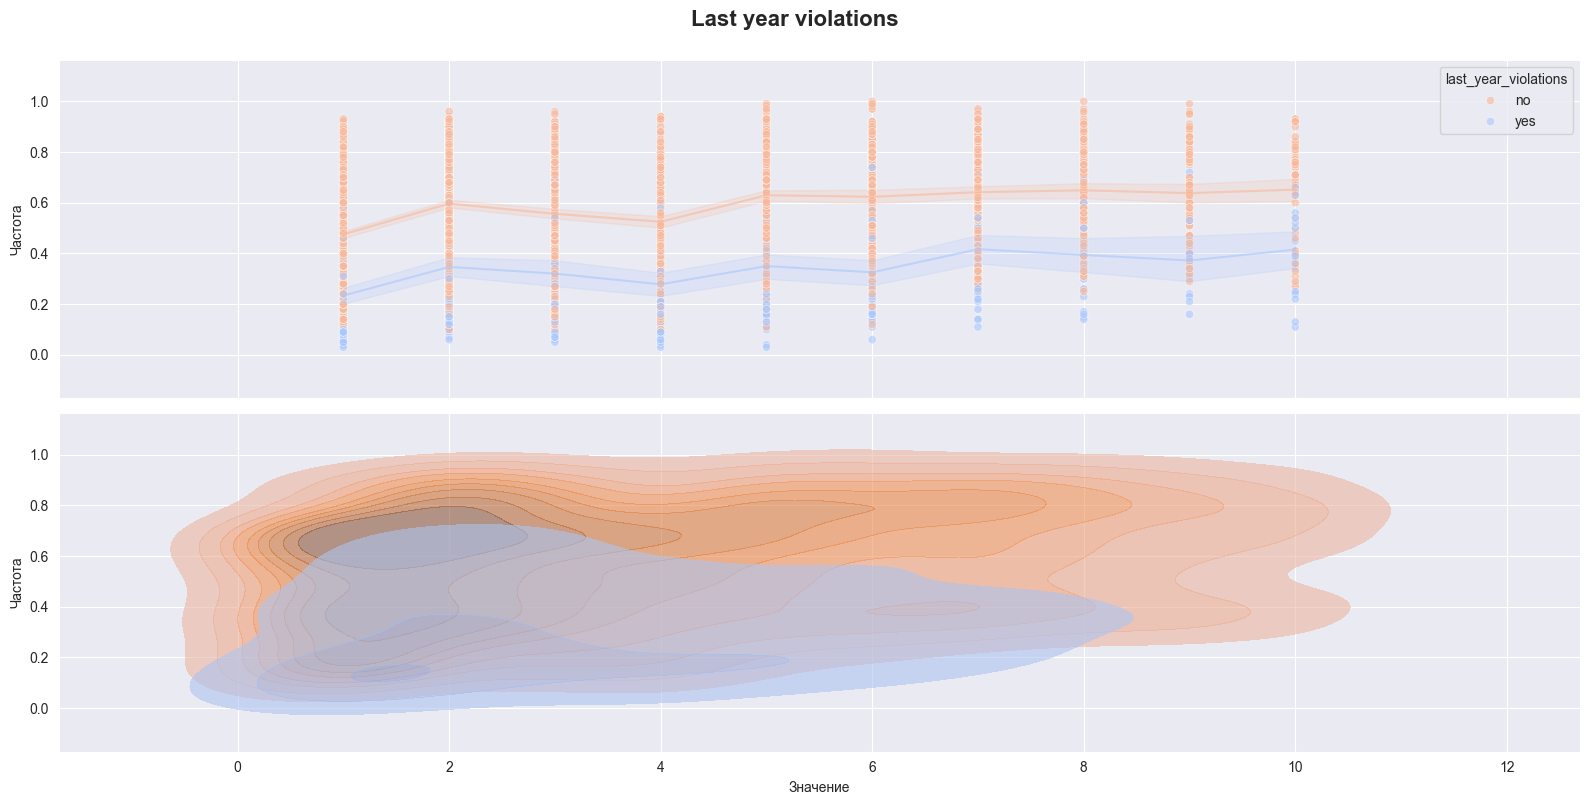

In [52]:
# Построение графика плотности и разброса
# в соотношении целевого к зарплате (месяц) и длительности работы (лет)
# к оценке качества работы и нарушению ТД
for x in ['salary', 'employment_years']:
    show_scatter_kde_plot(
        train_jsr_cleaned,
        x=x,
        y=TARGET_JSR,
        hue='supervisor_evaluation'
    )
    
    show_scatter_kde_plot(
        train_jsr_cleaned,
        x=x,
        y=TARGET_JSR,
        hue='last_year_violations'
    )

#### Выводы

**Общий анализ `test_target_jsr_cleaned`:**
> - На графике целевого признака каких-либо аномалий не наблюдается. График имеет распределение стремящееся к нормальному и его медиана нахходятся на уровне **`0.58`**

**Анализ распределения данных:  `'jsr' + 'test_features'`:**
> - Каких-либо аномалий или несоответствий в распределении данных не обнаружено

**Кореляционный анализ `train_jsr_cleaned`:**
> Предварительный анализ матрицы корреляции по целевому признаку **Уровень удовлетворенности сотрудников** показал, что наибольшее влияние на него оказывают:
> - **оценка качества работы**, что может говорить о наличии эмоциональной (и, вероятно, необъективной со стороны оценщика) составляющей, которая влияет на дальнейшую мотивацию сотрудников
> - **нарушение ТД (последний год)**, что, напрямую указывает на наличие каких-либо проблем у самого сотрудника, которые и влияют на его удовлетворенность, и требует дальнейших более глубоких оценок

**Анализ разброса и плотности данных `train_jsr_cleaned`**
> - В общем по графикам **Оценки качества работы** можно сделать предварительный вывод, что низкая оценка приводит и к низкой удовлетворенности работой. Или же ситуация в другом - низкая удовлетворенность сотрудника влияет на последующую низкую оценку его работы. Обнаружить реальные причины пока не представляется возможным, необходимы дальнейшие исследования
> - По графикам **Нарушения ТД (последний год)**, можно заметить некоторую связь между удовлетворенностью сотрудника и его возможными нарушениями. Чем менее удовлетворен сотрудник работой, тем более вероятны нарушения с его стороны. Обратная ситуация кажется менее реалистичной, но тоже вероятна, для этого необходимы дальнейшие исследования

### Анализ вероятности ухода сотрудника
___

#### Общий анализ `test_target_quit_cleaned`

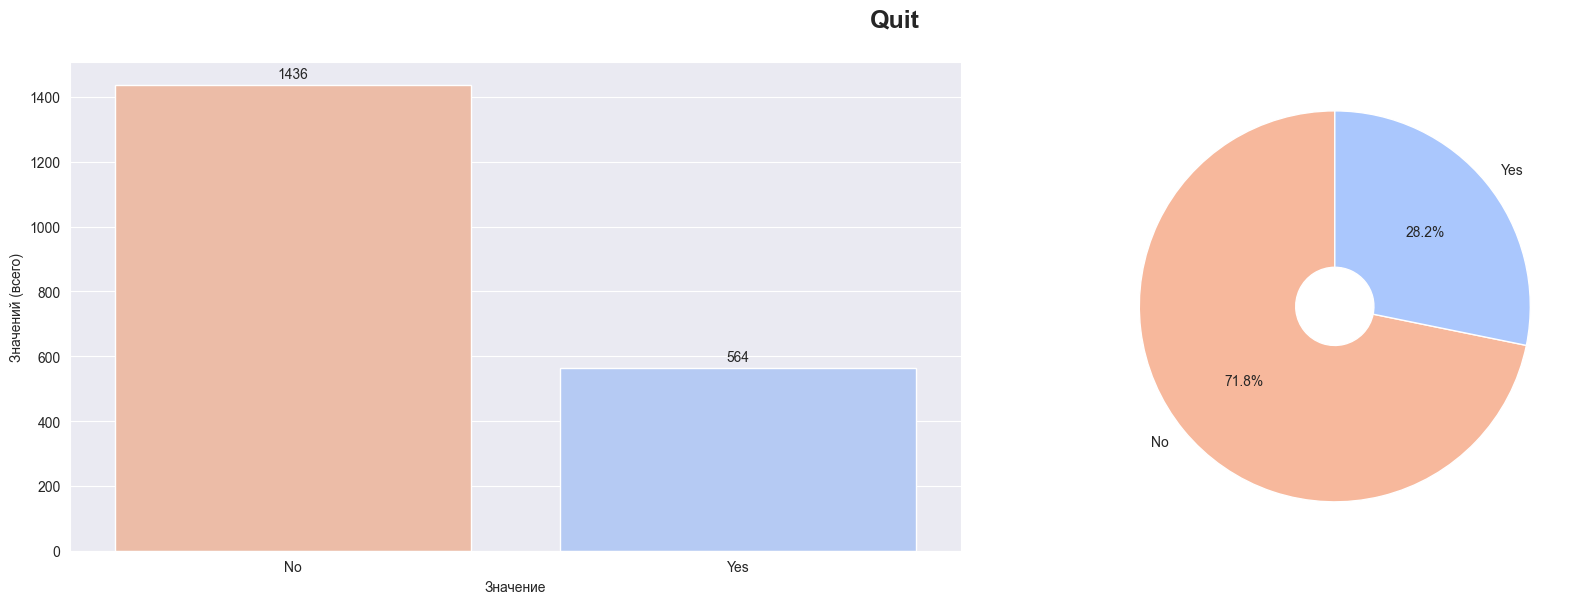

count unique top  freq
quit  2000      2  no  1436

In [53]:
show_full_analysis_plots(test_target_quit_cleaned, 'cat')

#### Анализ распределения данных:  `'quit' + 'test_features'`

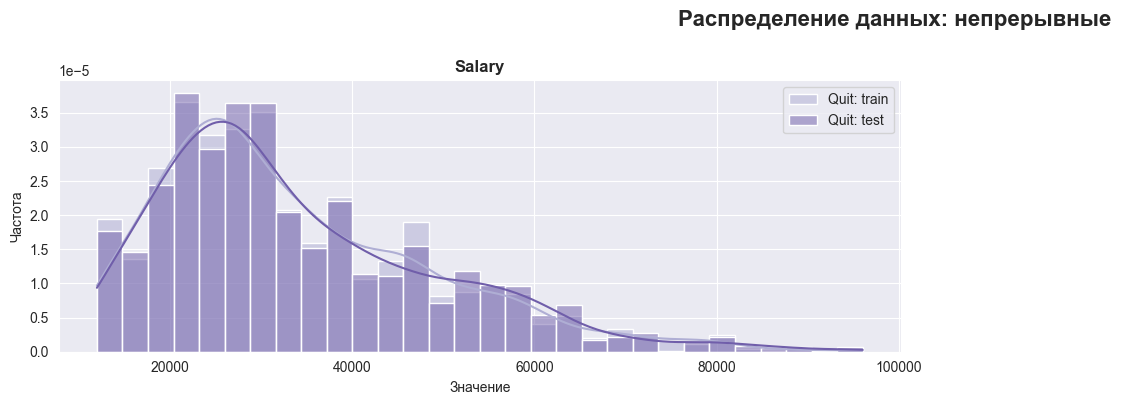

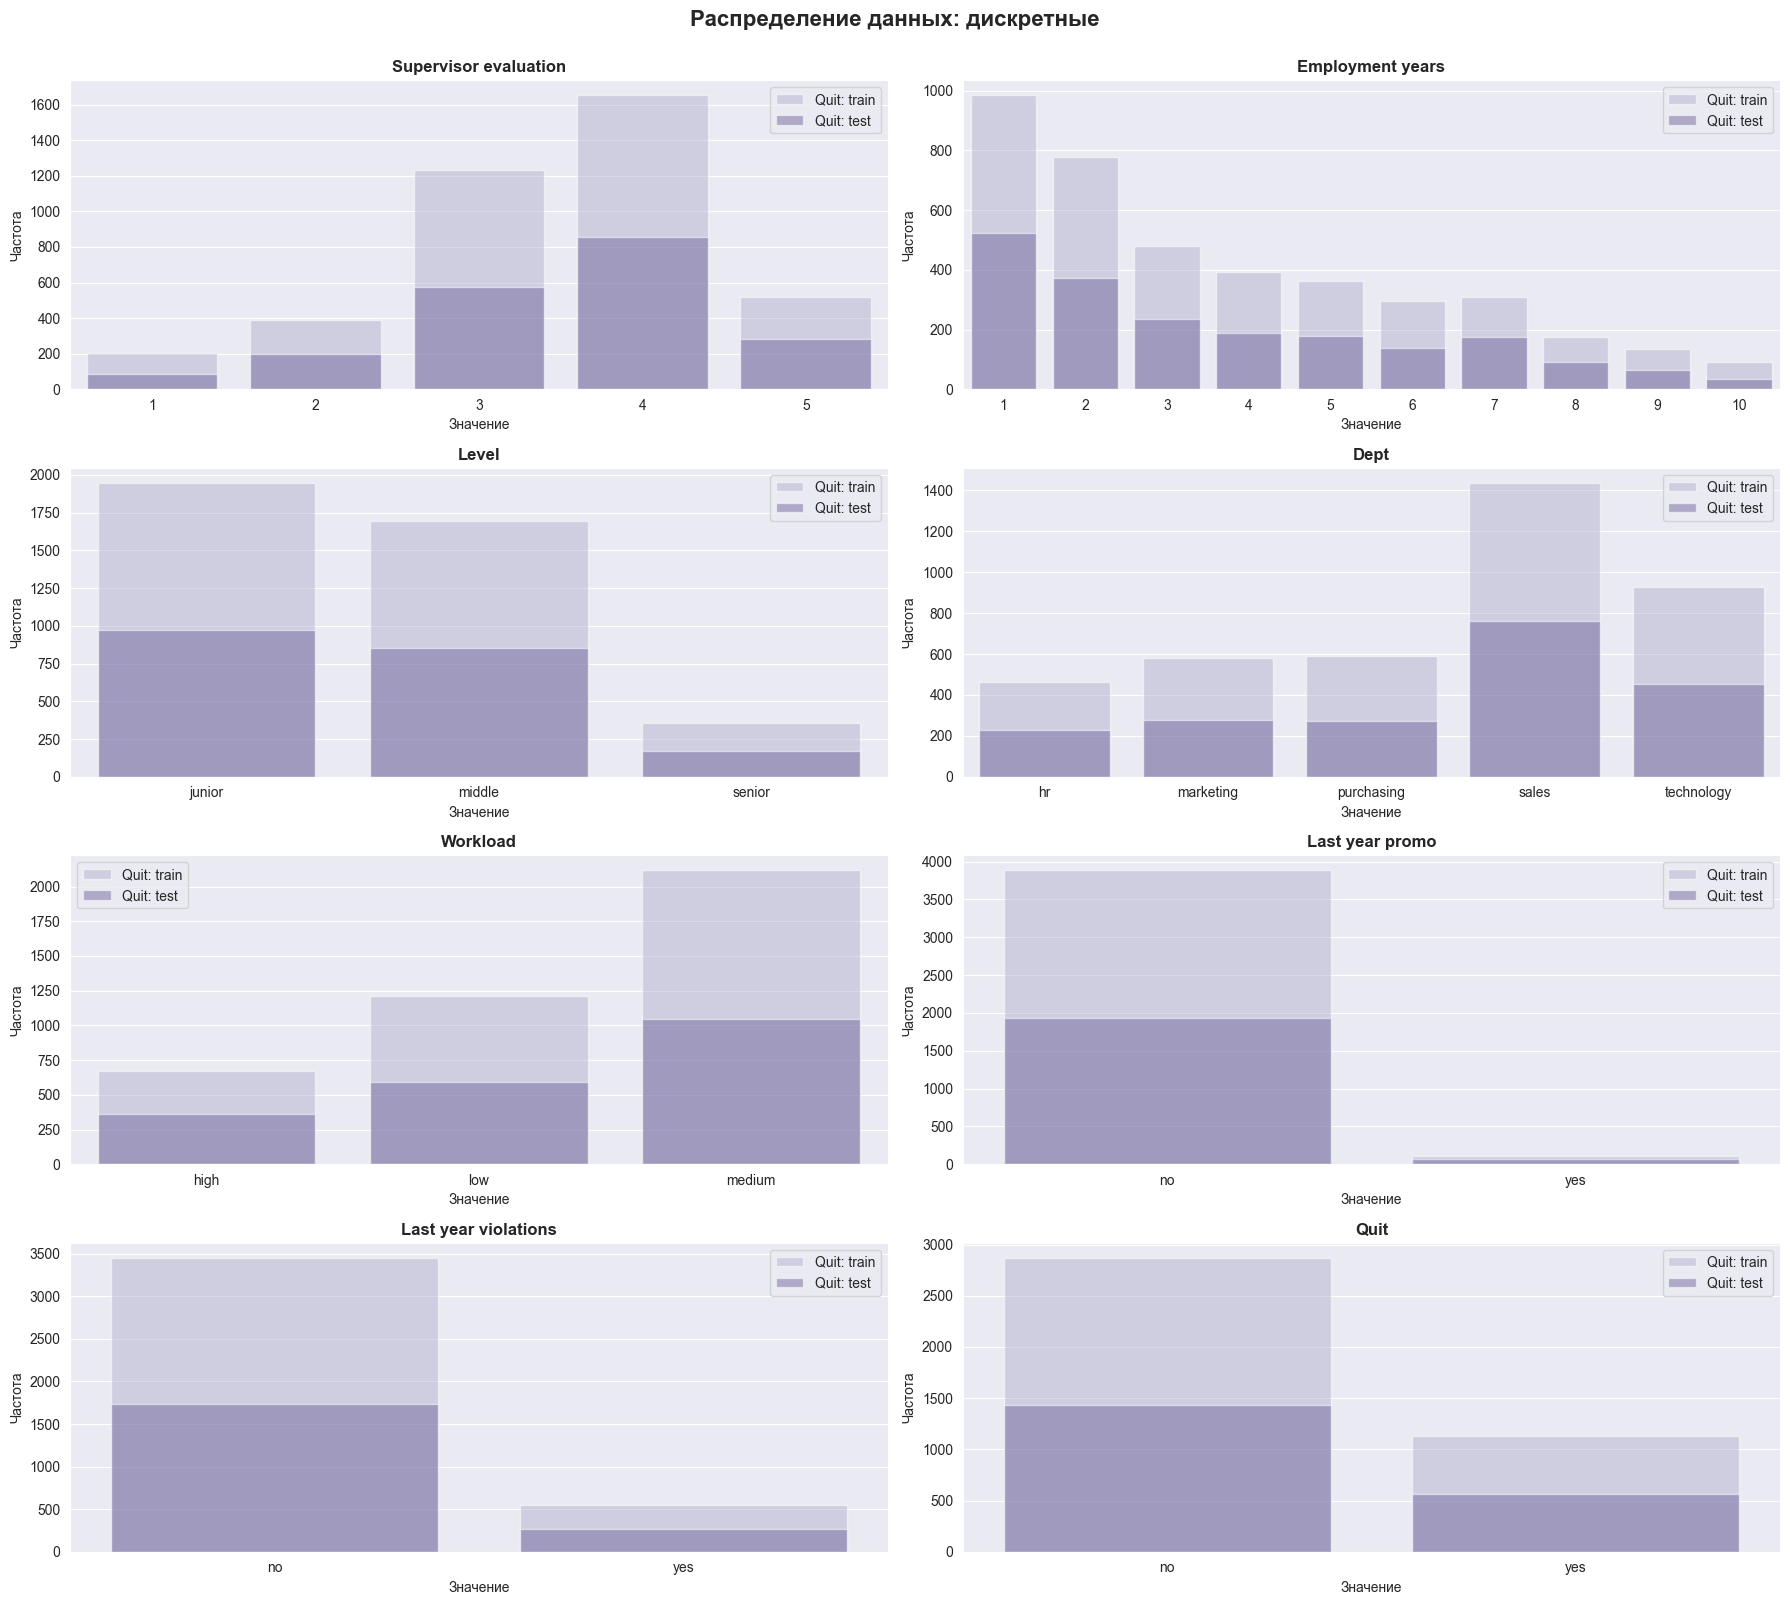

In [54]:
# Объединение тренировочного датафрейма с тестовым
# и построение графиков распределения
quit_data_merged = test_features_cleaned.merge(test_target_quit_cleaned, on='id')

discrete_features = [
    'supervisor_evaluation',
    'employment_years', 
    'level', 
    'dept', 
    'workload',
    'last_year_promo', 
    'last_year_violations',
    'quit'
]

show_compared_histplots(
    train_quit_cleaned,
    quit_data_merged,
    quit_data_merged.columns,
    discrete_features,
    df1_label='Quit: train',
    df2_label='Quit: test'
)

#### Кореляционный анализ `train_quit_cleaned`

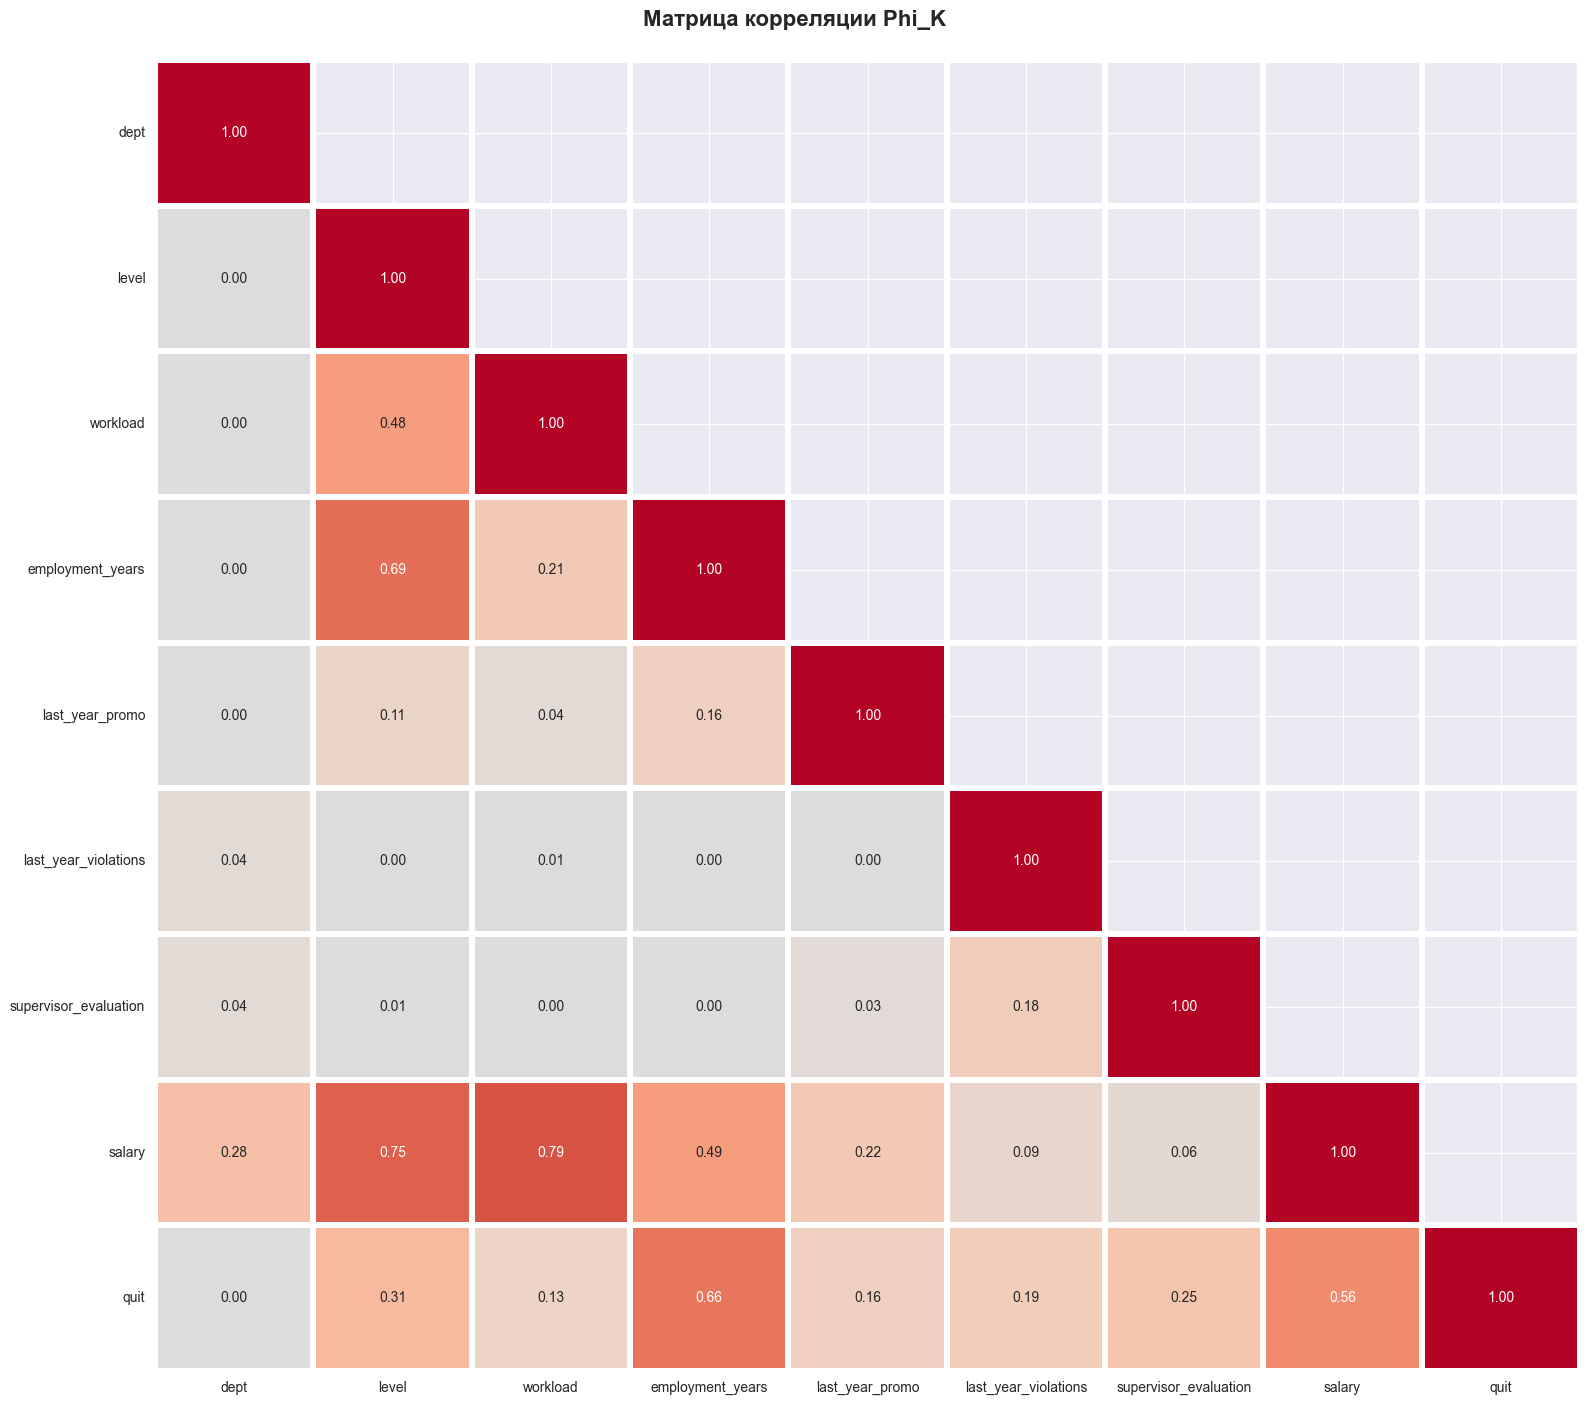

In [55]:
# Построение общей матрицы корреляции
# Отбор непрерывных величин для матрицы
train_quit_interval_cols = (
    train_quit_cleaned
    .drop(['employment_years', 'supervisor_evaluation'], axis=1)
    .select_dtypes(exclude=['category', object])
    .columns
)

# Настройки матрицы
train_quit_corr_matrix = (
    train_quit_cleaned
    .phik_matrix(interval_cols=train_quit_interval_cols)
)

train_quit_corr_mask = (
    np
    .triu(np.ones(train_quit_corr_matrix.shape),k=1)
)

# Отображение матрицы
show_corr_heatmap_plot(
    train_quit_corr_matrix,
    train_quit_corr_mask
)

In [56]:
# Формирование таблицы уровней корреляции
train_quit_corr_lvls = get_corr_levels(
    train_quit_corr_matrix,
    train_quit_corr_mask,
    target=TARGET_QUIT
)

train_quit_corr_lvls.head(5)

## Корреляция по целевому признаку: `quit`
___


feat_1 feat_2   corr      lvl
25       employment_years   quit 0.6600  Средняя
35                 salary   quit 0.5600  Средняя
14                  level   quit 0.3100   Слабая
34  supervisor_evaluation   quit 0.2500   Слабая
32   last_year_violations   quit 0.1900   Слабая

#### Анализ разброса и плотности данных `train_quit_cleaned`

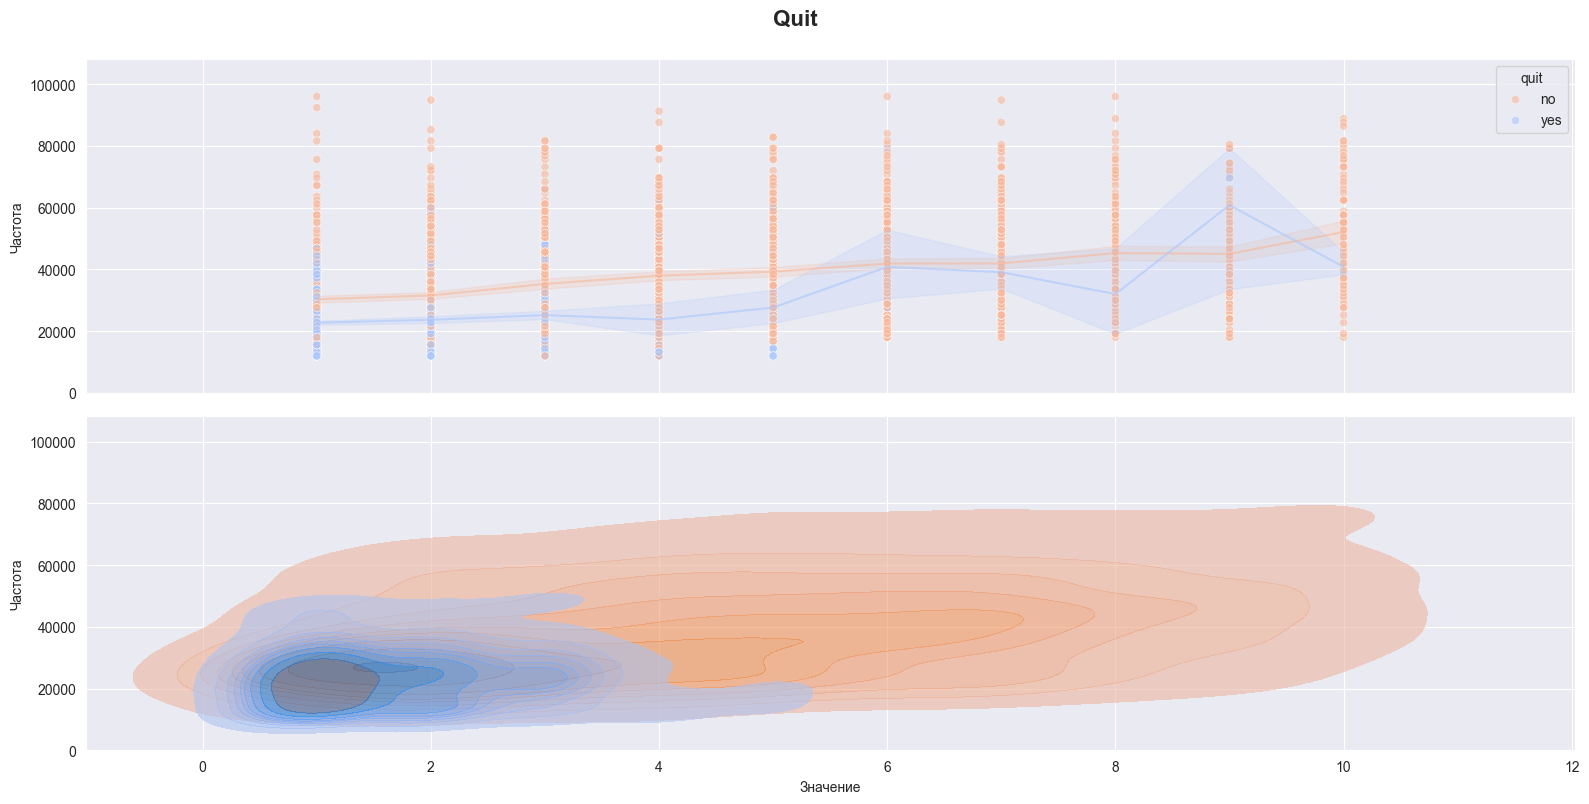

In [57]:
show_scatter_kde_plot(
    train_quit_cleaned,
    y='salary',
    x='employment_years',
    hue=TARGET_QUIT
)

#### Анализ портрета №1: `Загруженность - Отдел <-> Уволился/Остался`

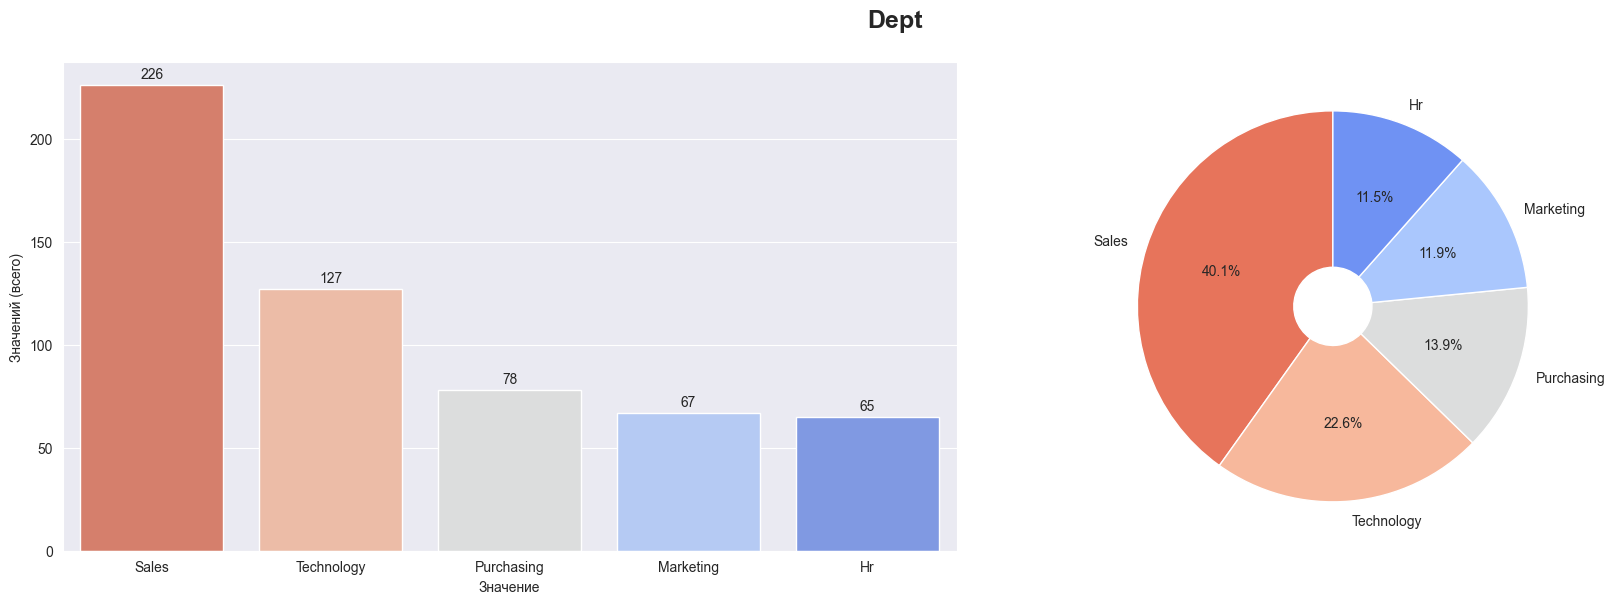

count unique    top freq
dept   563      5  sales  226

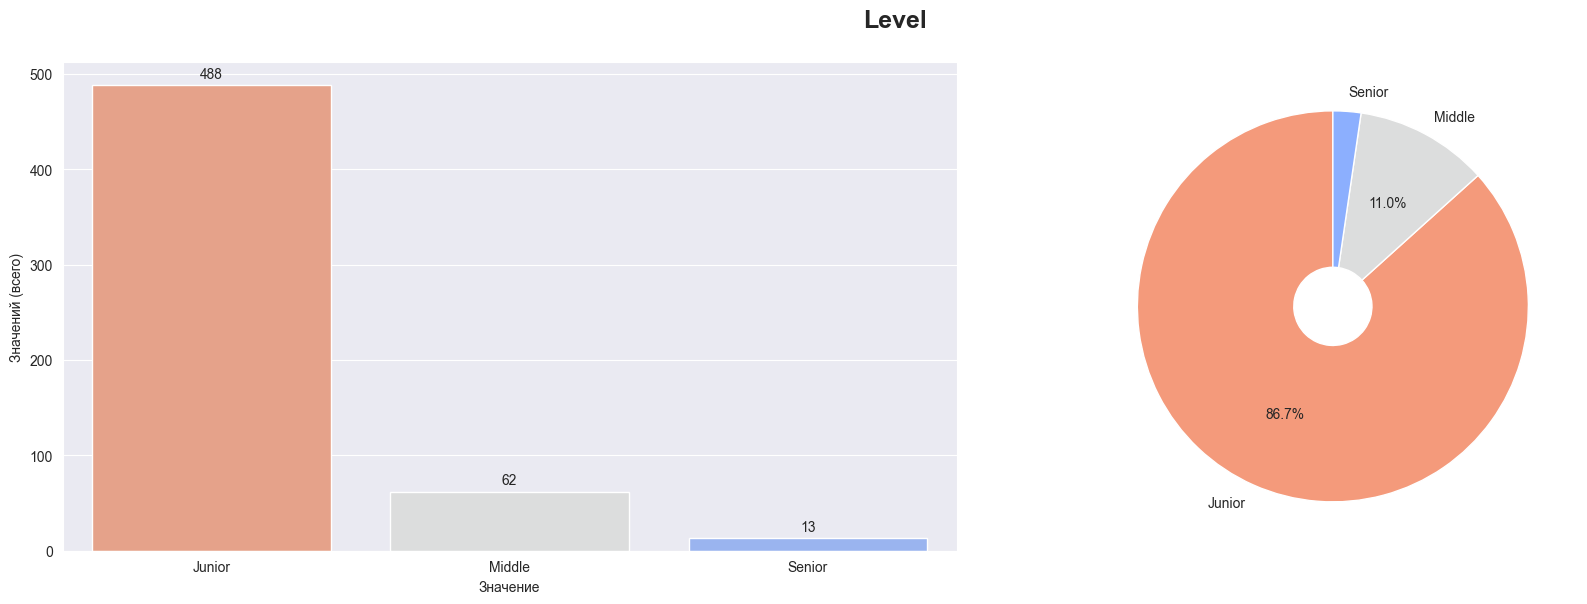

count unique     top freq
level   563      3  junior  488

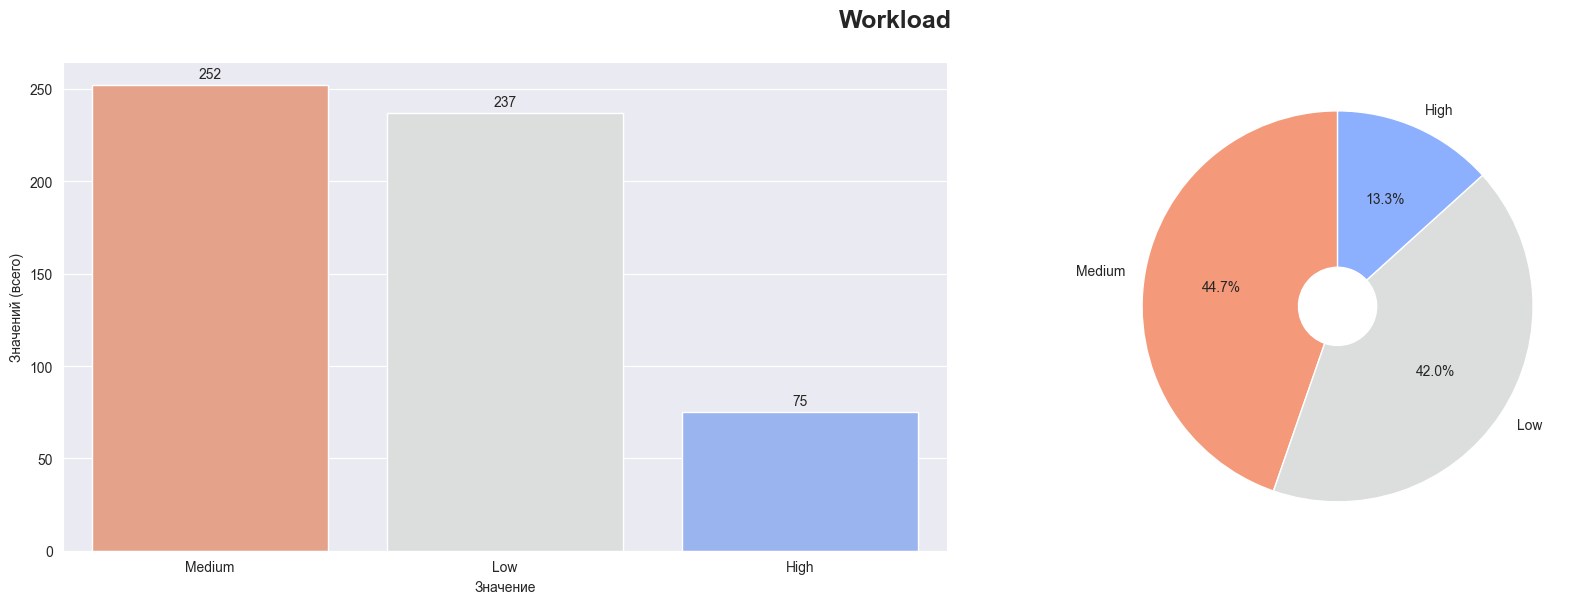

count unique     top freq
workload   564      3  medium  252

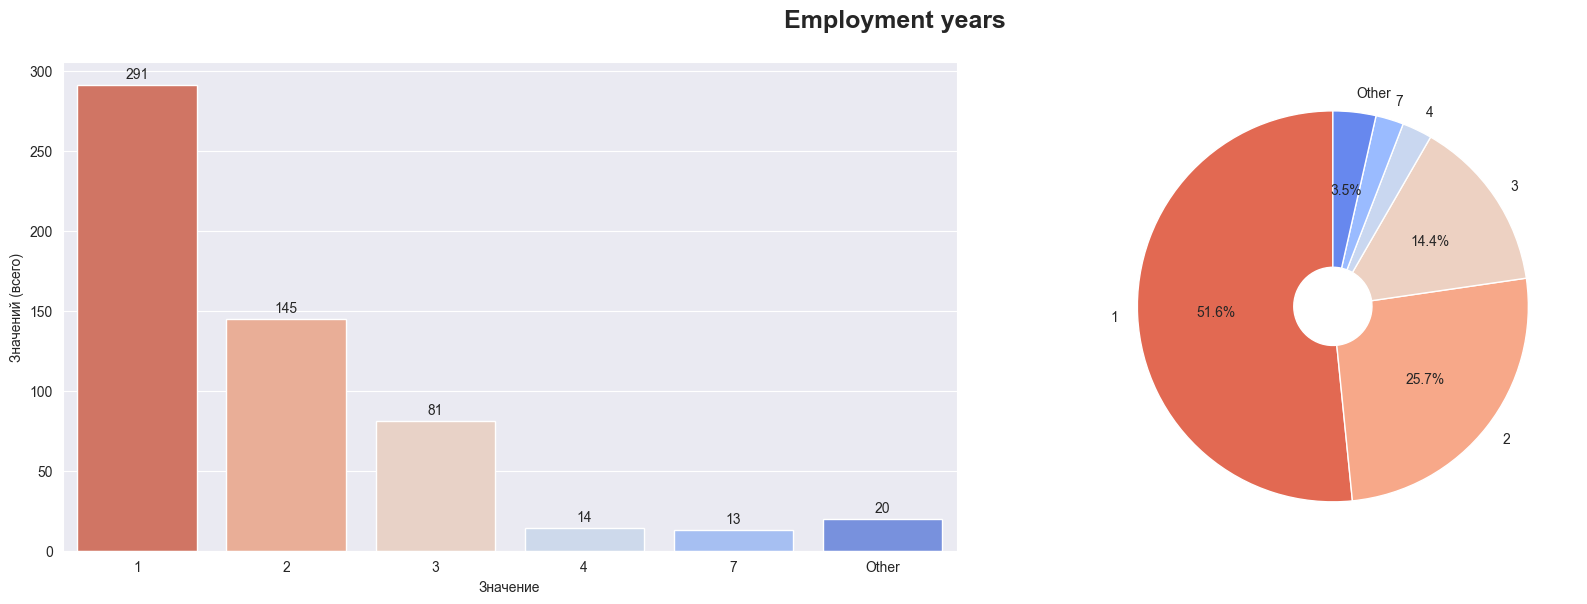

count   mean    std    min    25%    50%    75%     max
employment_years 564.0000 1.9800 1.5500 1.0000 1.0000 1.0000 2.0000 10.0000

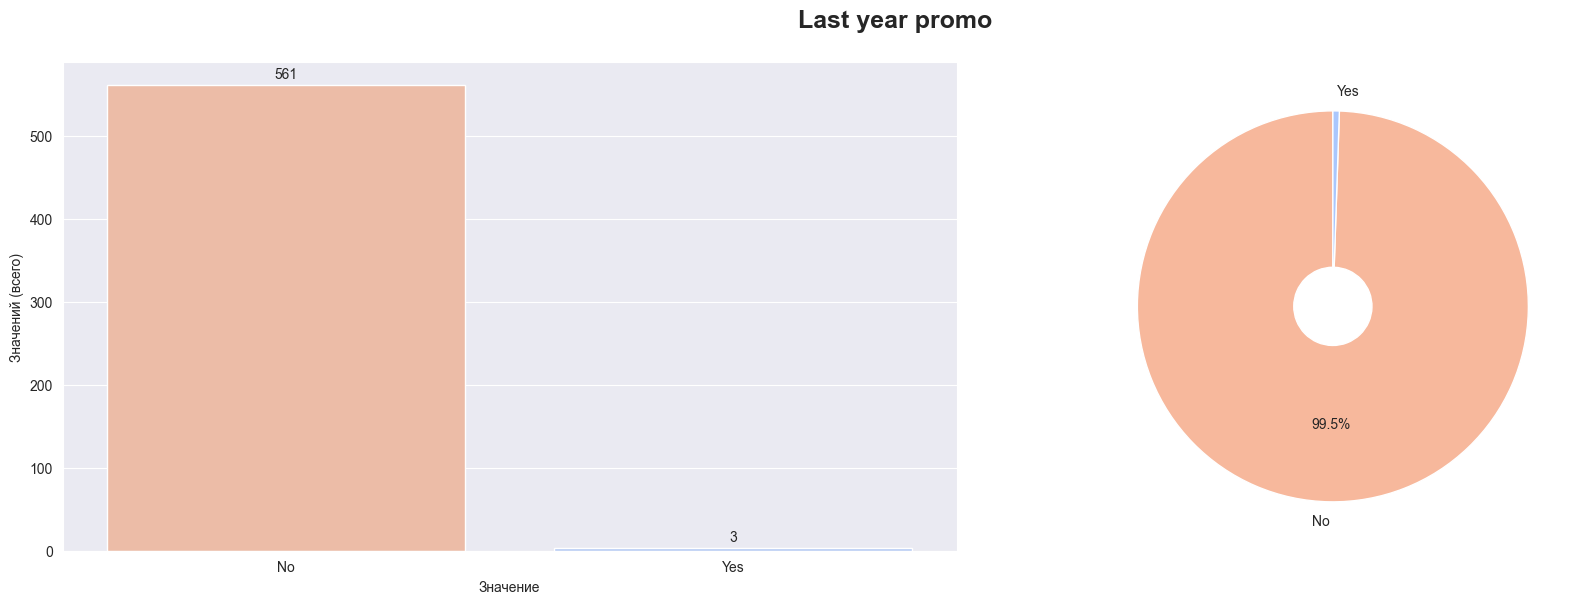

count unique top freq
last_year_promo   564      2  no  561

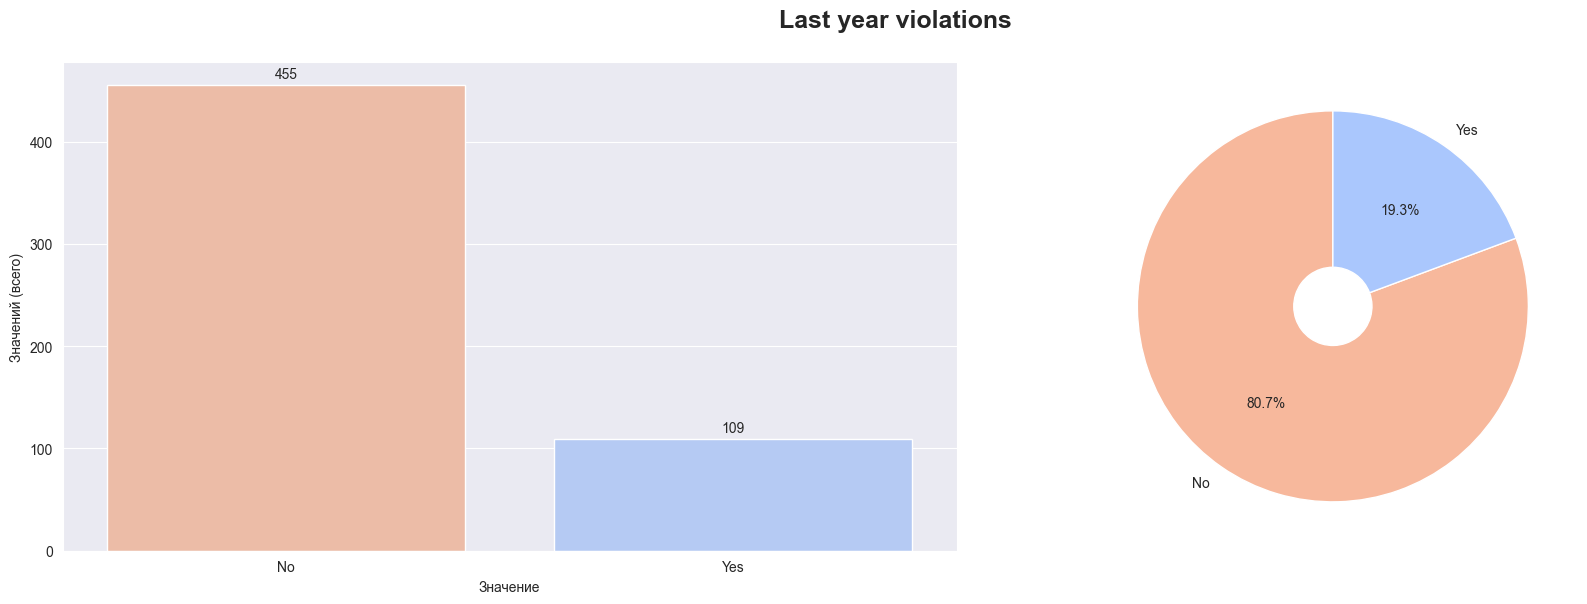

count unique top freq
last_year_violations   564      2  no  455

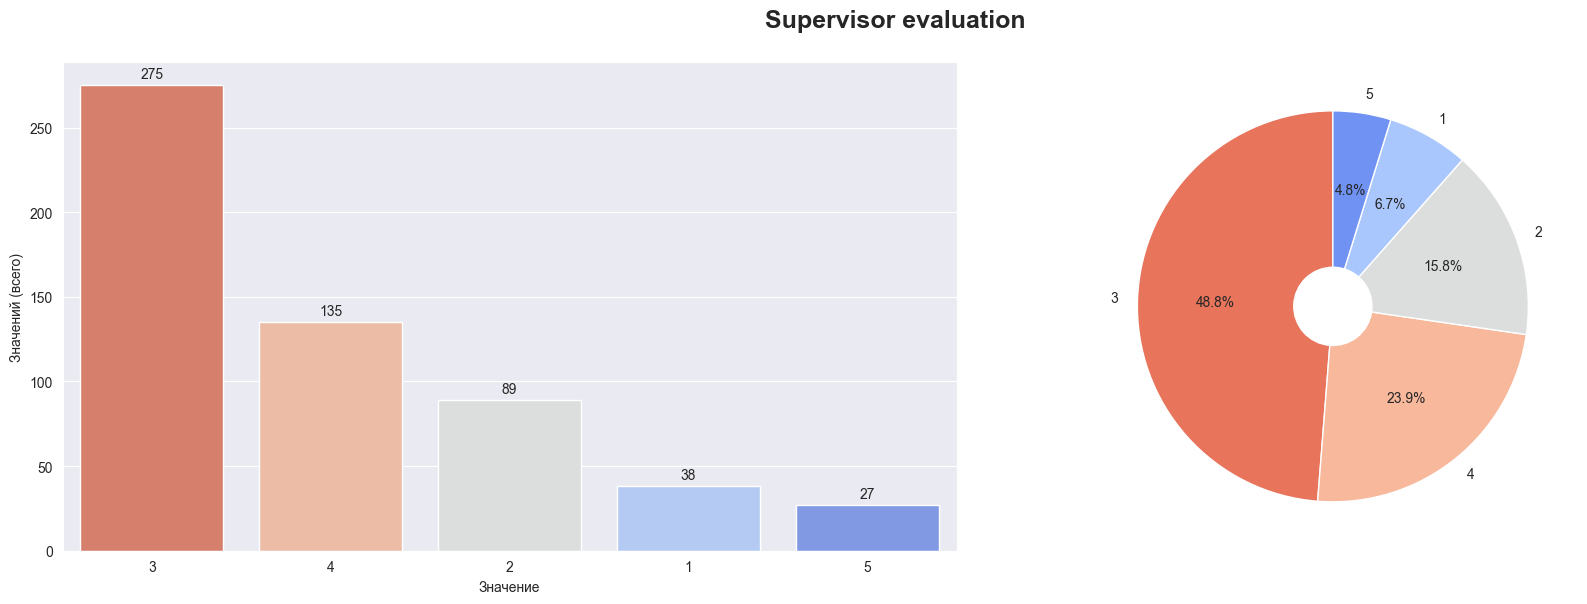

count  unique  top  freq
supervisor_evaluation    564       5    3   275

In [58]:
df_quit_yes = quit_data_merged.query('quit == "yes"')
df_quit_no = quit_data_merged.query('~(quit == "yes")')

for col in df_quit_yes.columns.drop(['salary', 'quit']):
    show_bar_pie_plot(df_quit_yes, col)

In [59]:
# Расчет зарплаты уволившихся и оставшихся сотрудников
salary_quit_yes = np.mean(df_quit_yes.salary)
salary_quit_no = np.mean(df_quit_no.salary)

display(Markdown(f'''### Расчет средних зарплат
--- 
- **Средняя зарплата ушедших:** {salary_quit_yes:.2f} руб.
- **Средняя зарплата оставшихся:** {salary_quit_no:.2f} руб.
- **Разница:** {(salary_quit_no - salary_quit_yes):.2f} руб.
'''))

### Расчет средних зарплат
--- 
- **Средняя зарплата ушедших:** 24955.32 руб.
- **Средняя зарплата оставшихся:** 37645.40 руб.
- **Разница:** 12690.08 руб.


#### Анализ портрета №2: `Уровень удовлетворенности <-> Уволился/Остался`
Проверка гипотезы: Уволившиеся сотрудники не менее удовлетворены, чем оставшиеся
$$H_0: \mu_{yes} ≥ \mu_{no}$$
$$H_1: \mu_{yes}< \mu_{no}$$

In [60]:
# Проверга гипотезы на удовлетворенность
ttest_jsr_data = quit_data_merged.merge(jsr_data_merged, on='id')

quit_yes = ttest_jsr_data.query('quit == "yes"')[TARGET_JSR]
quit_no = ttest_jsr_data.query('~(quit == "yes")')[TARGET_JSR]

ttest_results = ttest_ind(
    quit_yes,
    quit_no,
    equal_var=False,
    alternative='less'
)

alpha = 0.05

display(Markdown(f''' ### Результаты одностороннего ttest:
___
- **Среднее JSR Quit Yes**: `{np.mean(quit_yes):.2f}` ({len(quit_yes)} чел.)
- **Среднее JSR Quit No**: `{np.mean(quit_no):.2f}` ({len(quit_no)} чел.)
- **p-value**: `{ttest_results.pvalue:.3f}`
'''))

if ttest_results.pvalue < alpha:
    display(Markdown(f'**Отвергаем H0:** уволившиеся сотрудники статистически значимо менее удовлетворены'))
else:
    display(Markdown(f'**Не отвергаем H0:** уволившиеся сотрудники статистически значимо не менее удовлетворены'))

 ### Результаты одностороннего ttest:
___
- **Среднее JSR Quit Yes**: `0.39` (564 чел.)
- **Среднее JSR Quit No**: `0.61` (1436 чел.)
- **p-value**: `0.000`


**Отвергаем H0:** уволившиеся сотрудники статистически значимо менее удовлетворены

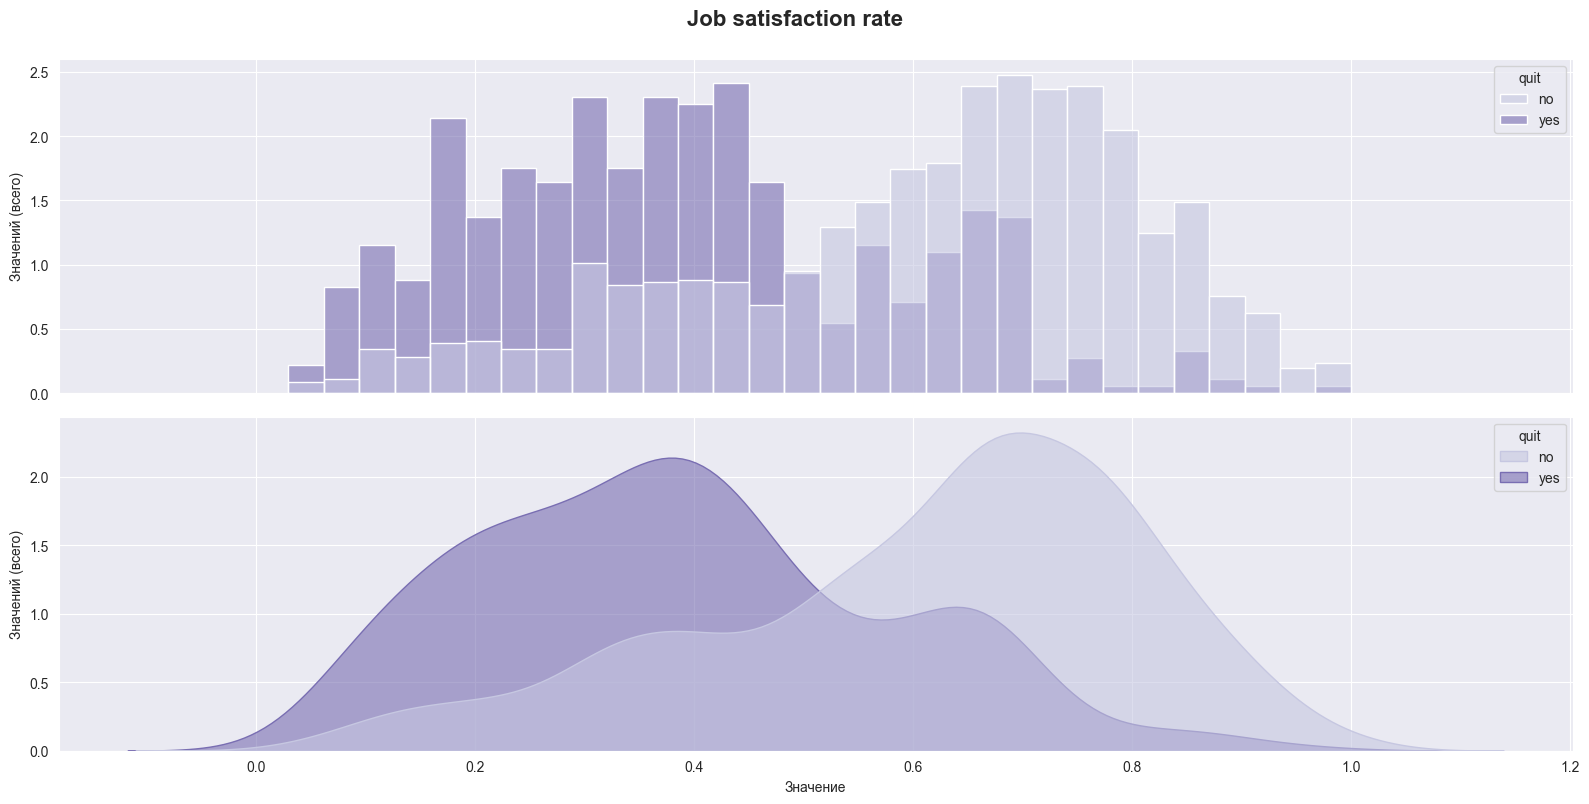

In [61]:
# Визуализация данных для анализа
show_hist_kde_plot(
    ttest_jsr_data,
    x=TARGET_JSR,
    hue=TARGET_QUIT
)

#### Выводы

**Общий анализ `test_target_quit_cleaned`:**
> - В признаке **Увольнение сотрудника (целевой)** наблюдается перевес в сторону значения **Нет** (1436 или 71.8% против 564 или 28.2%)

**Анализ распределения данных:  `'quit' + 'test_features'`:**
> - Каких-либо аномалий или несоответствий в распределении данных не обнаружено

**Кореляционный анализ `train_quit_cleaned`:**

> Предварительный анали матрицы корреляции по целевому признаку Уход из компании показал, что наибольшее влияние на него оказывают:
> - **Длительность работы** в компании, что может говорить о некотором сроке работы спустя который сотрудники обычно уходят из компании
> - **Зарплата (месяц)**, которую получает сотрудник, что имеет место быть, т.к. отсутствие повышения в доходах так или иначе оказывает влияние на сотрудников в любой компании

**Анализ разброса и плотности данных `train_quit_cleaned`**
> - Согласно скаттер и КДЕ графикам можно предварительно сказать, что данные стремятся к линейному типу. При этом **наибольшая плотность данных по увольнениям, приходится на сотрудников с зарплатами `≈50.000 тыс.` и длительностью работы `≈3 лет`**

**Анализ портрета уволившегося сотрудника №1: все параметры**

> Согласно данному анализу можно сделать вывод, что **чаще всего увольняются сотрудники**:
> - из отдела **продаж**
> - с грейдом **junior**
> - с **высокой и средней** нагрузкой
> - с **длительностью работы до 2-х лет**
> - у которых **отсутствовало повышение** за последний год
> - в целом **не совершавние нарушений ТД**
> - и **с оценкой в 3-4 балла** от руководителя
> 
> Также согласно зарплатам **`уволившиеся получали на 12690 руб. меньше (или 24955 руб.), чем оставшиеся (37645 руб.)`**

**Анализ портрета уволившегося сотрудника №2: Уровень удовлетворенности:**

> Проверка односторонней гипотезы "Уволившиеся сотрудники не менее удовлетворены, чем оставшиеся" показала, что **уволившиеся сотрудники статистически значимо менее удовлетворены, H0 отвергается**
> 
> Согласно анализу гистограмм также можно сделать вывод, что:
> - сотрудники чаще увольняются, еслу они менее удовлетворены условиями
> - равное и обратное: чаще остаются более удовлетворенные сотрудники
> - при этом на гистограмме видно наложение, что говорит о равных средних и характерных значениях для обеих групп

## Подготовка и обучение ML-моделей
___

### Подготовка методов для ML-моделей
___

In [62]:
def smape_score(y_true, y_pred):
    '''
    Вычисляет симметричную среднюю абсолютную процентную ошибку (SMAPE) между истинными и предсказанными значениями

    SMAPE (Symmetric Mean Absolute Percentage Error) — это показатель качества регрессионных моделей,
    измеряющий среднее значение относительной ошибки между предсказанными и реальными значениями,
    выраженное в процентах. Формула SMAPE симметрична и устойчива к нулевым значениям

    Формула: SMAPE = mean( |y_pred - y_true| / ((|y_true| + |y_pred|) / 2) ) * 100
    '''
    
    epsilon = 1e-12  # Защита от деления на ноль
    numerator = np.abs(y_pred - y_true)
    denominator = (np.abs(y_true) + np.abs(y_pred) + epsilon) / 2
    smape_result = np.mean(numerator / denominator) * 100
    
    return smape_result

# Инициализация оценщика SMAPE
smape_scorer = make_scorer(smape_score, greater_is_better=False)

In [63]:
def get_samples_shape_info(X_train, X_test, y_train, y_test):
    result = pd.DataFrame(
        data={
            'X_shape': [X_train.shape, X_test.shape],
            'y_shape': [y_train.shape, y_test.shape]
        },
        index=['Train', 'Test']
    )
    
    display(Markdown(f'## Размерность выборок \n___\n'))
    display(result)

In [64]:
def build_pipeline(task,
                   ohe_columns,
                   ord_columns,
                   num_columns,
                   ord_categories,
                   model=None,
                   num_scaler=None,
                   poly_degree=None):
    
    if model is None:
        if task == 'reg':
            model = DecisionTreeRegressor(random_state=RANDOM_STATE)
        elif task == 'clf':
            model = DecisionTreeClassifier(random_state=RANDOM_STATE)
        
    ohe_pipe = Pipeline([
        ('imputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ])
    
    ord_pipe = Pipeline([
        ('imputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ord', OrdinalEncoder(categories=ord_categories, handle_unknown='use_encoded_value', unknown_value=-1)),
        ('imputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ])
    
    if poly_degree is None or poly_degree == 1:
        num_pipe = Pipeline([
            ('scaler', num_scaler)
        ])
    else:
        num_pipe = Pipeline([
            ('scaler', num_scaler),
            ('poly', PolynomialFeatures(degree=poly_degree))
        ])
        
    preprocessor = ColumnTransformer([
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', num_pipe, num_columns)
    ], remainder='passthrough')
    
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    return pipeline

In [65]:
def construct_param_grid_sklearn(task, preprocessor_num=None):
    if preprocessor_num is None:
        preprocessor_num = [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']

    if task == 'reg':
        return [
            {
                'model': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
                'model__max_depth': np.arange(2, 5),
                'model__max_features': np.arange(2, 5),
                'preprocessor__num__scaler': preprocessor_num
            },
            {
                'model': [KNeighborsRegressor()],
                'model__n_neighbors': np.arange(2, 8),
                'preprocessor__num__scaler': preprocessor_num
            },
            {
                'model': [SVR()],
                'model__C': [0.1, 1, 10],
                'preprocessor__num__scaler': preprocessor_num
            },
            {
                'model': [LinearRegression()],
                'model__fit_intercept': [True, False],
                'preprocessor__num__scaler': preprocessor_num
            }
        ]
    elif task == 'clf':
        return [
            {
                'model': [LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', random_state=RANDOM_STATE)],
                'model__C': np.arange(2, 11),
                'preprocessor__num__scaler': preprocessor_num
            },
            {
                'model': [DecisionTreeClassifier(class_weight='balanced', random_state=RANDOM_STATE)],
                'model__max_depth': np.arange(1, 6),
                'model__max_features': np.arange(1, 6),
                'preprocessor__num__scaler': preprocessor_num
            },
            {
                'model': [KNeighborsClassifier(n_neighbors=7)],
                'model__n_neighbors': np.arange(2, 11),
                'preprocessor__num__scaler': preprocessor_num
            },
            {
                'model': [SVC(class_weight='balanced', probability=True, random_state=RANDOM_STATE)],
                'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
                'model__kernel': ['linear', 'rbf'],
                'model__gamma': ['scale', 'auto'],
                'preprocessor__num__scaler': preprocessor_num
            }
        ]
    else:
        return display(Markdown(f'Некорректное значение task: "{task}". Доступны "`reg`" и "`clf`".'))

In [66]:
def construct_param_grid_optuna(task, preprocessor_num=None):
    if preprocessor_num is None:
        preprocessor_num = [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
        
    if task == 'reg':
        return {
            'knn': {
                'model': CategoricalDistribution([KNeighborsRegressor()]),
                'model__n_neighbors': IntDistribution(2, 7),
                'preprocessor__num__scaler': CategoricalDistribution(preprocessor_num)
            },
            'decision_tree': {
                'model': CategoricalDistribution([DecisionTreeRegressor(random_state=RANDOM_STATE)]),
                'model__max_depth': IntDistribution(2, 7),
                'model__min_samples_split': IntDistribution(2, 5),
                'model__min_samples_leaf': IntDistribution(2, 5),
                'preprocessor__num__scaler': CategoricalDistribution(preprocessor_num)
            },
            'linreg': {
                'model': CategoricalDistribution([LinearRegression()]),
                'model__fit_intercept': CategoricalDistribution([True, False]),
                'preprocessor__num__scaler': CategoricalDistribution(preprocessor_num)
            },
            'svr': {
                'model': CategoricalDistribution([SVR()]),
                'model__kernel': CategoricalDistribution(['rbf', 'sigmoid', 'poly']),
                'model__C': FloatDistribution(0.01, 10, log=True),
                'preprocessor__num__scaler': CategoricalDistribution(preprocessor_num)
            }
        }
    elif task == 'clf':
        return {
            'knn': {
                'model': CategoricalDistribution([KNeighborsClassifier()]),
                'model__n_neighbors': IntDistribution(2, 7),
                'preprocessor__num__scaler': CategoricalDistribution(preprocessor_num)
            },
            'decision_tree': {
                'model': CategoricalDistribution([DecisionTreeClassifier(class_weight='balanced', random_state=RANDOM_STATE)]),
                'model__max_depth': IntDistribution(2, 7),
                'model__min_samples_split': IntDistribution(2, 5),
                'model__min_samples_leaf': IntDistribution(2, 5),
                'preprocessor__num__scaler': CategoricalDistribution(preprocessor_num)
            },
            'logreg': {
                'model': CategoricalDistribution([LogisticRegression(class_weight='balanced', random_state=RANDOM_STATE)]),
                'model__C': FloatDistribution(0.01, 10, log=True),
                'preprocessor__num__scaler': CategoricalDistribution(preprocessor_num)
            },
            'svc': {
                'model': CategoricalDistribution([SVC(class_weight='balanced', probability=True, random_state=RANDOM_STATE)]),
                'model__kernel': CategoricalDistribution(['rbf', 'sigmoid', 'poly']),
                'model__C': FloatDistribution(0.01, 10, log=True),
                'preprocessor__num__scaler': CategoricalDistribution(preprocessor_num)
            }
        }
    else:
        return display(Markdown(f'Некорректное значение task: "{task}". Доступны "`reg`" и "`clf`".'))

In [67]:
def get_searcher(final_pipeline,
                 param_grid,
                 search_method,
                 scoring=None,
                 cv=None):
    
    if search_method == 'randomized':
        return RandomizedSearchCV(
            final_pipeline,
            param_grid,
            scoring=scoring,
            n_iter=20,
            n_jobs=1,
            verbose=0,
            cv=cv,
            random_state=RANDOM_STATE,
        )
        
    if search_method == 'optuna':
        return OptunaSearchCV(
            final_pipeline,
            param_grid,
            cv=cv,
            scoring=scoring,
            n_trials=40,
            n_jobs=1,
            verbose=1,
            error_score='raise',
            random_state=RANDOM_STATE
        )

In [68]:
def show_best_model_info(best_estimator: Pipeline, metrics_dict: dict, section_name=None):
    best_model_name = type(best_estimator.named_steps.model).__name__
    
    display(Markdown(f'# 🔎 Обзор лучшей модели: `{best_model_name}`'))

    def show_section(title):
        display(Markdown(f'## {title}\n___\n'))
        
    def show_best_model():            
        show_section('🔝 Лучшая модель')
        display(best_estimator.named_steps['model'])
    
    def show_best_model_preprocessor():
        show_section('⚙️ Препроцессор лучшей модели')
        display(best_estimator.named_steps['preprocessor'])
    
    def show_metrics():        
        show_section('📈 Метрики лучшей модели')
        
        lines = []
        
        for name, val in metrics_dict.items():
            lines.append(f'**{name}:**\n```python\n{val:.4f}\n```')
            
        display(Markdown('\n'.join(lines)))
        
    sections = {
        'best_model': show_best_model,
        'best_model_preprocessor': show_best_model_preprocessor,
        'metrics': show_metrics,
    }
        
    if section_name is None:
        for func in sections.values():
            func()
    else:
        func = sections.get(section_name)
        
        if func:
            func()
        else:
            display(Markdown(f'''⚠️ Секция с названием **{section_name}** не найдена
            \nДоступные: **{list(sections.keys())}**'''))

In [69]:
def show_feature_importance_bar(df, threshold=0.05, top_n=10):
    df['norm_value'] = df.value / df.value.max()
    df = df.sort_values('value', ascending=False).head(top_n)
        
    fig, ax_1 = plt.subplots(
        figsize=(16, 8),
    )
    
    sns.barplot(
        x='value',
        y='name',
        hue='name',
        legend=False,
        data=df,
        palette=PALETTE_NUMERIC,
        ax=ax_1   
    )
    
    ax_1.set(
        xlabel='Важность',
        ylabel='Признак',
    )
    
    for bar in ax_1.containers:
        ax_1.bar_label(bar, padding=3)
    
    fig.suptitle(
        f'Пермутационная важность: TOP-{top_n} признаков',
        y=1,
        size=18,
        weight='black'
    )
    
    plt.axvline(
        threshold,
        color='grey',
        linestyle='dotted',
        animated=True,
        alpha=0.6
    )
    
    plt.tight_layout()
    plt.show()
    
    display(df)

In [70]:
def show_shap(shap_values):
    plt.figure(figsize=(16, 8))
    shap.plots.bar(shap_values, show=False)
    plt.title('SHAP Bar', fontsize=16, weight='black')
    plt.show()
    
    plt.figure(figsize=(16, 8))
    shap.plots.beeswarm(shap_values, show=False)
    plt.title('SHAP Beeswarm', fontsize=16, weight='black')
    plt.show()
    
    plt.figure(figsize=(16, 8))
    shap.plots.waterfall(shap_values[30], show=False)
    plt.title('SHAP Waterfall', fontsize=16, weight='black')
    plt.show()

### Предсказание уровня удовлетворенности сотрудников
___

#### Подготовка данных

In [71]:
# Формируем выборки для последующего анализа
test_data_jsr, train_data_jsr = (
    test_features_cleaned.merge(test_target_jsr_cleaned, on='id'),
    train_jsr_cleaned
)

In [72]:
# Формирование и проверка размерности выборок
X_train_jsr, y_train_jsr, X_test_jsr, y_test_jsr = (
    train_data_jsr.drop('job_satisfaction_rate', axis=1),
    train_data_jsr.job_satisfaction_rate,
    test_data_jsr.drop('job_satisfaction_rate', axis=1),
    test_data_jsr.job_satisfaction_rate
)

get_samples_shape_info(
    X_train_jsr, 
    X_test_jsr, 
    y_train_jsr, 
    y_test_jsr
)

## Размерность выборок 
___


X_shape  y_shape
Train  (4000, 8)  (4000,)
Test   (2000, 8)  (2000,)

In [73]:
# Подготовка параметров для поиска лучшей модели
ohe_columns = ['last_year_violations', 'last_year_promo', 'dept']
ord_columns = ['level', 'workload']
num_columns = ['employment_years', 'salary', 'supervisor_evaluation']
ord_categories = [
    list(X_train_jsr.level.unique()),
    list(X_train_jsr.workload.unique()),
]

pipeline_params_jsr = {
    'task': 'reg',
    'ohe_columns': ohe_columns,
    'ord_columns': ord_columns,
    'num_columns': num_columns,
    'ord_categories': ord_categories,
}

final_pipeline_jsr = build_pipeline(**pipeline_params_jsr)

#### Обучение моделей

In [74]:
# Настройка Dummy проверки моделей на адекватность
dummy_jsr = DummyRegressor(strategy='mean')
dummy_jsr.fit(X_train_jsr, y_train_jsr)

cv = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

In [75]:
# Поиск лучшей модели через RandomizedSearch
randomized_param_grid_jsr = construct_param_grid_sklearn('reg')

rs_results_list = []
rs_best_pipeline_jsr = None
rs_best_pipeline_jsr_name = None
rs_best_pipeline_cv_score_jsr = float('-inf')

for param_dist in tqdm(randomized_param_grid_jsr, desc='RSCV Progress'):    
    rs_searcher = get_searcher(
        final_pipeline_jsr,
        param_dist,
        search_method='randomized',
        scoring=smape_scorer,
        cv=cv
    )
    
    with tqdm(total=1, desc=f'{param_dist["model"][0].__class__.__name__}') as pbar:
        rs_searcher.fit(X_train_jsr, y_train_jsr)
        
        pbar.update(1)
        pbar.set_postfix({'Best CV': f'{rs_searcher.best_score_:.4f}'})
            
    cv_score = rs_searcher.best_score_
    
    rs_results_list.append({
        'Best Model': rs_searcher.best_estimator_.named_steps.model,
        'Best CV': f'{cv_score:.4f}',
        'Train Time (sec.)': f'{rs_searcher.refit_time_:.2f}',
        'Pred Time (sec.)': f'{rs_searcher.cv_results_["mean_score_time"][rs_searcher.best_index_]:.2f}',
        'Method': 'RSVC'
    })
    
    if cv_score > rs_best_pipeline_cv_score_jsr:
        rs_best_pipeline_jsr = rs_searcher.best_estimator_
        rs_best_pipeline_cv_score_jsr = cv_score

RSCV Progress:   0%|          | 0/4 [00:00<?, ?it/s]

DecisionTreeRegressor:   0%|          | 0/1 [00:00<?, ?it/s]

KNeighborsRegressor:   0%|          | 0/1 [00:00<?, ?it/s]

SVR:   0%|          | 0/1 [00:00<?, ?it/s]

LinearRegression:   0%|          | 0/1 [00:00<?, ?it/s]

In [76]:
# Поиск лучшей модели через Optuna Search
os_results_list = []
optuna_best_pipeline_jsr = None
optuna_best_pipeline_jsr_name = None
optuna_best_pipeline_cv_score_jsr = float('-inf')

optuna_param_grid_jsr = construct_param_grid_optuna('reg')

for model_key, dist in tqdm(optuna_param_grid_jsr.items(), 'OSCV Progress'):            
    optuna_searcher = get_searcher(
        final_pipeline_jsr,
        dist,
        search_method='optuna',
        scoring=smape_scorer,
        cv=cv
    )
    
    with tqdm(total=1, desc=f'{dist["model"].choices[0].__class__.__name__}') as pbar:
        optuna_searcher.fit(X_train_jsr, y_train_jsr)
        
        pbar.update(1)
        pbar.set_postfix({'Best CV ': f'{optuna_searcher.best_score_:.4f}'})
    
    cv_score = optuna_searcher.best_score_
    os_best_model_name = optuna_searcher.best_estimator_.named_steps.model.__class__.__name__
    
    os_results_list.append({
        'Best Model': f'{optuna_searcher.best_estimator_.named_steps.model}',
        'Best CV': f'{cv_score:.4f}',
        'Train Time (sec.)': f'{optuna_searcher.refit_time_:.2f}',
        'Pred Time (sec.)': f'{optuna_searcher.cv_results_["mean_score_time"][optuna_searcher.best_index_]:.2f}',
        'Method': 'OSCV'
    })
    
    if cv_score > optuna_best_pipeline_cv_score_jsr:
        optuna_best_pipeline_jsr = optuna_searcher.best_estimator_
        optuna_best_pipeline_cv_score_jsr = cv_score

OSCV Progress:   0%|          | 0/4 [00:00<?, ?it/s]

KNeighborsRegressor:   0%|          | 0/1 [00:00<?, ?it/s]

[I 2026-02-17 21:59:02,269] A new study created in memory with name: no-name-f842d536-6018-44f7-a6c8-6c8d89a68e3a
[I 2026-02-17 21:59:02,339] Trial 0 finished with value: -16.897242709245536 and parameters: {'model': KNeighborsRegressor(n_neighbors=4), 'model__n_neighbors': 4, 'preprocessor__num__scaler': StandardScaler()}. Best is trial 0 with value: -16.897242709245536.
[I 2026-02-17 21:59:02,390] Trial 1 finished with value: -20.704304602934148 and parameters: {'model': KNeighborsRegressor(n_neighbors=3), 'model__n_neighbors': 3, 'preprocessor__num__scaler': 'passthrough'}. Best is trial 0 with value: -16.897242709245536.
[I 2026-02-17 21:59:02,454] Trial 2 finished with value: -16.897242709245536 and parameters: {'model': KNeighborsRegressor(n_neighbors=4), 'model__n_neighbors': 4, 'preprocessor__num__scaler': StandardScaler()}. Best is trial 0 with value: -16.897242709245536.
[I 2026-02-17 21:59:02,522] Trial 3 finished with value: -17.98357208258373 and parameters: {'model': KNei

DecisionTreeRegressor:   0%|          | 0/1 [00:00<?, ?it/s]

[I 2026-02-17 21:59:04,862] A new study created in memory with name: no-name-91a912ab-cc94-4fe1-b8cb-0b886f9743c4
[I 2026-02-17 21:59:04,918] Trial 0 finished with value: -21.29632251142835 and parameters: {'model': DecisionTreeRegressor(max_depth=4, min_samples_leaf=2, min_samples_split=5,
                      random_state=42), 'model__max_depth': 4, 'model__min_samples_split': 5, 'model__min_samples_leaf': 2, 'preprocessor__num__scaler': MinMaxScaler()}. Best is trial 0 with value: -21.29632251142835.
[I 2026-02-17 21:59:04,973] Trial 1 finished with value: -22.404937292963957 and parameters: {'model': DecisionTreeRegressor(max_depth=3, min_samples_leaf=3, random_state=42), 'model__max_depth': 3, 'model__min_samples_split': 2, 'model__min_samples_leaf': 3, 'preprocessor__num__scaler': MinMaxScaler()}. Best is trial 0 with value: -21.29632251142835.
[I 2026-02-17 21:59:05,027] Trial 2 finished with value: -21.304185799633668 and parameters: {'model': DecisionTreeRegressor(max_depth=4

LinearRegression:   0%|          | 0/1 [00:00<?, ?it/s]

[I 2026-02-17 21:59:07,092] A new study created in memory with name: no-name-9e953601-c77f-40d6-a940-4852e1427e96
[I 2026-02-17 21:59:07,144] Trial 0 finished with value: -45.64106220713959 and parameters: {'model': LinearRegression(fit_intercept=False), 'model__fit_intercept': False, 'preprocessor__num__scaler': RobustScaler()}. Best is trial 0 with value: -45.64106220713959.
[I 2026-02-17 21:59:07,189] Trial 1 finished with value: -26.634295549961088 and parameters: {'model': LinearRegression(), 'model__fit_intercept': True, 'preprocessor__num__scaler': 'passthrough'}. Best is trial 1 with value: -26.634295549961088.
[I 2026-02-17 21:59:07,234] Trial 2 finished with value: -26.634295549961088 and parameters: {'model': LinearRegression(), 'model__fit_intercept': True, 'preprocessor__num__scaler': 'passthrough'}. Best is trial 1 with value: -26.634295549961088.
[I 2026-02-17 21:59:07,283] Trial 3 finished with value: -27.871951969939282 and parameters: {'model': LinearRegression(fit_in

SVR:   0%|          | 0/1 [00:00<?, ?it/s]

[I 2026-02-17 21:59:08,988] A new study created in memory with name: no-name-5fb13df4-4226-4cc6-a20c-ef6bf4d5f7c9
[I 2026-02-17 21:59:09,987] Trial 0 finished with value: -142.36335786349466 and parameters: {'model': SVR(C=0.09085351895012907, kernel='sigmoid'), 'model__kernel': 'sigmoid', 'model__C': 0.09085351895012907, 'preprocessor__num__scaler': StandardScaler()}. Best is trial 0 with value: -142.36335786349466.
[I 2026-02-17 21:59:16,321] Trial 1 finished with value: -21.986498746457254 and parameters: {'model': SVR(C=9.948384931504128, kernel='poly'), 'model__kernel': 'poly', 'model__C': 9.948384931504128, 'preprocessor__num__scaler': StandardScaler()}. Best is trial 1 with value: -21.986498746457254.
[I 2026-02-17 21:59:17,265] Trial 2 finished with value: -191.1258687016437 and parameters: {'model': SVR(C=7.19681335292731, kernel='sigmoid'), 'model__kernel': 'sigmoid', 'model__C': 7.19681335292731, 'preprocessor__num__scaler': MinMaxScaler()}. Best is trial 1 with value: -21.9

In [77]:
# Вывод результатов обучения моделей
jsr_full_results_list = pd.concat([
    pd.DataFrame(rs_results_list),
    pd.DataFrame(os_results_list)
]).sort_values('Best CV', ).reset_index(drop=True)

jsr_full_results_list.style.background_gradient(cmap=PALETTE_NUMERIC, subset=['Best CV'])

In [78]:
# Настройка проверки моделей на адекватность Dummy
y_test_dummy_jsr_pred = dummy_jsr.predict(X_test_jsr)

# Проверка лучшей модели на тестовых данных
y_test_jsr_pred = optuna_best_pipeline_jsr.predict(X_test_jsr)

# Формирование и расчеты метрик
main_metrics = {
    'CV': np.abs(optuna_best_pipeline_cv_score_jsr),
    'SMAPE': smape_score(y_test_jsr, y_test_jsr_pred)
}

dummy_metrics = {
    'CV': '-',
    'SMAPE': smape_score(y_test_jsr, y_test_dummy_jsr_pred)
}

best_model_metrics = pd.DataFrame(
    data=[main_metrics, dummy_metrics],
    index=['Best Model', 'Dummy Baseline']
)

# Вывод метрик
display(Markdown(f'### Метрики лучшей модели \n___'))
display(optuna_best_pipeline_jsr.named_steps.model)
display(pd.DataFrame(best_model_metrics).T)

### Метрики лучшей модели 
___

SVR(C=3.349629045654751)

Best Model Dummy Baseline
CV       14.5565              -
SMAPE    13.7046        38.2194

#### Анализ важности признаков

In [79]:
# Определение пермутационной важности признаков
best_estimator_jsr = optuna_searcher.best_estimator_.named_steps
best_model_jsr = best_estimator_jsr.model
best_model_preprocessor_jsr = best_estimator_jsr.preprocessor
best_model_feature_names_jsr = best_model_preprocessor_jsr.get_feature_names_out()
X_test_jsr_preprocessor = best_model_preprocessor_jsr.transform(X_test_jsr)

permutation_result_jsr = permutation_importance(
    best_model_jsr, 
    X_test_jsr_preprocessor,
    y_test_jsr,
    scoring=smape_scorer,
    n_repeats=10
)

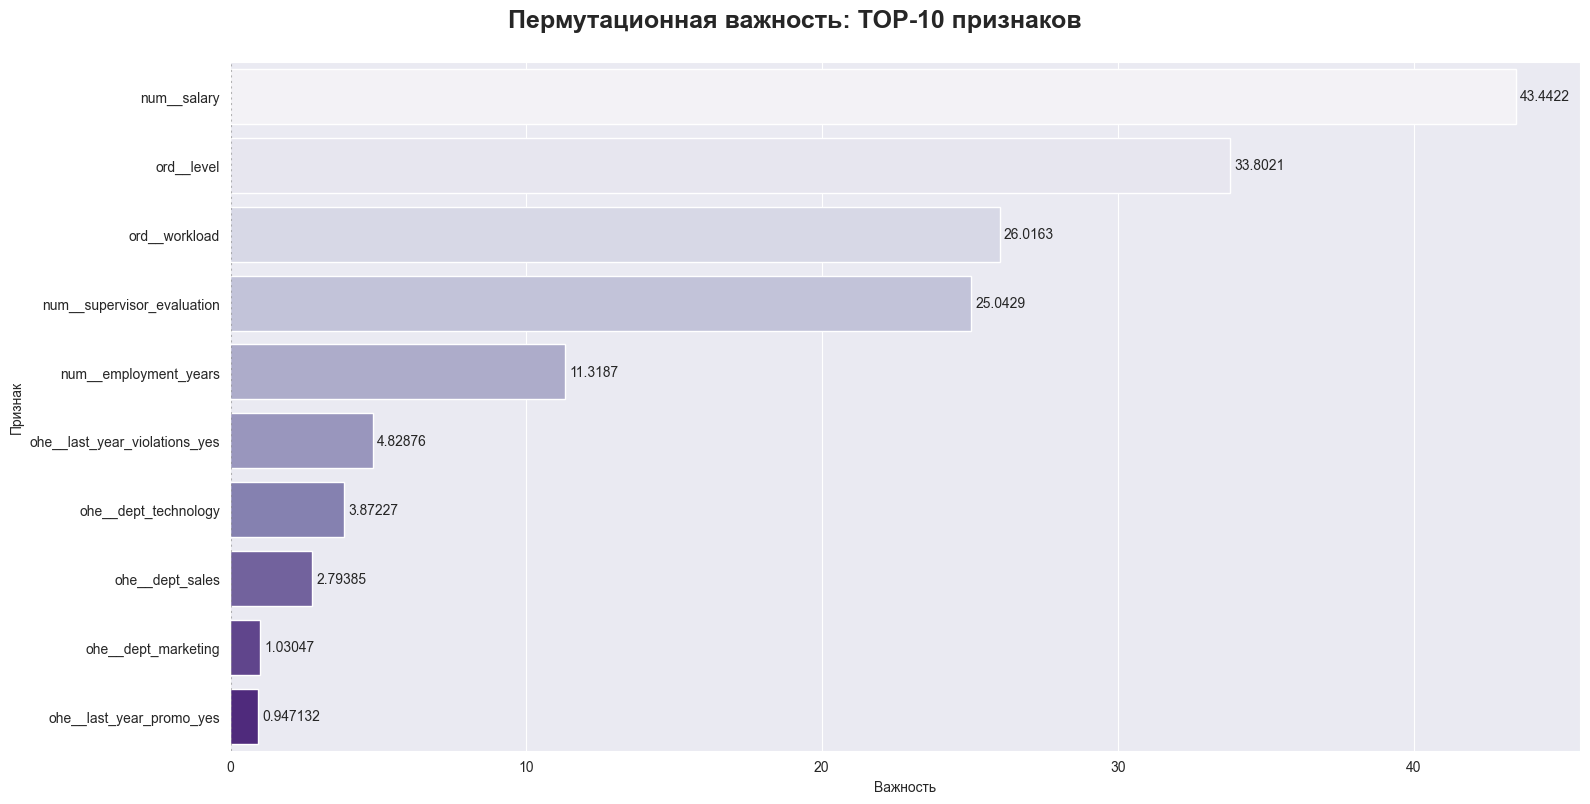

name   value  norm_value
9                     num__salary 43.4422      1.0000
6                      ord__level 33.8021      0.7781
7                   ord__workload 26.0163      0.5989
10     num__supervisor_evaluation 25.0429      0.5765
8           num__employment_years 11.3187      0.2605
0   ohe__last_year_violations_yes  4.8288      0.1112
5            ohe__dept_technology  3.8723      0.0891
4                 ohe__dept_sales  2.7938      0.0643
2             ohe__dept_marketing  1.0305      0.0237
1        ohe__last_year_promo_yes  0.9471      0.0218

In [80]:
# Визуализация и вывод информации
feature_importance_jsr = pd.DataFrame({
    'name': best_model_feature_names_jsr,
    'value': permutation_result_jsr.importances_mean,
    })

show_feature_importance_bar(feature_importance_jsr)

In [81]:
# Определение SHAP-значений
shap_data_jsr = pd.DataFrame(
    X_test_jsr_preprocessor,
    columns=best_model_feature_names_jsr
)

explainer_jsr = shap.Explainer(
    best_model_jsr.predict,
    shap.sample(shap_data_jsr, 150, random_state=RANDOM_STATE),
)

shap_values_jsr = explainer_jsr(shap_data_jsr[:150])

PermutationExplainer explainer: 151it [01:00,  2.14it/s]                         


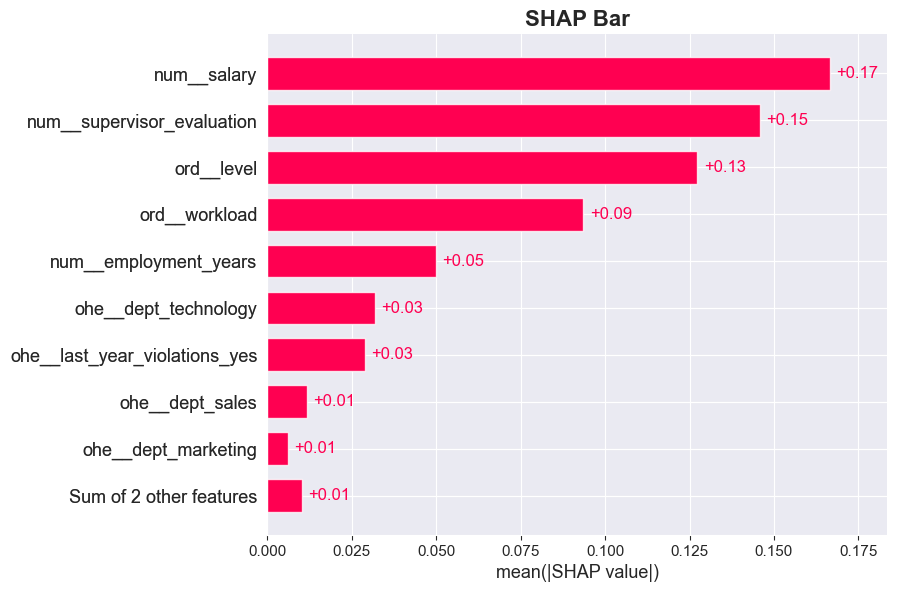

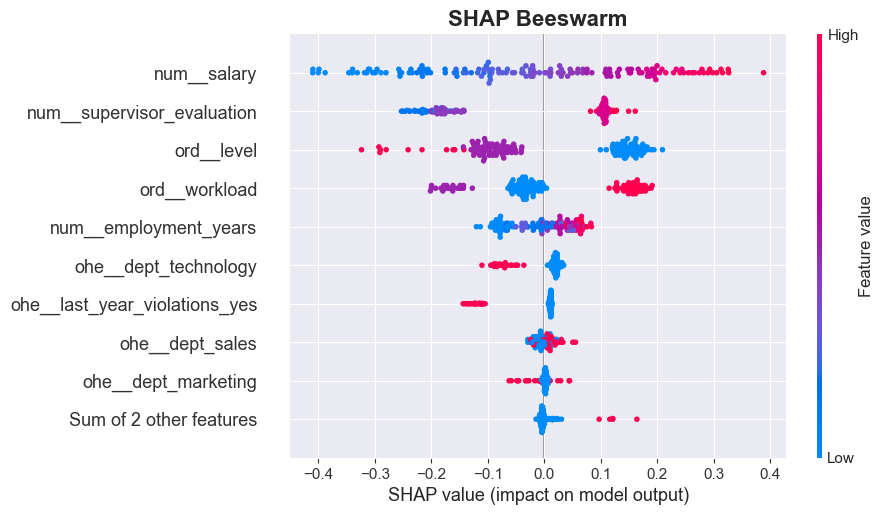

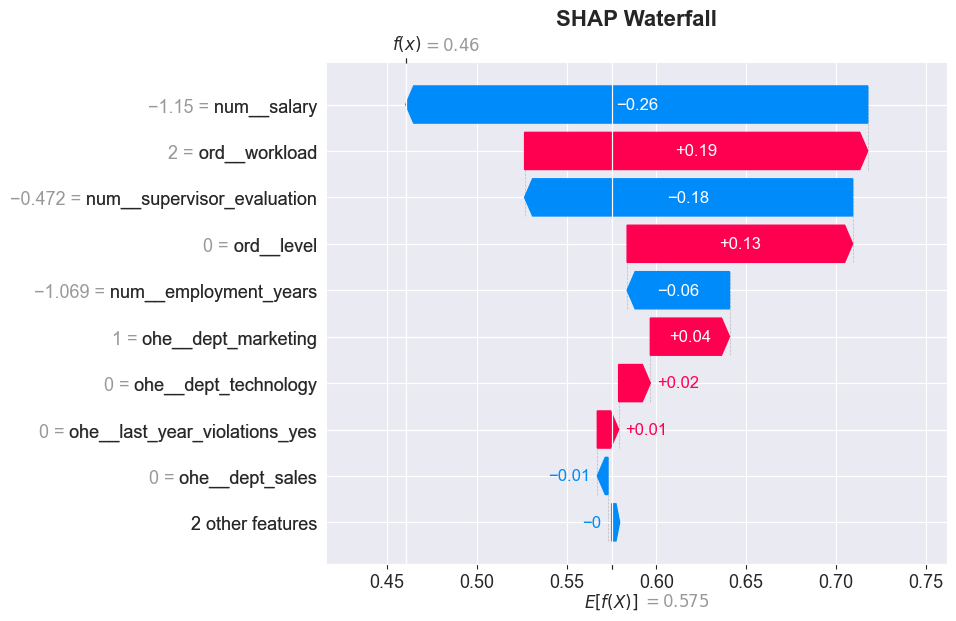

In [82]:
# Визуализация и вывод информации
show_shap(shap_values_jsr)

#### Выводы
___

**Общее**
>- Для поиска модели **были выбраны два способа обучения модели: через Randomized Search и Optuna Search**
>- На основе лучшей оценки CV была отобрана **лучшая модель Optuna**:
>  
            SVR(C=3.349629045654751)
>  
>- Метрика **SMAPE у Optuna Search составила `13.7046`**, что может говорить об отсутствии переобучения и находится в пределах нормы метрики в **`>=15`** единиц
>- **Далее анализ будет проводиться на основе модели SVR Optuna Search**

**Анализ Feature Importance**
> - Согласно анализу важности признаков, можно выделить 4 самых наиболее важных признака:
>    - **`num__salary`**
>    - **`num__supervisor_evaluation`**
>    - **`ord__level`**
>    - **`ord__workload`**
> - Также можно отметить, что сотрудники из отдела Технологий имею тнаиболее высокие показатели удовлетворенности

**Анализ SHAP**
> **Самые важные признаки**
> - Размер заработной платы имеет наибольший вклад в модель и оказывает влияние на предсказание удовлетворенности: чем выше зарплата, тем выше удовлетворенность
> - Уровень грейда, длительность работы, оценка руководителем также влияют на предсказание удовлетворенности
> - Остальные признаки хоть и имеют влияние на удовлетворенность, но оно минимально и не критично
>
> **Характер влияния**
> - Размер заработной платы сильно влияет на вероятность удовлетворенности: выше зарплата - выше удовлетворенность и наоборот, хоть и по графику видно, что в целом распределение +- нормальное вдоль всего графика
> - Оценка качества работы также сильно влияет на удовлетворенность: высокая оценка - высокая удовлетворенность и наоборот
> - Высокий грейд влияет положительно на уровень удовлетворенности, в то же время низкйи грейд - отрицательно, что может говорить, вероятно, об эмоциональной состовляющей и уверенности в своих навыках и знаниях сотрудников
> - Высокая загруженность влияет положительно, низкая - отрицательно. Вероятно, что наличие задач и интенсивность работы положительно влияют на общее состояние сотрудгников и ощущение значимости, в то время как низкая может приводить к скуке и ощущению бесполезности
> - По остальным признакам явной выраженности не наблюдается
>
> **Индивидуальный признак**
> 
> Пример предсказания на отдельном пользователе показал низкую удовлетворенность в случае низкой зарплаты и  низкой оценки руководитем сотрудника. Так же наблюдается незначительное влияние длительности работы в компании
>
> При этом очень положительно на удовлетворенность повлияла нагрузка на работе и уровень грейда сотрудника. Также есть интересное наблюдение, в котором положительное влияние оказывает факт работы в отделе маркетинга и технологий, что, возможно, говорит о более комфортных условиях труда именно в этих отделах
>
> Остальные же признаки не несут особой значимости в рамках текущего анализа
>
> **Общая сводка**
>
> Графики SHAP показывают, что наибольшее влияние на предсказанную удовлетворенность оказывают: 
> - зарплата
> - грейд
> - занятость
> - оценка руководителя
>
> Другие признаки имеют меньшее, иногда незначительное влияние

### Предсказание вероятности ухода сотрудника
___

#### Подготовка данных

In [83]:
# Формируем выборки для последующего анализа
test_data_quit, train_data_quit = (
    test_features_cleaned.copy().merge(test_target_quit_cleaned, on='id'),
    train_quit_cleaned.copy()
)

# Добавление предсказаний лучшей модели по удовлетворенности
test_data_quit['jsr_predict'] = optuna_best_pipeline_jsr.predict(test_data_quit)
train_data_quit['jsr_predict'] = optuna_best_pipeline_jsr.predict(train_data_quit)

#### Проверка мультиколинеарности: корреляционный анализ

##### Тестовая выборка `test_data_quit`

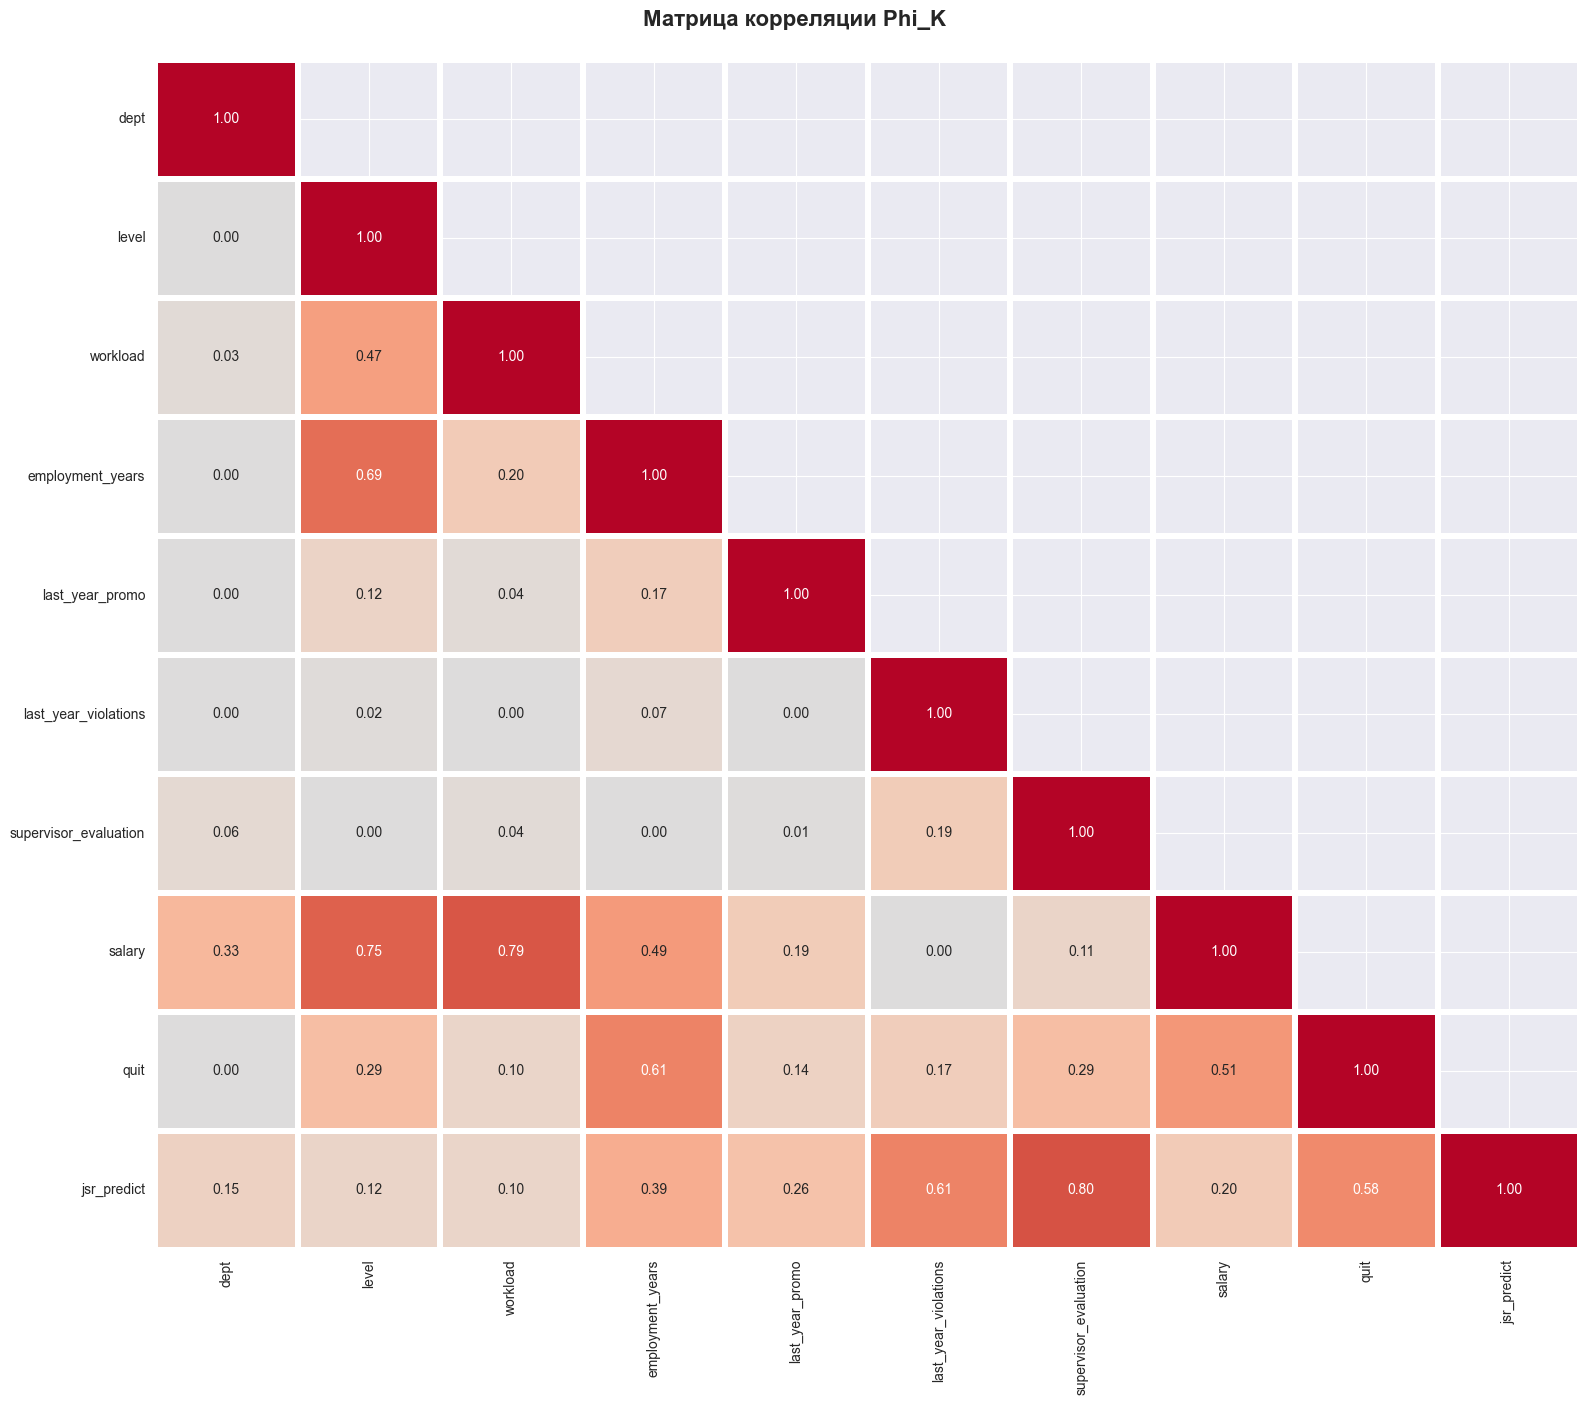

In [84]:
# Построение общей матрицы корреляции
# Отбор непрерывных величин для матрицы
test_data_quit_interval_cols = (
    test_data_quit
    .drop(['employment_years', 'supervisor_evaluation'], axis=1)
    .select_dtypes(exclude=['category', object])
    .columns
)

# Настройки матрицы
test_data_quit_corr_matrix = (
    test_data_quit
    .phik_matrix(interval_cols=test_data_quit_interval_cols)
)

test_data_quit_corr_mask = np.triu(
    np.ones(test_data_quit_corr_matrix.shape),
    k=1
)

# Отображение матрицы
show_corr_heatmap_plot(
    test_data_quit_corr_matrix,
    test_data_quit_corr_mask
)

##### Тренировачная выборка `train_data_quit`

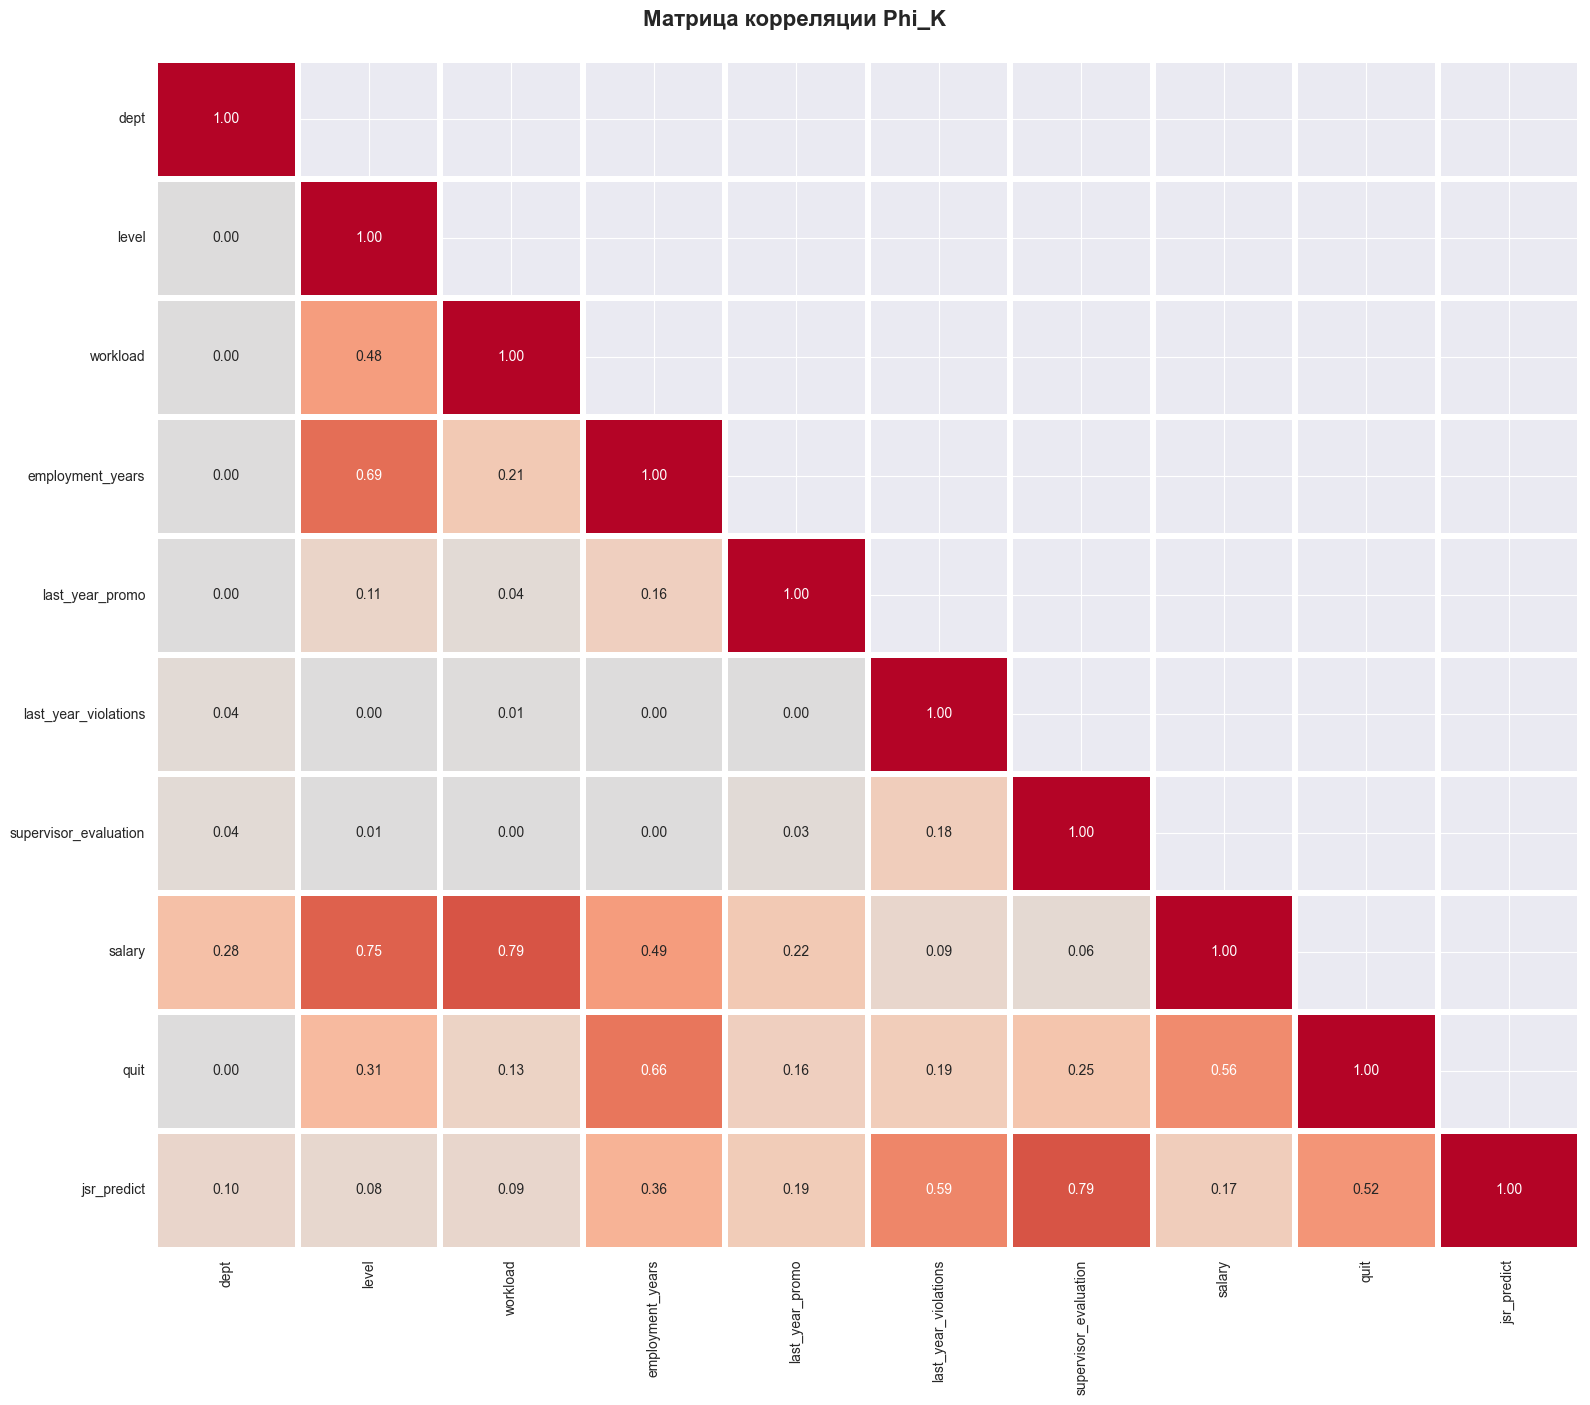

In [85]:
# Построение общей матрицы корреляции
# Отбор непрерывных величин для матрицы
train_data_quit_interval_cols = (
    train_data_quit
    .drop(['employment_years', 'supervisor_evaluation', ], axis=1)
    .select_dtypes(exclude=['category', object])
    .columns
)

# Настройки матрицы
train_data_quit_corr_matrix = (
    train_data_quit
    .phik_matrix(interval_cols=train_data_quit_interval_cols)
)

train_data_quit_corr_mask = np.triu(
    np.ones(train_data_quit_corr_matrix.shape),
    k=1
)

# Отображение матрицы
show_corr_heatmap_plot(
    train_data_quit_corr_matrix,
    train_data_quit_corr_mask
)

In [86]:
# Формирование и проверка размерности выборок
X_train_quit, y_train_quit, X_test_quit, y_test_quit = (
    train_data_quit.drop('quit', axis=1),
    train_data_quit.quit,
    test_data_quit.drop('quit', axis=1),
    test_data_quit.quit
)

get_samples_shape_info(
    X_train_quit, 
    X_test_quit,
    y_train_quit,
    y_test_quit
)

## Размерность выборок 
___


X_shape  y_shape
Train  (4000, 9)  (4000,)
Test   (2000, 9)  (2000,)

In [87]:
# Подготовка параметров для поиска лучшей модели
label_encoder = LabelEncoder()
y_train_quit = label_encoder.fit_transform(y_train_quit)
y_test_quit = label_encoder.transform(y_test_quit)

In [88]:
pipeline_params_quit = {
    'task': 'clf',
    'ohe_columns': ohe_columns,
    'ord_columns': ord_columns,
    'num_columns': num_columns,
    'ord_categories': ord_categories,
}

final_pipeline_quit = build_pipeline(**pipeline_params_quit)

#### Обучение моделей

In [89]:
# Настройка Dummy проверки моделей на адекватность
dummy_quit = DummyClassifier(strategy='most_frequent')
dummy_quit.fit(X_train_quit, y_train_quit)

DummyClassifier(strategy='most_frequent')

In [90]:
# Поиск лучшей модели через RandomizedSearch
randomized_param_grid_quit = construct_param_grid_sklearn('clf')

rs_results_list = []
rs_best_pipeline_quit = None
rs_best_pipeline_quit_name = None
rs_best_pipeline_cv_score_quit = 0

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

for param_dist in tqdm(randomized_param_grid_quit, desc='RSCV Progress'):    
    rs_searcher = get_searcher(
        final_pipeline_quit,
        param_dist,
        search_method='randomized',
        scoring='roc_auc',
        cv=cv
    )

    with tqdm(total=1, desc=f'{param_dist["model"][0].__class__.__name__}') as pbar:
        rs_searcher.fit(X_train_quit, y_train_quit)
        
        pbar.update(1)
        pbar.set_postfix({'Best CV': f'{rs_searcher.best_score_:.4f}'})
            
    cv_score = rs_searcher.best_score_
    
    rs_results_list.append({
        'Best Model': rs_searcher.best_estimator_.named_steps.model,
        'Best CV': f'{cv_score:.4f}',
        'Train Time (sec.)': f'{rs_searcher.refit_time_:.2f}',
        'Pred Time (sec.)': f'{rs_searcher.cv_results_["mean_score_time"][rs_searcher.best_index_]:.2f}',
        'Method': 'RSCV'

    })
    
    if cv_score > rs_best_pipeline_cv_score_quit:
        rs_best_pipeline_quit = rs_searcher.best_estimator_
        rs_best_pipeline_cv_score_quit = cv_score

RSCV Progress:   0%|          | 0/4 [00:00<?, ?it/s]

LogisticRegression:   0%|          | 0/1 [00:00<?, ?it/s]

DecisionTreeClassifier:   0%|          | 0/1 [00:00<?, ?it/s]

KNeighborsClassifier:   0%|          | 0/1 [00:00<?, ?it/s]

SVC:   0%|          | 0/1 [00:00<?, ?it/s]

In [91]:
# Поиск лучшей модели через Optuna Search
os_results_list = []
optuna_best_pipeline_quit = None
optuna_best_pipeline_quit_name = None
optuna_best_pipeline_cv_score_quit = 0

optuna_param_grid_quit = construct_param_grid_optuna('clf')

for model_key, dist in tqdm(optuna_param_grid_quit.items(), 'OSCV Progress'):
    model_name = dist['model'].choices[0].__class__.__name__
            
    optuna_searcher = get_searcher(
        final_pipeline_quit,
        dist,
        search_method='optuna',
        scoring='roc_auc',
        cv=cv
    )
    
    with tqdm(total=1, desc=f'{model_name}') as pbar:
        optuna_searcher.fit(X_train_quit, y_train_quit)
        
        pbar.update(1)
        pbar.set_postfix({'Best CV': f'{optuna_searcher.best_score_:.4f}'})
    
    cv_score = optuna_searcher.best_score_
    os_best_model_name = optuna_searcher.best_estimator_.named_steps.model.__class__.__name__
    
    os_results_list.append({
        'Best Model': f'{optuna_searcher.best_estimator_.named_steps.model}',
        'Best CV': f'{cv_score:.4f}',
        'Train Time (sec.)': f'{optuna_searcher.refit_time_:.2f}',
        'Pred Time (sec.)': f'{optuna_searcher.cv_results_["mean_score_time"][optuna_searcher.best_index_]:.2f}',
        'Method': 'OSCV'
    })
    
    if cv_score > optuna_best_pipeline_cv_score_quit:
        optuna_best_pipeline_quit = optuna_searcher.best_estimator_
        optuna_best_pipeline_cv_score_quit = cv_score

OSCV Progress:   0%|          | 0/4 [00:00<?, ?it/s]

KNeighborsClassifier:   0%|          | 0/1 [00:00<?, ?it/s]

[I 2026-02-17 22:01:46,892] A new study created in memory with name: no-name-7f9c0e0b-3c7d-43da-ba9c-b193e13d666e
[I 2026-02-17 22:01:46,973] Trial 0 finished with value: 0.9093656767180324 and parameters: {'model': KNeighborsClassifier(n_neighbors=4), 'model__n_neighbors': 4, 'preprocessor__num__scaler': StandardScaler()}. Best is trial 0 with value: 0.9093656767180324.
[I 2026-02-17 22:01:47,033] Trial 1 finished with value: 0.8996245523360857 and parameters: {'model': KNeighborsClassifier(n_neighbors=3), 'model__n_neighbors': 3, 'preprocessor__num__scaler': 'passthrough'}. Best is trial 0 with value: 0.9093656767180324.
[I 2026-02-17 22:01:47,105] Trial 2 finished with value: 0.9093656767180324 and parameters: {'model': KNeighborsClassifier(n_neighbors=4), 'model__n_neighbors': 4, 'preprocessor__num__scaler': StandardScaler()}. Best is trial 0 with value: 0.9093656767180324.
[I 2026-02-17 22:01:47,183] Trial 3 finished with value: 0.9061542274173471 and parameters: {'model': KNeighb

DecisionTreeClassifier:   0%|          | 0/1 [00:00<?, ?it/s]

[I 2026-02-17 22:01:49,842] A new study created in memory with name: no-name-2863408c-76f6-4376-8854-383e7b76a344
[I 2026-02-17 22:01:49,910] Trial 0 finished with value: 0.9222893502414715 and parameters: {'model': DecisionTreeClassifier(class_weight='balanced', max_depth=4, min_samples_leaf=2,
                       min_samples_split=5, random_state=42), 'model__max_depth': 4, 'model__min_samples_split': 5, 'model__min_samples_leaf': 2, 'preprocessor__num__scaler': MinMaxScaler()}. Best is trial 0 with value: 0.9222893502414715.
[I 2026-02-17 22:01:49,978] Trial 1 finished with value: 0.9122949823192069 and parameters: {'model': DecisionTreeClassifier(class_weight='balanced', max_depth=3, min_samples_leaf=3,
                       random_state=42), 'model__max_depth': 3, 'model__min_samples_split': 2, 'model__min_samples_leaf': 3, 'preprocessor__num__scaler': MinMaxScaler()}. Best is trial 0 with value: 0.9222893502414715.
[I 2026-02-17 22:01:50,044] Trial 2 finished with value: 0.92

LogisticRegression:   0%|          | 0/1 [00:00<?, ?it/s]

[I 2026-02-17 22:01:52,527] A new study created in memory with name: no-name-8855787b-5331-4887-a3ab-d4854f3fe75c
[I 2026-02-17 22:01:52,628] Trial 0 finished with value: 0.9255611502801117 and parameters: {'model': LogisticRegression(C=0.2312614033209604, class_weight='balanced',
                   random_state=42), 'model__C': 0.2312614033209604, 'preprocessor__num__scaler': StandardScaler()}. Best is trial 0 with value: 0.9255611502801117.
[I 2026-02-17 22:01:52,794] Trial 1 finished with value: 0.8955511169026712 and parameters: {'model': LogisticRegression(C=0.0784846803977368, class_weight='balanced',
                   random_state=42), 'model__C': 0.0784846803977368, 'preprocessor__num__scaler': 'passthrough'}. Best is trial 0 with value: 0.9255611502801117.
[I 2026-02-17 22:01:52,906] Trial 2 finished with value: 0.9230667540465325 and parameters: {'model': LogisticRegression(C=0.11148154776010387, class_weight='balanced',
                   random_state=42), 'model__C': 0.111

SVC:   0%|          | 0/1 [00:00<?, ?it/s]

[I 2026-02-17 22:01:57,074] A new study created in memory with name: no-name-ac28d786-7e4e-40a1-a6cd-380013e28482
[I 2026-02-17 22:01:59,138] Trial 0 finished with value: 0.8522778312037284 and parameters: {'model': SVC(C=0.09085351895012907, class_weight='balanced', kernel='sigmoid',
    probability=True, random_state=42), 'model__kernel': 'sigmoid', 'model__C': 0.09085351895012907, 'preprocessor__num__scaler': StandardScaler()}. Best is trial 0 with value: 0.8522778312037284.
[I 2026-02-17 22:02:00,945] Trial 1 finished with value: 0.9185089286105306 and parameters: {'model': SVC(C=9.948384931504128, class_weight='balanced', kernel='poly',
    probability=True, random_state=42), 'model__kernel': 'poly', 'model__C': 9.948384931504128, 'preprocessor__num__scaler': StandardScaler()}. Best is trial 1 with value: 0.9185089286105306.
[I 2026-02-17 22:02:02,388] Trial 2 finished with value: 0.7992807559833087 and parameters: {'model': SVC(C=7.19681335292731, class_weight='balanced', kernel=

In [92]:
# Вывод результатов обучения моделей
quit_full_results_list = pd.concat([
    pd.DataFrame(rs_results_list),
    pd.DataFrame(os_results_list)
]).sort_values('Best CV', ascending=False).reset_index(drop=True)

quit_full_results_list.style.background_gradient(cmap=PALETTE_NUMERIC, subset=['Best CV'])

In [93]:
# Настройка проверки моделей на адекватность Dummy
y_test_dummy_quit_pred = dummy_quit.predict(X_test_quit)

# Проверка лучшей модели на тестовых данных
y_test_quit_pred_proba = rs_best_pipeline_quit.predict_proba(X_test_quit)[:, 1]

# Формирование и расчеты метрик
main_metrics = {
    'CV': rs_best_pipeline_cv_score_quit,
    'ROC_AUC': roc_auc_score(y_test_quit, y_test_quit_pred_proba),
}

dummy_metrics = {
    'CV': '-',
    'ROC_AUC': roc_auc_score(y_test_quit, y_test_dummy_quit_pred)
}

best_model_metrics = pd.DataFrame(
    data=[main_metrics, dummy_metrics],
    index=['Best Model', 'Dummy Baseline']
)

# Вывод метрик
display(Markdown(f'### Метрики лучшей модели \n___'))
display(rs_best_pipeline_quit.named_steps.model)
display(pd.DataFrame(best_model_metrics).T)

### Метрики лучшей модели 
___

SVC(C=10, class_weight='balanced', gamma='auto', probability=True,
    random_state=42)

Best Model Dummy Baseline
CV          0.9305              -
ROC_AUC     0.9230         0.5000

#### Анализ важности признаков

In [94]:
# Определение пермутационной важности признаков
best_model_quit = rs_best_pipeline_quit.named_steps.model
best_model_preprocessor_quit = rs_best_pipeline_quit.named_steps.preprocessor
best_model_feature_names_quit = best_model_preprocessor_quit.get_feature_names_out()
X_test_quit_preprocessor = best_model_preprocessor_quit.transform(X_test_quit)

permutation_result_quit = permutation_importance(
    best_model_quit,
    X_test_quit_preprocessor,
    y_test_quit,
    scoring='roc_auc',
    n_repeats=10
)

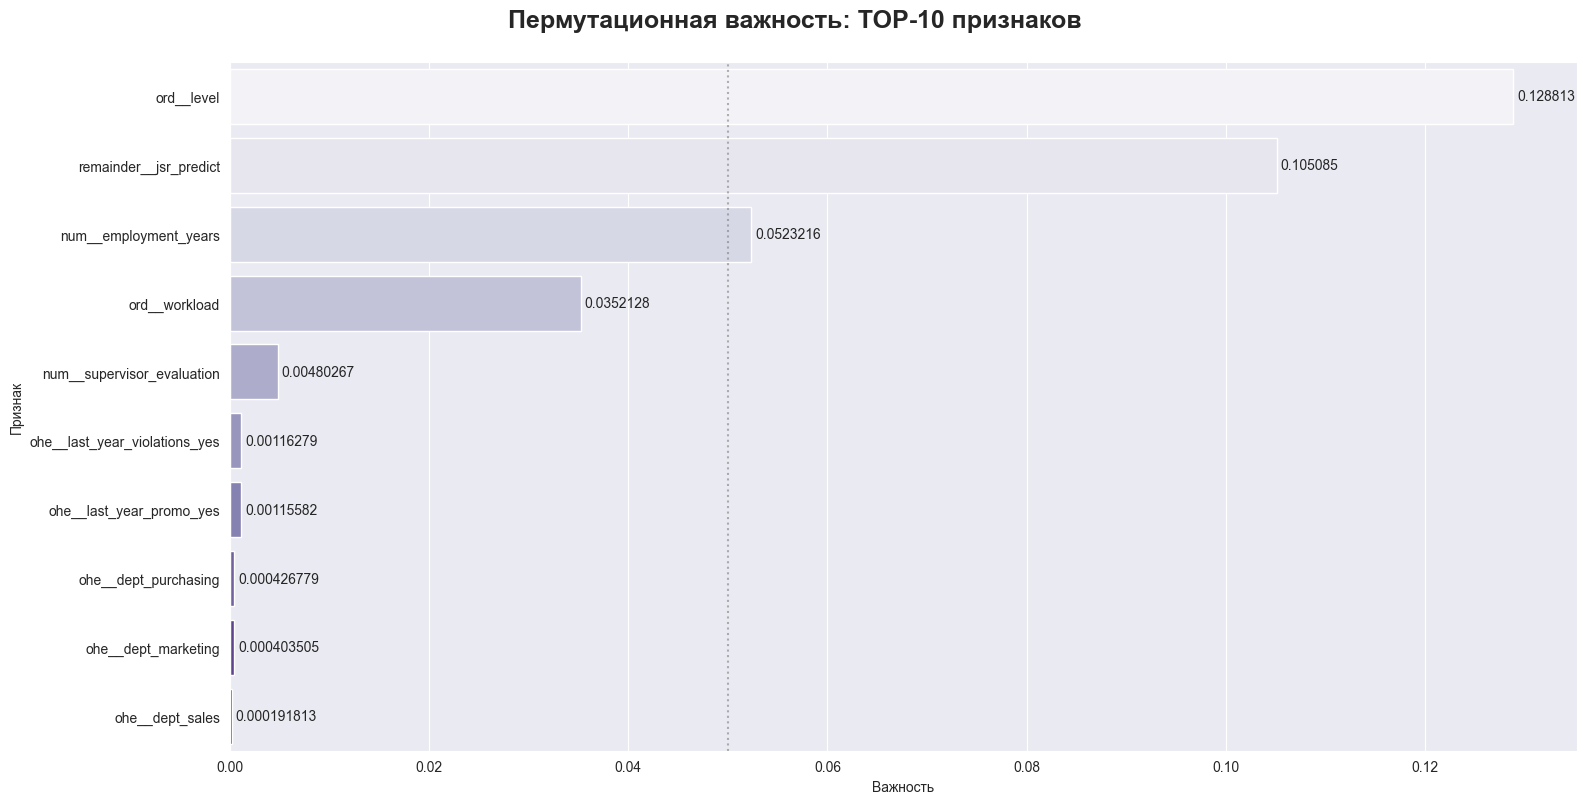

name  value  norm_value
6                      ord__level 0.1288      1.0000
11         remainder__jsr_predict 0.1051      0.8158
8           num__employment_years 0.0523      0.4062
7                   ord__workload 0.0352      0.2734
10     num__supervisor_evaluation 0.0048      0.0373
0   ohe__last_year_violations_yes 0.0012      0.0090
1        ohe__last_year_promo_yes 0.0012      0.0090
3            ohe__dept_purchasing 0.0004      0.0033
2             ohe__dept_marketing 0.0004      0.0031
4                 ohe__dept_sales 0.0002      0.0015

In [95]:
# Визуализация и вывод информации
feature_importance_quit = pd.DataFrame({
    'name': best_model_feature_names_quit,
    'value': permutation_result_quit.importances_mean,
    })

show_feature_importance_bar(feature_importance_quit)

In [96]:
# Определение SHAP-значений
quit_data = pd.DataFrame(
    X_test_quit_preprocessor,
    columns=best_model_feature_names_quit
)
                    
explainer_quit = shap.Explainer(
    best_model_quit.predict_proba,
    shap.sample(quit_data, 150, random_state=RANDOM_STATE)
)

shap_values_quit = explainer_quit(quit_data[:150])

PermutationExplainer explainer: 151it [02:06,  1.10it/s]                         


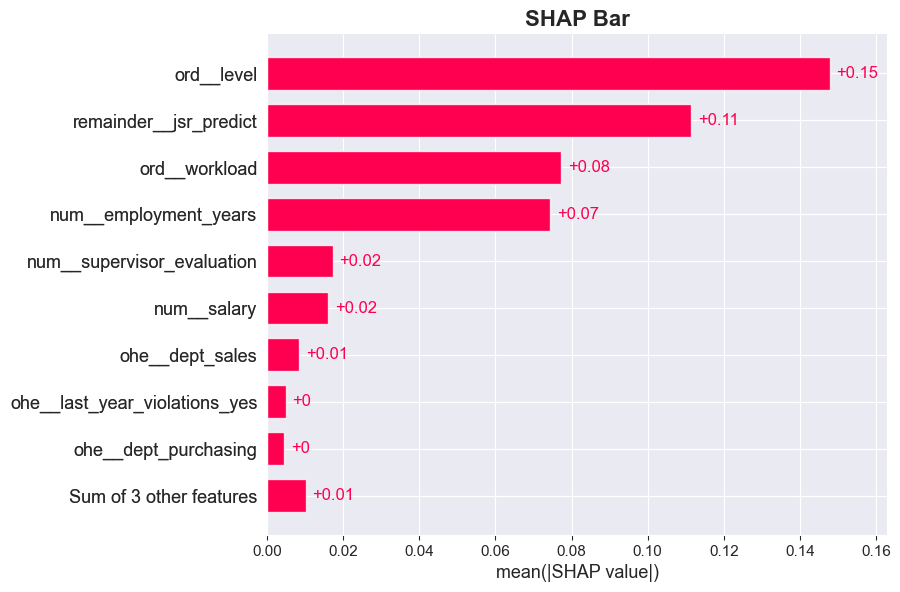

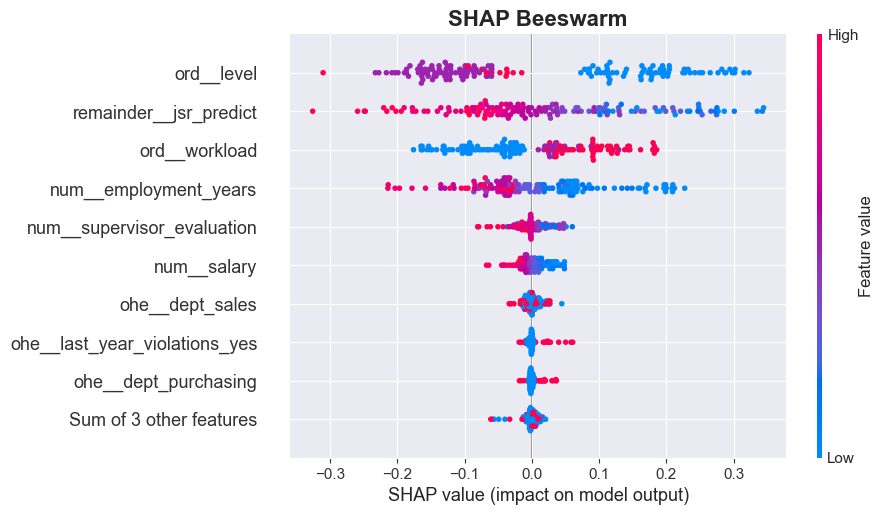

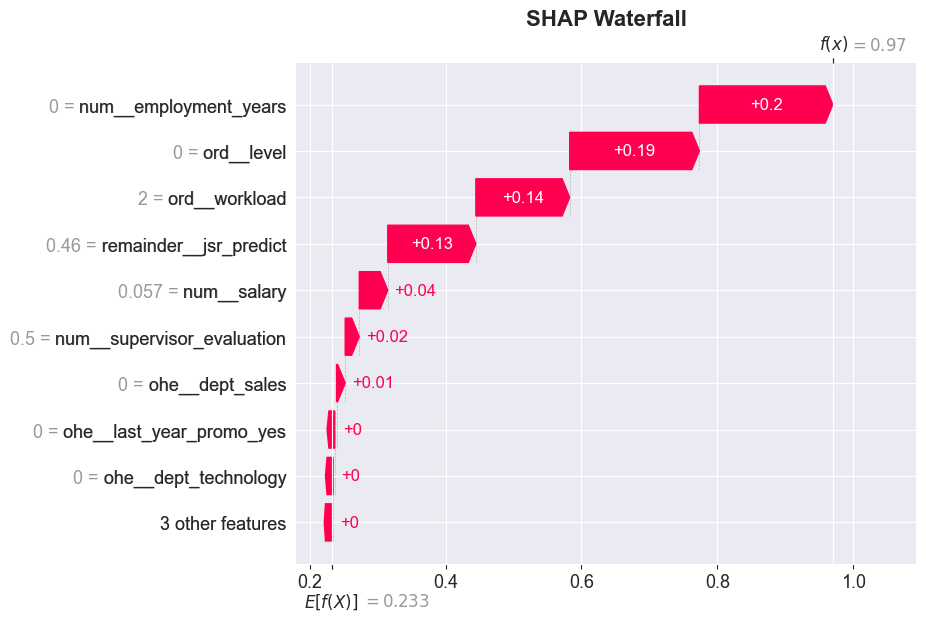

In [97]:
# Визуализация и вывод информации
show_shap(shap_values_quit[..., 1])

#### Выводы
---
**Общее**
>- В рамках объединения данных корреляционный анализ показал **отстутствие мультиколинеарности**
>- Для поиска модели **были выбраны два способа обучения модели: через Randomized Search и Optuna Search**
>- На основе лучшей оценки CV была отобрана **лучшая модель Randomized Search** с параметрами:
>  
        SVC(C=10, class_weight='balanced', gamma='auto', probability=True, random_state=42)
>  
>- **В качестве метрики была выбрана ROC-AUC**, т.к. нам одновременно важны как Recall, так и Precision
>- Метрика **ROC-AUC состваила `0.9230`**, что в целом может говорить об отсутствии явного переобучения модели
>- **Далее анализ будет проводиться на основе модели SVС Randomized Search**

**Анализ Feature Importance**
> - Согласно анализу важности признаков, можно выделить 4 самых наиболее влиятелных признака:
> > - **`ord__level`**
> > - **`remainder__jsr_predict`**
> > - **`num__employment_years`**
> > - **`ord__workload`**
> - Также можно отметить, что сотрудники из отдела Технологий и Продаж более многочисленны по вероятностям Увольнения

**Анализ SHAP**
> **Самые важные признаки**
> - Уровень грейда о привносит наибольший вклад в модель и оказывает влияние на предсказание вероятности увольнения
> - Также на предсказание вероятности увольнения оказывают влияние - предсказания удовлетворенности, длительность работы и загрузка на работе
> - Остальные признаки хоть и имеют влияние на вероятность увольнения, но они не столь значительны
>
> **Характер влияния**
> - По уровню грейда можно сказать, что сотрудники с более высоким грейдом боллее предрасположены к увольнению. Вероятно, это говорит об их уверенности в своих навыках и знаниях и востребованности на рынке труда, противоположно и обратное
> - Вероятность удовлетворенности, очевидно, будет влиять на вероятность увольнения, т.к. неудовлетворенный чем-либо сотрудник не станет долго задерживаться на текущей работе
>
> **Индивидуальный признак**
>
> Картина на индивидульном признако почти полностью отражает те вывод, что сделаны выше по другим графикам SHAP: грейд, предсказание удовлетворенности, общая длительность работы и загрузка имеют сильное влияние на вероятность увольнения
>
> При этом отдельно можно отметить, что на вероятность увольнения оказывают некоторое влияние размер зарплаты и оценка работы, а сотрудники отдела маркетинга менее предрасположены к увольнению
>
> **Общая сводка**
>
> Графики SHAP показывают, что наибольшее влияние на предсказанную удовлетворенность оказывают: 
> - грейд
> - удовлетворенность
> - длительность работы
> - загрузка
>
> Другие признаки имеют меньшее, часто незначительное влияние

## Отбор и анализ сегмента
___

### Сегмент: Низкая удовлетворенность и высокая вероятность увольнения

## 🔎 Обзор данных `high_risk_segment`
___

### Информация о DataFrame
___


```<class 'pandas.core.frame.DataFrame'>
Int64Index: 649 entries, 257132 to 150315
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   dept                      649 non-null    category
 1   level                     649 non-null    category
 2   workload                  649 non-null    category
 3   employment_years          649 non-null    int64   
 4   supervisor_evaluation     649 non-null    category
 5   salary                    649 non-null    int64   
 6   jsr_predict               649 non-null    float64 
 7   quit_predict              649 non-null    float64 
 8   last_year_promo_no        649 non-null    uint8   
 9   last_year_promo_yes       649 non-null    uint8   
 10  last_year_violations_no   649 non-null    uint8   
 11  last_year_violations_yes  649 non-null    uint8   
dtypes: category(4), float64(2), int64(2), uint8(4)
memory usage: 31.1 KB
```

### Статистическое описание данных
___


employment_years     salary  jsr_predict  quit_predict  \
count          649.0000   649.0000     649.0000      649.0000   
mean             1.6718 22295.2234       0.2760        0.8763   
std              0.9837  6802.9672       0.0842        0.1089   
min              1.0000 12000.0000      -0.0237        0.6002   
25%              1.0000 16800.0000       0.2170        0.7830   
50%              1.0000 22800.0000       0.2902        0.8911   
75%              2.0000 26400.0000       0.3478        0.9852   
max              5.0000 45600.0000       0.3987        1.0000   

       last_year_promo_no  last_year_promo_yes  last_year_violations_no  \
count            649.0000             649.0000                 649.0000   
mean               1.0000               0.0000                   0.7057   
std                0.0000               0.0000                   0.4561   
min                1.0000               0.0000                   0.0000   
25%                1.0000               0.0000                   0.0000   
50%                1.0000               0.0000                   1.0000   
75%                1.0000               0.0000                   1.0000   
max                1.0000               0.0000                   1.0000   

       last_year_violations_yes  
count                  649.0000  
mean                     0.2943  
std                      0.4561  
min                      0.0000  
25%                      0.0000  
50%                      0.0000  
75%                      1.0000  
max                      1.0000

### 5 случайных строк
___


dept   level workload  employment_years supervisor_evaluation  \
id                                                                            
554134       sales  junior   medium                 1                     1   
534566  purchasing  junior     high                 2                     2   
170621   marketing  junior   medium                 2                     2   
133683  purchasing  junior   medium                 1                     3   
914054  technology  junior      low                 1                     3   

        salary  jsr_predict  quit_predict  last_year_promo_no  \
id                                                              
554134   20400       0.2420        0.9293                   1   
534566   33600       0.3295        0.9731                   1   
170621   22800       0.3000        0.8603                   1   
133683   21600       0.2170        0.8904                   1   
914054   21600       0.3479        0.9874                   1   

        last_year_promo_yes  last_year_violations_no  last_year_violations_yes  
id                                                                              
554134                    0                        1                         0  
534566                    0                        1                         0  
170621                    0                        1                         0  
133683                    0                        1                         0  
914054                    0                        1                         0

### Кол-во уникальных значений
___


unique_values
jsr_predict                         352
quit_predict                        352
salary                               27
dept                                  5
employment_years                      5
supervisor_evaluation                 4
level                                 3
workload                              3
last_year_violations_no               2
last_year_violations_yes              2
last_year_promo_no                    1
last_year_promo_yes                   1

### Кол-во пропущенных значений
___


✅ **Пропуски отсутствуют!**

### Явные дубликаты
___


✅ Явные дубликаты **отсутствуют!**

### Неявные дубликаты
___


✅ Неявные дубликаты **отсутствуют!**

### Беглый визуальный анализ
___


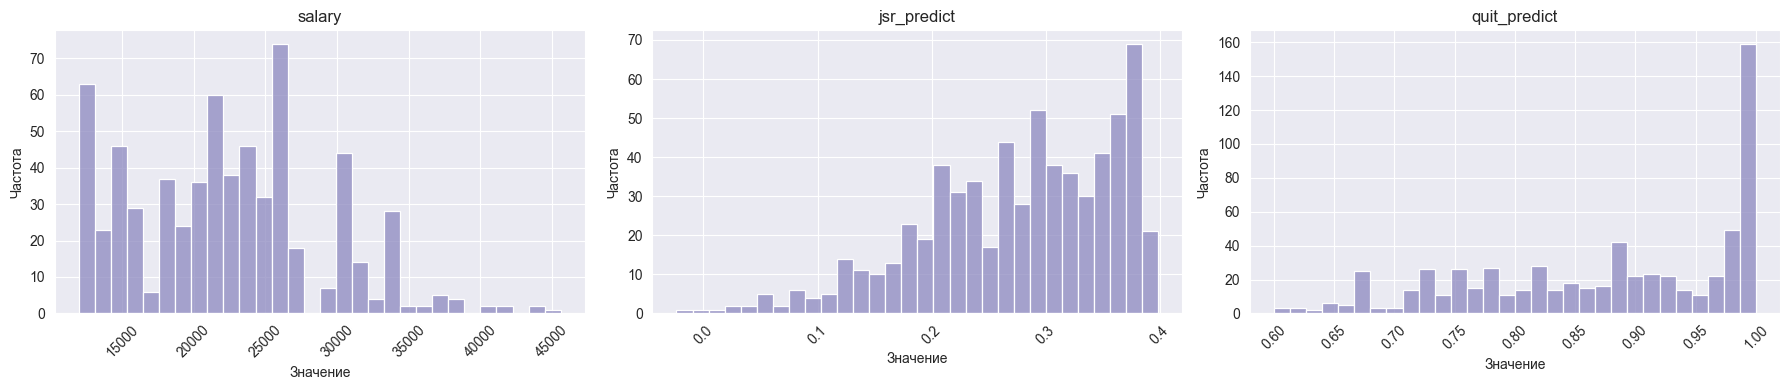

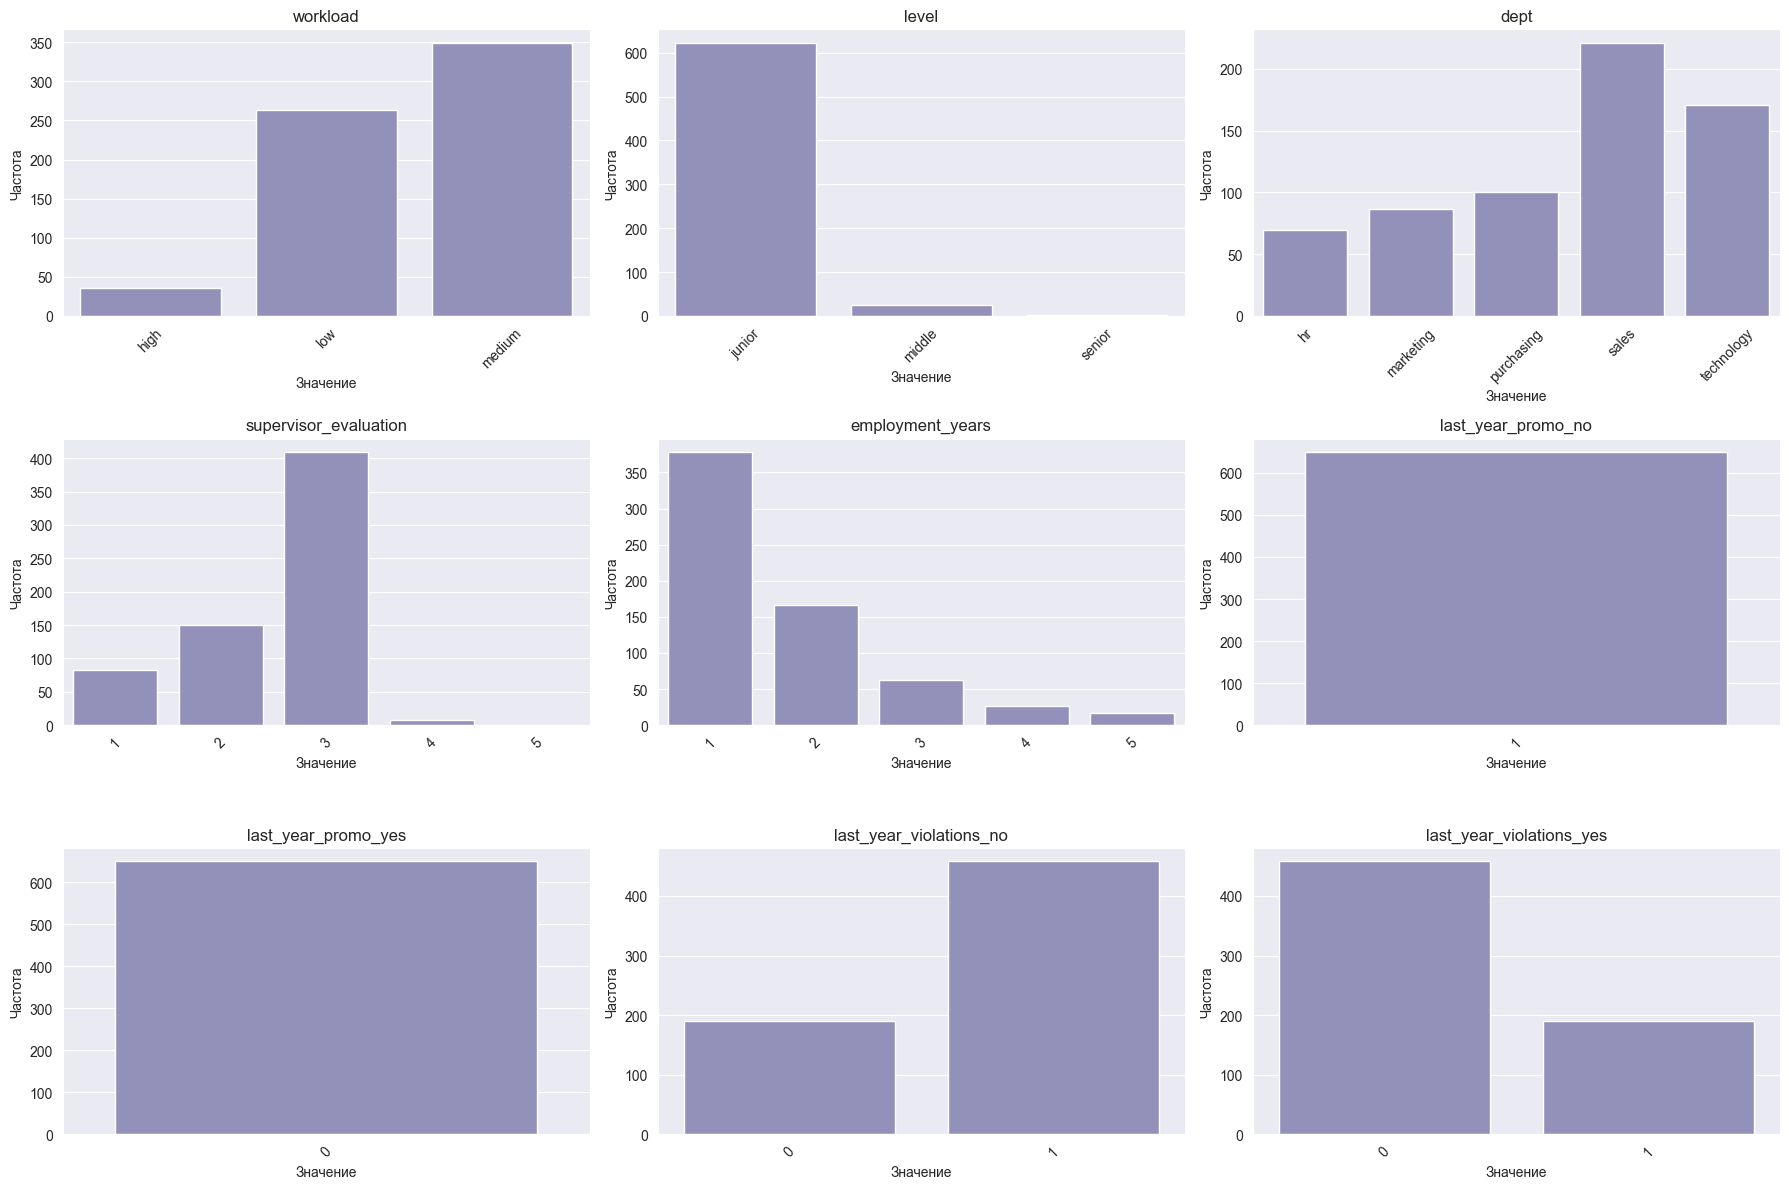

## 🔎 Обзор данных `low_risk_segment`
___

### Информация о DataFrame
___


```<class 'pandas.core.frame.DataFrame'>
Int64Index: 3351 entries, 723290 to 853842
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   dept                      3351 non-null   category
 1   level                     3351 non-null   category
 2   workload                  3351 non-null   category
 3   employment_years          3351 non-null   int64   
 4   supervisor_evaluation     3351 non-null   category
 5   salary                    3351 non-null   int64   
 6   jsr_predict               3351 non-null   float64 
 7   quit_predict              3351 non-null   float64 
 8   last_year_promo_no        3351 non-null   uint8   
 9   last_year_promo_yes       3351 non-null   uint8   
 10  last_year_violations_no   3351 non-null   uint8   
 11  last_year_violations_yes  3351 non-null   uint8   
dtypes: category(4), float64(2), int64(2), uint8(4)
memory usage: 157.8 KB
```

### Статистическое описание данных
___


employment_years     salary  jsr_predict  quit_predict  \
count         3351.0000  3351.0000    3351.0000     3351.0000   
mean             4.0946 36035.0940       0.5915        0.1687   
std              2.5638 15312.8727       0.1850        0.2429   
min              1.0000 12000.0000       0.0273        0.0009   
25%              2.0000 24000.0000       0.4610        0.0232   
50%              4.0000 33600.0000       0.6200        0.0553   
75%              6.0000 45600.0000       0.7387        0.1782   
max             10.0000 96000.0000       0.9882        0.9790   

       last_year_promo_no  last_year_promo_yes  last_year_violations_no  \
count           3351.0000            3351.0000                3351.0000   
mean               0.9663               0.0337                   0.8944   
std                0.1805               0.1805                   0.3074   
min                0.0000               0.0000                   0.0000   
25%                1.0000               0.0000                   1.0000   
50%                1.0000               0.0000                   1.0000   
75%                1.0000               0.0000                   1.0000   
max                1.0000               1.0000                   1.0000   

       last_year_violations_yes  
count                 3351.0000  
mean                     0.1056  
std                      0.3074  
min                      0.0000  
25%                      0.0000  
50%                      0.0000  
75%                      0.0000  
max                      1.0000

### 5 случайных строк
___


dept   level workload  employment_years supervisor_evaluation  \
id                                                                            
887499       sales  middle      low                 3                     4   
710296  purchasing  junior      low                 3                     4   
626912  technology  junior   medium                 4                     1   
172471  purchasing  middle      low                 5                     3   
482507       sales  middle     high                 7                     2   

        salary  jsr_predict  quit_predict  last_year_promo_no  \
id                                                              
887499   19200       0.5002        0.1767                   1   
710296   12000       0.6677        0.3785                   1   
626912   26400       0.4194        0.7606                   1   
172471   24000       0.2855        0.2375                   1   
482507   46800       0.1812        0.0270                   1   

        last_year_promo_yes  last_year_violations_no  last_year_violations_yes  
id                                                                              
887499                    0                        1                         0  
710296                    0                        1                         0  
626912                    0                        1                         0  
172471                    0                        0                         1  
482507                    0                        0                         1

### Кол-во уникальных значений
___


unique_values
jsr_predict                        2103
quit_predict                       2098
salary                               69
employment_years                     10
dept                                  5
supervisor_evaluation                 5
level                                 3
workload                              3
last_year_promo_no                    2
last_year_promo_yes                   2
last_year_violations_no               2
last_year_violations_yes              2

### Кол-во пропущенных значений
___


✅ **Пропуски отсутствуют!**

### Явные дубликаты
___


✅ Явные дубликаты **отсутствуют!**

### Неявные дубликаты
___


✅ Неявные дубликаты **отсутствуют!**

### Беглый визуальный анализ
___


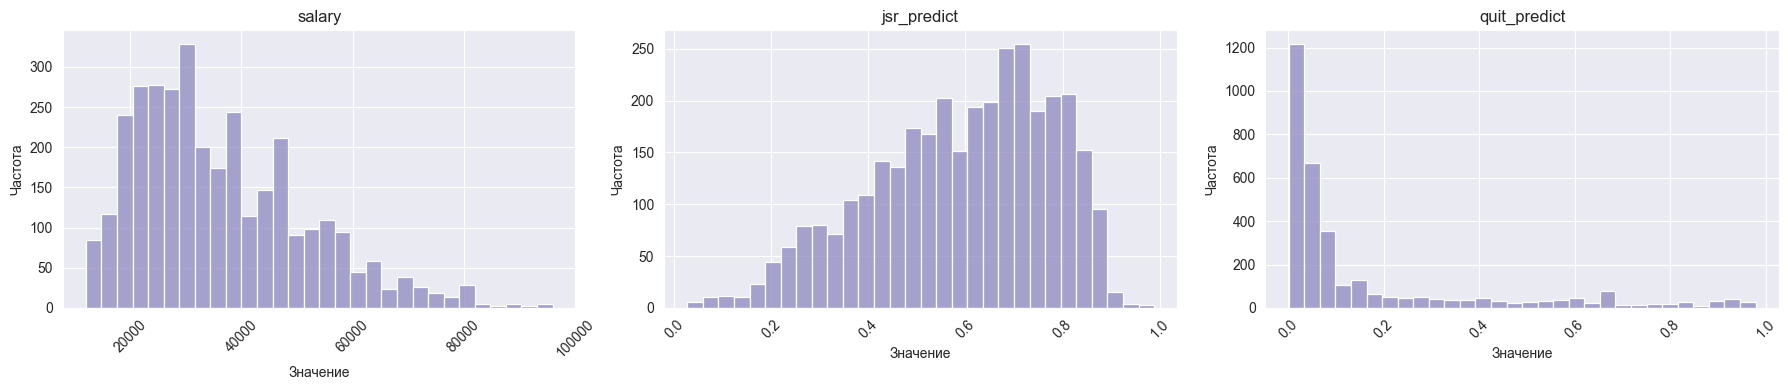

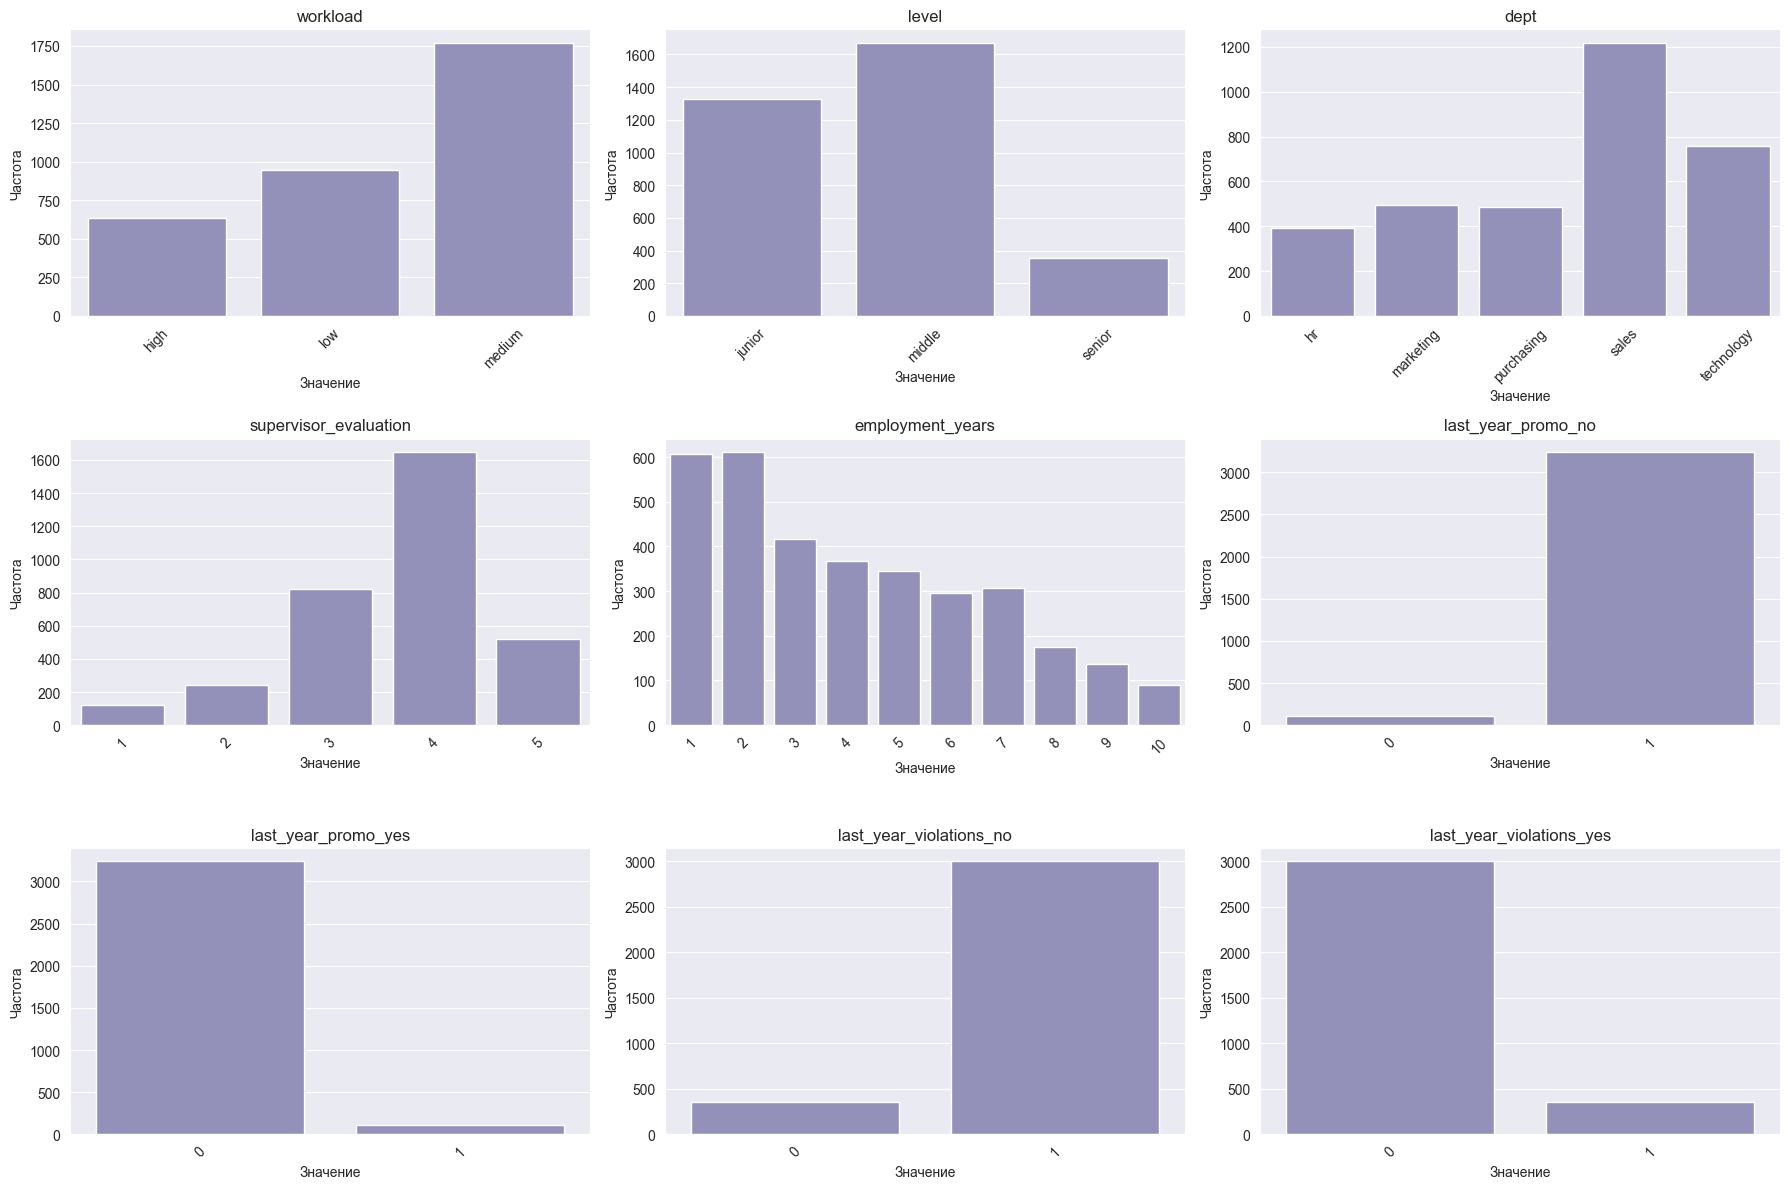

In [98]:
# Формирование таблицы для анализа
segment_data = train_data_quit.copy().drop(columns='quit', axis=1)

# Добавление предсказаний лучшей модели по вероятности увольнения в таблицу
segment_data['jsr_predict'] = optuna_best_pipeline_jsr.predict(segment_data)
segment_data['quit_predict'] = rs_best_pipeline_quit.predict_proba(segment_data)[:, 1]

# Кодировка значений повышений и нарушений
segment_data = pd.get_dummies(segment_data, columns=['last_year_promo', 'last_year_violations'])

# Отбор сотрудников по параметрам:
# Низкая удовлетворённость: ≤ 0.4 (чем меньше, тем хуже)
# Высокая вероятность увольнения: ≥ 0.6 (чем больше, тем выше риск)
high_risk_segment = segment_data.query('jsr_predict <= 0.4 & quit_predict >= 0.6')
low_risk_segment = segment_data.drop(high_risk_segment.index)

high_risk_segment.attrs['name'] = 'high_risk_segment'
low_risk_segment.attrs['name'] = 'low_risk_segment'

segment_discrete_features = [
    'workload',
    'level',
    'dept',
    'supervisor_evaluation',
    'employment_years',
    'last_year_promo_no',
    'last_year_promo_yes', 
    'last_year_violations_no', 
    'last_year_violations_yes'
]

get_df_overview(
    high_risk_segment,
    segment_discrete_features
)
get_df_overview(
    low_risk_segment,
    segment_discrete_features
)

In [99]:
# Вывод таблицы для наглядности и формирование сегментов для анализа
def dept_agg(df):
    return pd.Series({
        'Сотрудники (всего)': len(df),
        'Грейд (мода)': df['level'].mode()[0],
        'Зарплата (медиана)': np.median(df['salary']),
        'Длительность (ср)': np.round(np.mean(df['employment_years']), 1),
        'Оценка (мода)': df['supervisor_evaluation'].mode()[0],
        'Загрузка (мода)': df['workload'].mode()[0],
        'Повышений (%)': np.round(df['last_year_promo_yes'].mean()*100, 1),
        'Нарушений (%)': np.round(df['last_year_violations_yes'].mean()*100, 1),
        'Удовлетворенность (ср)': np.round(df['jsr_predict'].mean(), 2),
        'Вероятность увольнения (ср)': np.round(df['quit_predict'].mean(), 2),
    })

high_risk_dept = (
    high_risk_segment
    .groupby('dept')
    .apply(dept_agg)
    .reset_index()
    .rename(columns={'dept': 'Отдел'})
)


low_risk_dept = (
    low_risk_segment
    .groupby('dept')
    .apply(dept_agg)
    .reset_index()
    .rename(columns={'dept': 'Отдел'})
)

In [100]:
display(high_risk_dept, low_risk_dept)

Отдел  Сотрудники (всего) Грейд (мода)  Зарплата (медиана)  \
0          hr                  70       junior          22200.0000   
1   marketing                  87       junior          24000.0000   
2  purchasing                 100       junior          21600.0000   
3       sales                 221       junior          20400.0000   
4  technology                 171       junior          26400.0000   

   Длительность (ср)  Оценка (мода) Загрузка (мода)  Повышений (%)  \
0             1.8000              3             low         0.0000   
1             1.8000              3          medium         0.0000   
2             1.6000              3          medium         0.0000   
3             1.7000              3          medium         0.0000   
4             1.6000              3          medium         0.0000   

   Нарушений (%)  Удовлетворенность (ср)  Вероятность увольнения (ср)  
0        24.3000                  0.2700                       0.8700  
1        34.5000                  0.3000                       0.8700  
2        34.0000                  0.2700                       0.8800  
3        35.3000                  0.2800                       0.8900  
4        18.7000                  0.2700                       0.8600

Отдел  Сотрудники (всего) Грейд (мода)  Зарплата (медиана)  \
0          hr                 394       middle          31200.0000   
1   marketing                 495       middle          32400.0000   
2  purchasing                 488       middle          32400.0000   
3       sales                1217       middle          28800.0000   
4  technology                 757       middle          34800.0000   

   Длительность (ср)  Оценка (мода) Загрузка (мода)  Повышений (%)  \
0             4.1000              4          medium         2.8000   
1             4.1000              4          medium         4.0000   
2             4.1000              4          medium         2.9000   
3             4.1000              4          medium         3.0000   
4             4.0000              4          medium         4.2000   

   Нарушений (%)  Удовлетворенность (ср)  Вероятность увольнения (ср)  
0        10.7000                  0.6100                       0.1500  
1         9.3000                  0.6100                       0.1800  
2        14.3000                  0.5800                       0.1700  
3        10.5000                  0.5900                       0.1700  
4         9.0000                  0.5900                       0.1600

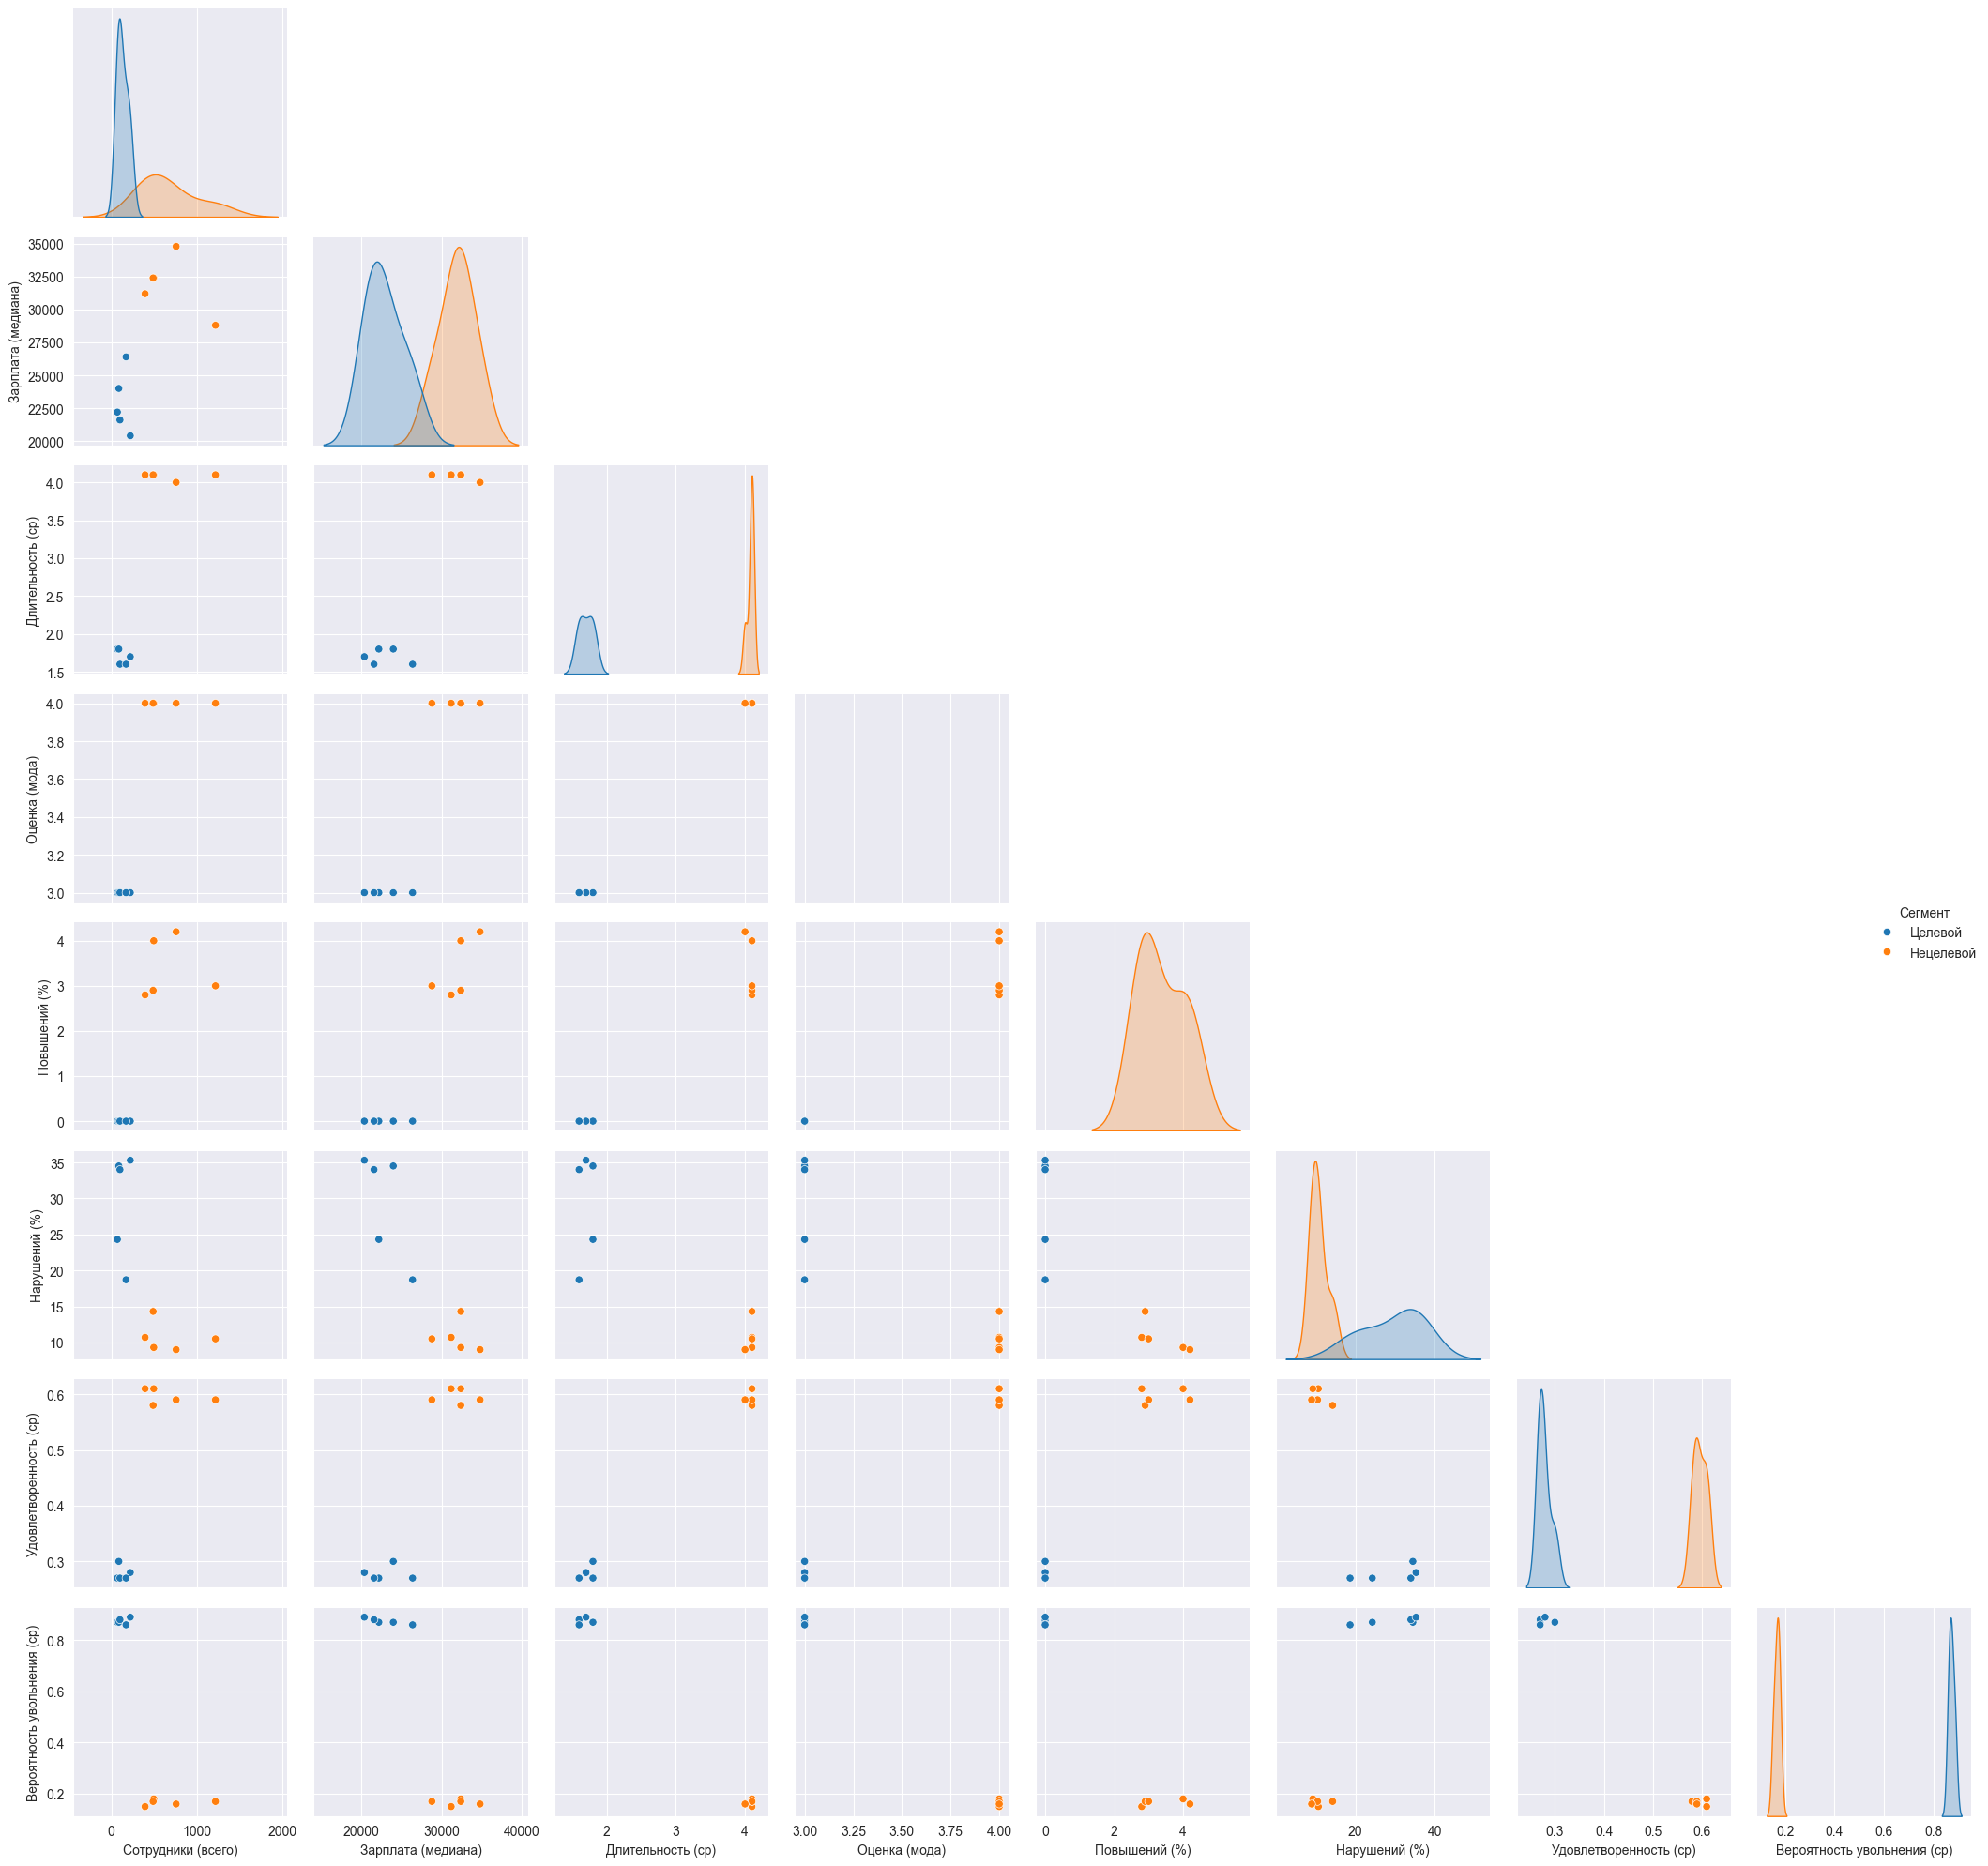

In [101]:
# Построение пэирплота для сравнения сегментов
high_risk_dept['Сегмент'] = 'Целевой'
low_risk_dept['Сегмент'] = 'Нецелевой'

merged = pd.concat([high_risk_dept, low_risk_dept])

sns.pairplot(merged, hue='Сегмент', corner=True)
plt.tight_layout()
plt.show()

### Выводы
---
Проанализировав данные и график по целевому сегменту самых неудовлетворенных сотрудников с высокой вероятностью увольнения, можно сделать следующие выводы по сегменту:
- Отделы продаж и технологий больше подвержены риску увольнения, в общее количество всех сотрудников в зоне риска - 632
- Они имеют более низкую медианную зарплату
- Работают в компании в среднем от 1.5 до 1.8 лет
- Получают более низкие оценки по работе от руководителей
- Не имеют повышений вовсе
- Чаще всего совершают допускают нарушения ТД
- И в среднем менее удовлетворены рабочими условиями

## Итоговые выводы
___

### Краткий обзор проделанной работы
___
> - Данные были загружены и предварительно изучены. В данных не было обнаружено критических ошибок или выбросов за исключением одной ошибки в названии грейда и некоторых несоответствий с типами данных
>
> - Проведена предобработка данных в которой были переименованы названия грейдов и изменены типы данных, а также были обнаружены NaN-значения, которые были устранены уже в пайплайне
>
> - Проведен исследовательский анализ данных всех датафреймов (с входными и целевыми признаками), который включал в себя кореляционный анализ и анализ плотности данных. Отедльно проведен анализ по двум портретам - "Загрузка по отделу" и "Уволился ли сотрудник", а также по Уровен удовлетворенности и Уволился ли сотрудник. В целом данные выглядят правдоподобно, выбросов и аномалий обнаружено не было
>
> - Были разработаны и выбраны **лучшие ML-модели для Предсказания уровня удовлетворенности сотрудников и Предсказания веротности ухода сотрудника**. Для поиска обеих моделей были выбраны два способа обучения через пайплайн: Randomized Search и Optuna Search. В качестве лучших моделей на основе оценок CV были отобраны:
> >
> > Предсказание уровня удовлетворенности сотрудников:
> > 
> > **`Optuna Search - SVR(C=3.349629045654751)`**
> >
> > Предсказанию веротности ухода сотрудника:
> > 
> > **`Randomized Search - SVC(C=10, class_weight='balanced', gamma='auto', probability=True, random_state=42)`**
>
> - Проведен анализ важности признаков, который показал наиболее влиятельные из них:
> > **Предсказание уровня удовлетворенности сотрудников**:\
> > `'num__salary', 'ord__level', 'ord__workload', 'num__supervisor_evaluation'`
> > 
> > **Предсказание веротности ухода сотрудника**:\
> > `'ord__level', 'remainder__jsr_predict', 'num__employment_years', 'ord__workload'`
> >
> > Анализ при помощи метода SHAP также показал, что данные признаки являются наиболее влиятельными в каждом из проведенных исследований
>
> - Сотрудники были сегментированы по самым неудовлетворенным работой и с высокой вероятностью увольнения, в результате чего были выявлены некоторые особенности для которых будут даны рекомендации ниже


### Главный вывод и рекомендации
___
**Рекомендации по увеличению удовлетворенности**

> Модель предсказания удовлетворенности сотрудников показала, что хорошая зарплата, уровень грейда, высокая загрузка и хорошая оценка от руководителя оказывают на нее наибольшее влияние
>
> Исходя из этого можно порекомендовать следующее:
> - Пересмотреть уровень дохода сотрудников, привести их в соответствии с рынком, проводить индексацию и пересматривать зарплату хотя бы раз в год
>   
> - Давать задачи и нагрузку в соответстви с грейдом сотрудника. Нужно найти золотую середину, чтобы и не перегружать их работой и, чтобы оставалсь мотивация для работы. Стоит ввести возможности для развития и роста внутри компании, например, оплачиваемое обучение и внутренние курсы от топов
>
> - Нужно пересмотреть то, каким образом происходит оценка сотрудников и по каким показателям. Явно, если большое количество сотрудников часто получает низкие оценки, это будет сильно демотивировать. Возможно, стоит рассмотреть вариант оценки в формтае one-to-one, которая бы подсвечивала только их сильные стороны, а слабые представляла, как возможные точки для роста
>
> - И, как итог, сделать все это прозрачным и понятным для всех сотрудников компании. Например, сделать отдельный вики для сотрудников, где будет размещена вся необходимая информация со всей вышеперечисленной информацией

**Рекомендации по удержанию сотрудников**

> Модель предсказания вероятности увольнения сотрудника показала, что уровень грейда, удовлетворенность, длительность работы и нагрузка оказывают наибольшее влияние
> 
> Исходя из этого можно порекомендовать следующее:
> - По уровню грейда рекомендации могут остаться теми же: периодический пересмотр задач, нагрузки, запрплат. Но в данном случае это могло бы касаться в первую очередь самых ценных сотрудников с высоким грейдом, т.к. они пост-фактум ценные кадры на рынке труда и не имеют проблем с поиском работы, поэтому их тяжело удержать обычными способами. Дополнительно стоит выработать к каждому из них индивидуальный подход и предоставить дополнительные плюшки, например, расширенное ДМС, питание за счет компании, оплачиваемые курсы или даже полностью образования, скидки на ипотеку, премии, различные поощрения и меры поддержки в случае трудных жизненных ситуаций и др.
>   
> - Общая длительность работы оказывает опосредованное влияние, т.к. на практике людям свойственно менять работу раз в 3 года, особенно если они молодые. Чем больше человек работает в компании - тем более вероятно, что он сменит работы, то же и верно для сотрудников, которые работают до 1 года. Если в первом случае - это из-за желания дальнейшего роста и развития, то во втором - из-за отсутствия каких-либо нужных навыков, несоответствия загрузке или атмосфере в коллективе. Тут можно предложить точечно рассмотреть оба варианта и предложить для разных категорий разные подходы. Для более молодых и неопытных - четкую систему адаптации, велком паки при приеме на работу, корпоративы и тусовки и до. Для более стабильных - подойдут варианты и с повышением в зарплате и должности, либо давать больше интересных задач и расширять ответственность
>   
> - Остальные рекомендации остаются такими же, как и в случае с удовлетворенностью в целом

**Рекомендации по сегменту: Неудовлетворен и высокая вероятность увольнения**
> На данную категорию в целом стоит обратить внимание, т.к. она находится в зоне самого высокого риска. Исходя из анализа можно дать следующие рекомендации по работе с этим сегментом:
> - Обратить внимание на зарплаты и пересмотреть их, они имеют в общем самую низкую зарплату по сравнению с остальными
>   
> - Их оценки оказываются самыми низкими, что также влияет на их мотивацию. Возможно стоит пересмотреть подход в их оценке и постараться выявить наиболее сильные стороны этих сотрудников и предложить им более интересные условия - например, другую должность, более разнообразные задачи, иной формат работы
>   
> - Еще одной зоной риска является отсутствие повышений за год в принципе. Тут однозначно стоило бы внедрить возможность повышения и сделать этот процесс прозрачным
>   
> - Они нарушают ТД намного чаще остальных. Вероятно это связано больше с низкой удовлетворенностью, что и провоцирует данные нарушения. Стоит выявить конкретные причины и отработать их
>
> Есть большая вероятность, что усиленная работа с сотрудниками из данного сегмента положительно повлияет и на всех сотрудников в целом

### Рекомендации по формированию базы
___
> - В общем виде датафреймы оказались очень качественными и чистыми
> - Небольшие рекомендации, которые могу дать - внимательнее смотреть на нейминги и возможные пропуски в данных, а также учитывать типы данных у признаков при формировании базы